/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


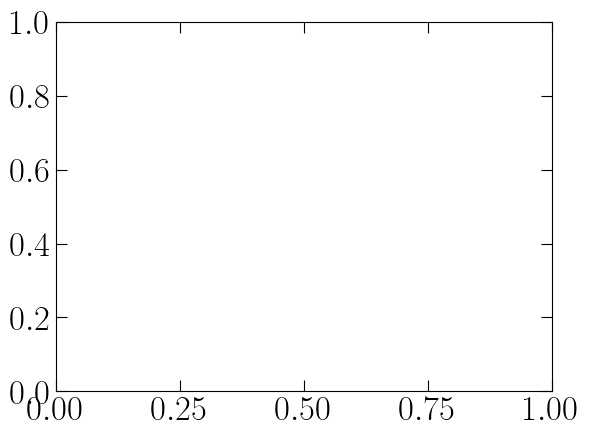

In [1]:
# 我们来试图生产一些高质量的图片
import numpy as np
import scipy
from scipy import stats
import My_Fitting
import qnm
from kuibit import simdir as sd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
import pickle
from adjustText import adjust_text
from scipy.interpolate import interp1d

plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["axes.labelpad"] = 8
plt.rcParams["figure.constrained_layout.h_pad"] = 0
plt.rcParams["text.usetex"] = True
plt.rcParams["font.sans-serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
plt.tick_params(axis="both", which="minor", labelsize=18)

In [2]:
# 首先我们来画画波形：

name_list=["0","1","5","10","20","30"]
i_name=0

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    print(sim)

Indexed 20261 files and 11 subdirectories
Folder /home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/0
/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/0
Available scalar timeseries:
['qlm_time[0]', 'qlm_time[1]', 'qlm_time[2]', 'qlm_equatorial_circumference[0]', 'qlm_equatorial_circumference[1]', 'qlm_equatorial_circumference[2]', 'qlm_polar_circumference_0[0]', 'qlm_polar_circumference_0[1]', 'qlm_polar_circumference_0[2]', 'qlm_polar_circumference_pi_2[0]', 'qlm_polar_circumference_pi_2[1]', 'qlm_polar_circumference_pi_2[2]', 'qlm_area[0]', 'qlm_area[1]', 'qlm_area[2]', 'qlm_irreducible_mass[0]', 'qlm_irreducible_mass[1]', 'qlm_irreducible_mass[2]', 'qlm_radius[0]', 'qlm_radius[1]', 'qlm_radius[2]', 'qlm_spin_guess[0]', 'qlm_spin_guess[1]', 'qlm_spin_guess[2]', 'qlm_mass_guess[0]', 'qlm_mass_guess[1]', 'qlm_mass_guess[2]', 'qlm_killing_eigenvalue_re[0]', 'qlm_killing_eigenvalue_re[1]', 'qlm_killing_eigenvalue_re[2]', 'qlm_killing_eigenvalue_im[0]', 'qlm_killing_eigenvalue_im[1]', '

In [3]:
timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

(0.999, 1.001)

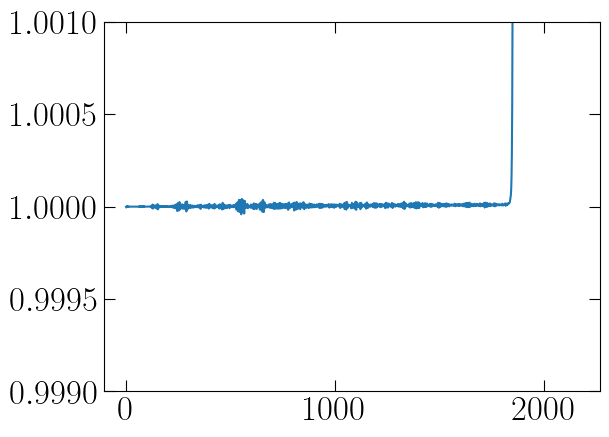

In [4]:
plt.plot(m1+m2)
plt.ylim([0.999,1.001])

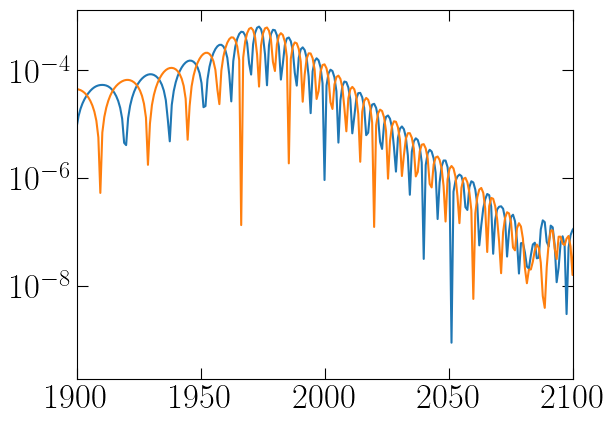

In [5]:
psi4=sim.multipoles["psi4"][110.69]
psi4_22=psi4[2,2]
plt.plot(np.abs(psi4_22.real()))
plt.plot(np.abs(psi4_22.imag()))
plt.xlim([1900,2100])
plt.yscale("log")

In [40]:
# 我们要把其转换成h
# 使用现成工具的话需要一个符合GRChombo输出的文件
# 我们自己来写存储即可

fo=open("Figure_data/Weyl4_mode_0_22.dat","w")
fo.write("#       time         integral Re         integral Im\n")
fo.write("#       r =           110.690000          110.690000\n")

for i in range(len(psi4_22.t)):
    t=psi4_22.t[i]
    psi4_r=psi4_22.values[i].real
    psi4_i=psi4_22.values[i].imag
    fo.write(f"{t:0>12.7f}   {psi4_r:+.10e}   {psi4_i:+.10e}\n")

fo.close()

In [72]:
# 然后我们把他变成rh
from Weyl4ToStrain import weyl_to_strain
weyl_to_strain("Figure_data/Weyl4_mode_0_22.dat",cut_off_low=0.01)
weyl_to_strain("Figure_data/Weyl4_mode_0_22.dat",cut_off_low=0.02)
weyl_to_strain("Figure_data/Weyl4_mode_0_22.dat",cut_off_low=0.005)
weyl_to_strain("Figure_data/Weyl4_mode_0_22.dat",cut_off_low=0.002)

Labels could not be detected from width of columns (maybe first line has nans)
Lowest frequency ratio: -0.5 (angular frequency -3.9269908169872414)
Using low cutoff: 0.01 (angular frequency 0.06283185307179587)
Labels could not be detected from width of columns (maybe first line has nans)
Lowest frequency ratio: -0.5 (angular frequency -3.9269908169872414)
Using low cutoff: 0.02 (angular frequency 0.12566370614359174)
Labels could not be detected from width of columns (maybe first line has nans)
Lowest frequency ratio: -0.5 (angular frequency -3.9269908169872414)
Using low cutoff: 0.005 (angular frequency 0.031415926535897934)
Labels could not be detected from width of columns (maybe first line has nans)
Lowest frequency ratio: -0.5 (angular frequency -3.9269908169872414)
Using low cutoff: 0.002 (angular frequency 0.012566370614359173)


/home/yuntian/vscode_codes/QNM_compare/Fitting_py/Weyl4ToStrain.py:51: RuntimeWarning: divide by zero encountered in divide
  mode_FFT_strain = - mode_FFT / freqs_w**2


(-300.0, 100.0)

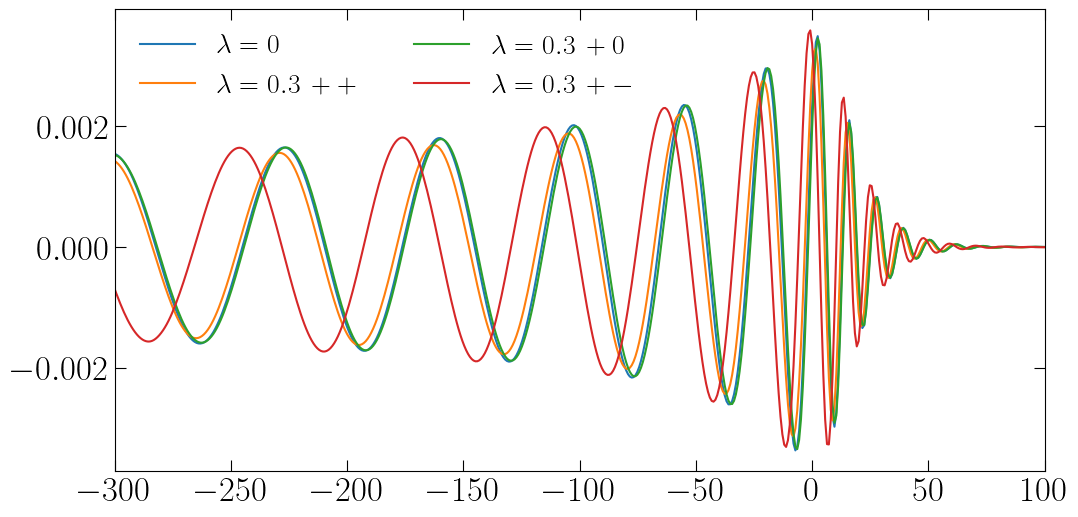

In [2]:
plt.figure(figsize=(12,6))

data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
plt.plot(t-t[np.argmax(h_abs)],h_p,label=r"$\lambda=0$")
# plt.plot(t,h_p,label=r"$\lambda=0$")

data=np.genfromtxt("Figure_data/strain_30_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
plt.plot(t-t[np.argmax(h_abs)],h_p,label=r"$\lambda=0.3\,++$")
# plt.plot(t,h_p,label=r"$\lambda=0.3\,++$")

data=np.genfromtxt("Figure_data/strain_s30_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
plt.plot(t-t[np.argmax(h_abs)],-h_p,label=r"$\lambda=0.3\,+0$")
# plt.plot(t,h_p,label=r"$\lambda=0.3\,+0$")

data=np.genfromtxt("Figure_data/strain_o30_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
plt.plot(t-t[np.argmax(h_abs)],h_p,label=r"$\lambda=0.3\,+-$")
# plt.plot(t,h_p,label=r"$\lambda=0.3\,+-$")

plt.legend(fontsize=20,frameon=False,ncol=2)
plt.xlim([-300,100])

(0.008, 0.01)

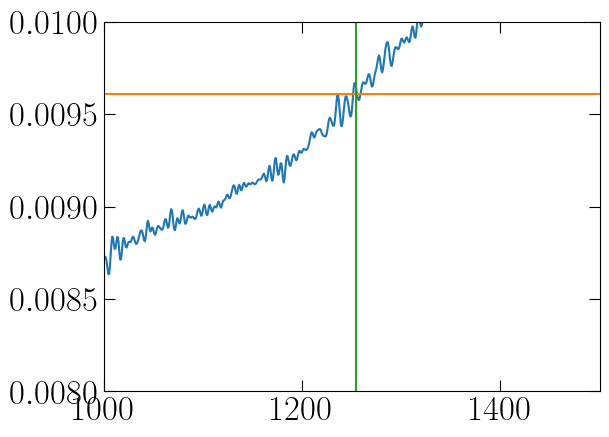

In [18]:
# 我们应该试一试如何align它们，也许我们可以选择在f_0处align来展现差别
# 我们试着来align到t_f0, f0=9.61*10**(-3)
data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]

A=np.zeros(len(t))
phi=np.zeros(len(t))
for i in range(len(t)):
    A[i]=(h_p[i]**2+h_c[i]**2)**(1/2)
    phi[i]=np.arctan2(h_c[i],h_p[i])

n=0
for i in range(len(t)-1):
    if(phi[i+1]+2*n*np.pi<phi[i]):
        n+=1
    phi[i+1]+=2*n*np.pi

f=np.zeros(len(t))
for i in range(len(t)):
    if(i==0):
        f[i]=(phi[i+1]-phi[i])/(t[i+1]-t[i])/2/np.pi
    elif(i==len(t)-1):
        f[i]=(phi[i]-phi[i-1])/(t[i]-t[i-1])/2/np.pi
    else:
        f[i]=(phi[i+1]-phi[i-1])/(t[i+1]-t[i-1])/2/np.pi

plt.plot(t,f)
plt.plot([0,2000],[9.61*10**(-3),9.61*10**(-3)])
t_f0_0=1254
plt.plot([t_f0_0,t_f0_0],[0.008,0.01])
plt.xlim([1000,1500])
plt.ylim([0.008,0.01])

(0.008, 0.01)

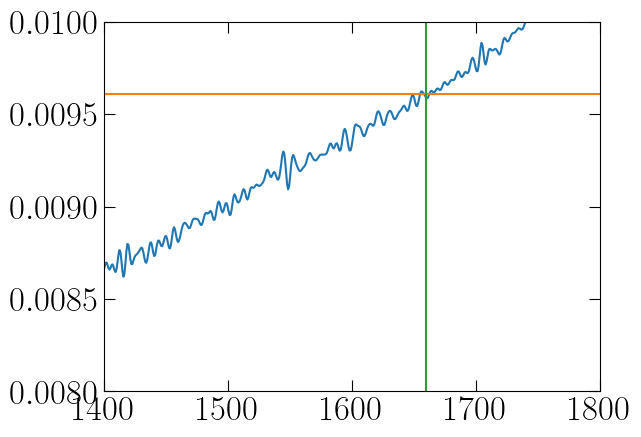

In [12]:
data=np.genfromtxt("Figure_data/strain_30_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]

A=np.zeros(len(t))
phi=np.zeros(len(t))
for i in range(len(t)):
    A[i]=(h_p[i]**2+h_c[i]**2)**(1/2)
    phi[i]=np.arctan2(h_c[i],h_p[i])

n=0
for i in range(len(t)-1):
    if(phi[i+1]+2*n*np.pi<phi[i]):
        n+=1
    phi[i+1]+=2*n*np.pi

f=np.zeros(len(t))
for i in range(len(t)):
    if(i==0):
        f[i]=(phi[i+1]-phi[i])/(t[i+1]-t[i])/2/np.pi
    elif(i==len(t)-1):
        f[i]=(phi[i]-phi[i-1])/(t[i]-t[i-1])/2/np.pi
    else:
        f[i]=(phi[i+1]-phi[i-1])/(t[i+1]-t[i-1])/2/np.pi

plt.plot(t,f)
plt.plot([0,5000],[9.61*10**(-3),9.61*10**(-3)])
t_f0_30=1660
plt.plot([t_f0_30,t_f0_30],[0.008,0.01])
plt.xlim([1400,1800])
plt.ylim([0.008,0.01])

(0.008, 0.01)

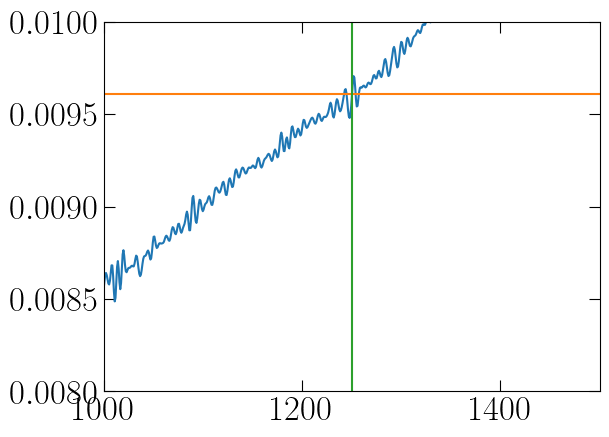

In [16]:
data=np.genfromtxt("Figure_data/strain_s30_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]

A=np.zeros(len(t))
phi=np.zeros(len(t))
for i in range(len(t)):
    A[i]=(h_p[i]**2+h_c[i]**2)**(1/2)
    phi[i]=np.arctan2(h_c[i],h_p[i])

n=0
for i in range(len(t)-1):
    if(phi[i+1]+2*n*np.pi<phi[i]):
        n+=1
    phi[i+1]+=2*n*np.pi

f=np.zeros(len(t))
for i in range(len(t)):
    if(i==0):
        f[i]=(phi[i+1]-phi[i])/(t[i+1]-t[i])/2/np.pi
    elif(i==len(t)-1):
        f[i]=(phi[i]-phi[i-1])/(t[i]-t[i-1])/2/np.pi
    else:
        f[i]=(phi[i+1]-phi[i-1])/(t[i+1]-t[i-1])/2/np.pi

plt.plot(t,f)
plt.plot([0,5000],[9.61*10**(-3),9.61*10**(-3)])
t_f0_s30=1250
plt.plot([t_f0_s30,t_f0_s30],[0.008,0.01])
plt.xlim([1000,1500])
plt.ylim([0.008,0.01])

(0.008, 0.01)

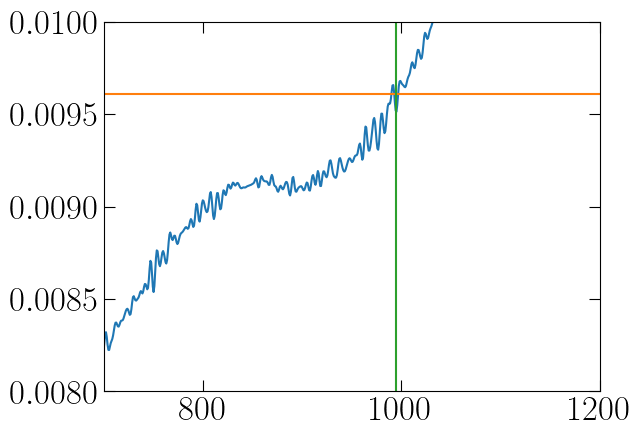

In [28]:
data=np.genfromtxt("Figure_data/strain_o30_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]

A=np.zeros(len(t))
phi=np.zeros(len(t))
for i in range(len(t)):
    A[i]=(h_p[i]**2+h_c[i]**2)**(1/2)
    phi[i]=np.arctan2(h_c[i],h_p[i])

n=0
for i in range(len(t)-1):
    if(phi[i+1]+2*n*np.pi<phi[i]):
        n+=1
    phi[i+1]+=2*n*np.pi

f=np.zeros(len(t))
for i in range(len(t)):
    if(i==0):
        f[i]=(phi[i+1]-phi[i])/(t[i+1]-t[i])/2/np.pi
    elif(i==len(t)-1):
        f[i]=(phi[i]-phi[i-1])/(t[i]-t[i-1])/2/np.pi
    else:
        f[i]=(phi[i+1]-phi[i-1])/(t[i+1]-t[i-1])/2/np.pi

plt.plot(t,f)
plt.plot([0,5000],[9.61*10**(-3),9.61*10**(-3)])
t_f0_o30=995
plt.plot([t_f0_o30,t_f0_o30],[0.008,0.01])
plt.xlim([700,1200])
plt.ylim([0.008,0.01])

64.94105591806898
61.14895077538674
-0.6035322781820766


Text(0, 0.5, '$rh_{+}^{22}/M$')

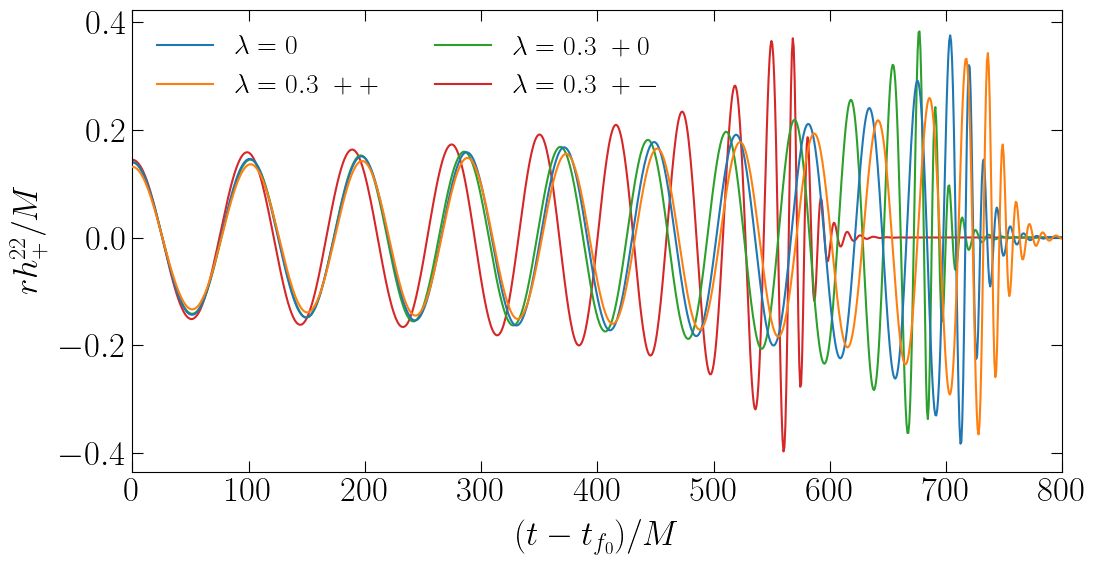

In [58]:
plt.figure(figsize=(12,6))

data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
A=np.zeros(len(t))
phi=np.zeros(len(t))
for i in range(len(t)):
    A[i]=(h_p[i]**2+h_c[i]**2)**(1/2)
    phi[i]=np.arctan2(h_c[i],h_p[i])

n=0
for i in range(len(t)-1):
    if(phi[i+1]+2*n*np.pi<phi[i]):
        n+=1
    phi[i+1]+=2*n*np.pi
t_f0_0=1254
A_0=interp1d(t,A,kind='linear')
phi_0=interp1d(t,phi,kind='linear')
plt.plot(t-t_f0_0,A_0(t)*np.cos(phi_0(t)-phi_0(t_f0_0))*110.69,label=r"$\lambda=0$",zorder=2)

t_peak_0=t[np.argmax(h_abs)]
dphi_0=phi_0(t[np.argmax(h_abs)])-phi_0(t_f0_0)
print(dphi_0)


data=np.genfromtxt("Figure_data/strain_30_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
A=np.zeros(len(t))
phi=np.zeros(len(t))
for i in range(len(t)):
    A[i]=(h_p[i]**2+h_c[i]**2)**(1/2)
    phi[i]=np.arctan2(h_c[i],h_p[i])

n=0
for i in range(len(t)-1):
    if(phi[i+1]+2*n*np.pi<phi[i]):
        n+=1
    phi[i+1]+=2*n*np.pi
t_f0_30=1660
A_30=interp1d(t,A,kind='linear')
phi_30=interp1d(t,phi,kind='linear')
plt.plot(t-t_f0_30,A_30(t)*np.cos(phi_30(t)-phi_30(t_f0_30))*110.69,label=r"$\lambda=0.3\ ++$",zorder=3)

dphi_30=phi_30(t_peak_0-t_f0_0+t_f0_30)-phi_30(t_f0_30)
print(dphi_30)

print((dphi_30-dphi_0)/2/np.pi)


data=np.genfromtxt("Figure_data/strain_s30_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]

A=np.zeros(len(t))
phi=np.zeros(len(t))
for i in range(len(t)):
    A[i]=(h_p[i]**2+h_c[i]**2)**(1/2)
    phi[i]=np.arctan2(h_c[i],h_p[i])

n=0
for i in range(len(t)-1):
    if(phi[i+1]+2*n*np.pi<phi[i]):
        n+=1
    phi[i+1]+=2*n*np.pi
t_f0_s30=1250
A_s30=interp1d(t,A,kind='linear')
phi_s30=interp1d(t,phi,kind='linear')
plt.plot(t-t_f0_s30,A_s30(t)*np.cos(phi_s30(t)-phi_s30(t_f0_s30))*110.69,label=r"$\lambda=0.3\ +0$",zorder=1)

data=np.genfromtxt("Figure_data/strain_o30_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]

A=np.zeros(len(t))
phi=np.zeros(len(t))
for i in range(len(t)):
    A[i]=(h_p[i]**2+h_c[i]**2)**(1/2)
    phi[i]=np.arctan2(h_c[i],h_p[i])

n=0
for i in range(len(t)-1):
    if(phi[i+1]+2*n*np.pi<phi[i]):
        n+=1
    phi[i+1]+=2*n*np.pi
t_f0_o30=995
A_o30=interp1d(t,A,kind='linear')
phi_o30=interp1d(t,phi,kind='linear')
plt.plot(t-t_f0_o30,A_o30(t)*np.cos(phi_o30(t)-phi_o30(t_f0_o30))*110.69,label=r"$\lambda=0.3\ +-$",zorder=0)

plt.legend(fontsize=20,frameon=False,ncol=2)
plt.xlim([0,800])
plt.xlabel(r"$(t-t_{f_0})/M$",fontsize=25)
plt.ylabel(r"$rh_{+}^{22}/M$",fontsize=25)
# plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/waveform.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

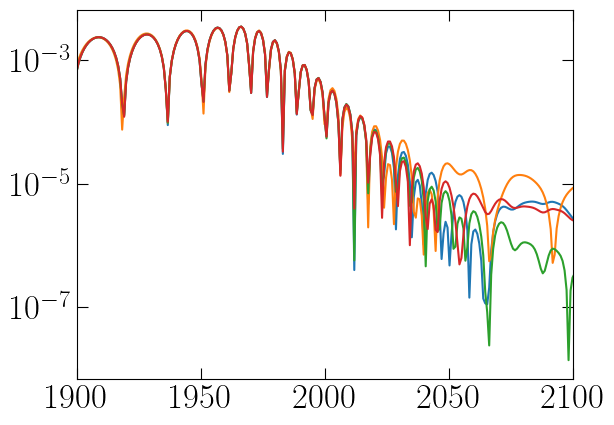

In [ ]:
data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.01.dat")
t=data[:,0]
rh_p=data[:,1]
rh_c=data[:,2]
plt.plot(t,np.abs(rh_p))
plt.xlim([1900,2100])
plt.yscale("log")

data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.02.dat")
t=data[:,0]
rh_p=data[:,1]
rh_c=data[:,2]
plt.plot(t,np.abs(rh_p))

data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.005.dat")
t=data[:,0]
rh_p=data[:,1]
rh_c=data[:,2]
plt.plot(t,np.abs(rh_p))

data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.002.dat")
t=data[:,0]
rh_p=data[:,1]
rh_c=data[:,2]
plt.plot(t,np.abs(rh_p))

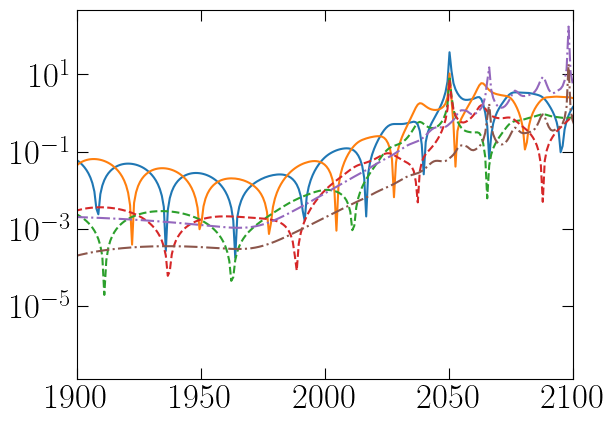

In [75]:
# 来看下相对误差，感觉也不会太大（但仅限前50....）
data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.01.dat")
t=data[:,0]
rh_p_10=data[:,1]
rh_c_10=data[:,2]

data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.02.dat")
rh_p_20=data[:,1]
rh_c_20=data[:,2]

data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.005.dat")
rh_p_05=data[:,1]
rh_c_05=data[:,2]

data=np.genfromtxt("Figure_data/strain_0_22_cutoff_low_0.002.dat")
rh_p_02=data[:,1]
rh_c_02=data[:,2]

plt.plot(t,np.abs(rh_p_20-rh_p_10)/(rh_p_10**2+rh_c_10**2)**(1/2))
plt.plot(t,np.abs(rh_c_20-rh_c_10)/(rh_p_10**2+rh_c_10**2)**(1/2))
plt.plot(t,np.abs(rh_p_05-rh_p_10)/(rh_p_10**2+rh_c_10**2)**(1/2),'--')
plt.plot(t,np.abs(rh_c_05-rh_c_10)/(rh_p_10**2+rh_c_10**2)**(1/2),'--')
plt.plot(t,np.abs(rh_p_02-rh_p_05)/(rh_p_05**2+rh_c_05**2)**(1/2),'-.')
plt.plot(t,np.abs(rh_c_02-rh_c_05)/(rh_p_05**2+rh_c_05**2)**(1/2),'-.')
plt.xlim([1900,2100])
plt.yscale("log")

In [ ]:
# 这个说明一定要转成h的话多少是有点点问题，文章里应该提及这一点，argue一下，然后指出我们将直接使用psi4进行提取
# 但这里有一个不大不小的问题，我们的t_peak如何处理
# 考虑和GR拟合的对比，我们的t_peak也许还是用h的来 (尽管新的一篇文章建议用能流峰值，但那更复杂了，而且结果不好对比)
# 我们考虑低频cutoff设置在0.005似乎比较好

In [76]:
# 我们画一张图来说明上面这个事以及我们选取的合理性
name_list=["0","1","5","10","20","30"]
i_name=5

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    pass

psi4=sim.multipoles["psi4"][110.69]
psi4_22=psi4[2,2]

fo=open("Figure_data/Weyl4_mode_30_22.dat","w")
fo.write("#       time         integral Re         integral Im\n")
fo.write("#       r =           110.690000          110.690000\n")

for i in range(len(psi4_22.t)):
    t=psi4_22.t[i]
    psi4_r=psi4_22.values[i].real
    psi4_i=psi4_22.values[i].imag
    fo.write(f"{t:0>12.7f}   {psi4_r:+.10e}   {psi4_i:+.10e}\n")

fo.close()

from Weyl4ToStrain import weyl_to_strain
weyl_to_strain("Figure_data/Weyl4_mode_30_22.dat",cut_off_low=0.01)
weyl_to_strain("Figure_data/Weyl4_mode_30_22.dat",cut_off_low=0.005)
weyl_to_strain("Figure_data/Weyl4_mode_30_22.dat",cut_off_low=0.0025)

Labels could not be detected from width of columns (maybe first line has nans)
Lowest frequency ratio: -0.5 (angular frequency -3.9269908169872414)
Using low cutoff: 0.01 (angular frequency 0.06283185307179587)
Labels could not be detected from width of columns (maybe first line has nans)
Lowest frequency ratio: -0.5 (angular frequency -3.9269908169872414)
Using low cutoff: 0.005 (angular frequency 0.031415926535897934)
Labels could not be detected from width of columns (maybe first line has nans)
Lowest frequency ratio: -0.5 (angular frequency -3.9269908169872414)
Using low cutoff: 0.0025 (angular frequency 0.015707963267948967)


/home/yuntian/vscode_codes/QNM_compare/Fitting_py/Weyl4ToStrain.py:51: RuntimeWarning: divide by zero encountered in divide
  mode_FFT_strain = - mode_FFT / freqs_w**2


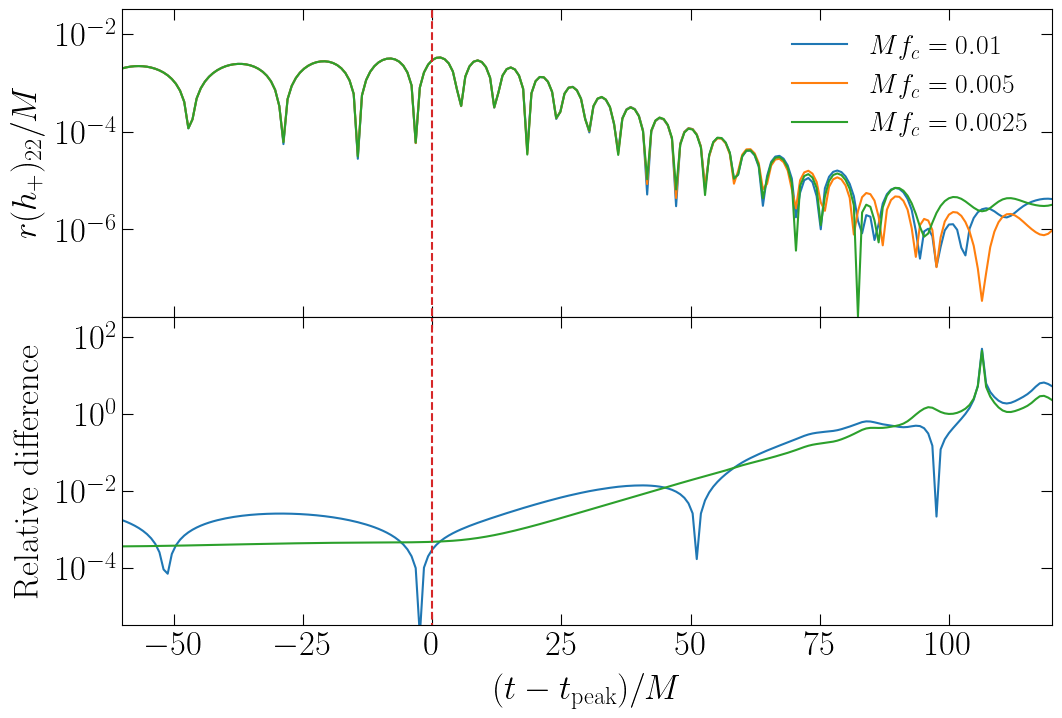

In [134]:
fig,axes=plt.subplots(2,1,figsize=(12,8),sharex=True)
plt.subplots_adjust(hspace=0)

data=np.genfromtxt("Figure_data/strain_30_22_cutoff_low_0.005.dat")
t=data[:,0]
rh_p_005=data[:,1]
rh_c_005=data[:,2]
rh_005_abs=(rh_p_005**2+rh_c_005**2)**(1/2)
index_peak=np.argmax(rh_005_abs)

data=np.genfromtxt("Figure_data/strain_30_22_cutoff_low_0.01.dat")
rh_p_01=data[:,1]
rh_c_01=data[:,2]
axes[0].plot(t-t[index_peak],np.abs(rh_p_01))

data=np.genfromtxt("Figure_data/strain_30_22_cutoff_low_0.005.dat")
rh_p_005=data[:,1]
rh_c_005=data[:,2]

axes[0].plot(t-t[index_peak],np.abs(rh_p_005))
axes[0].set_yscale("log")
axes[0].set_ylim([10**(-7.8),10**(-1.5)])
axes[1].set_xlim([-60,+120])

data=np.genfromtxt("Figure_data/strain_30_22_cutoff_low_0.0025.dat")
rh_p_0025=data[:,1]
rh_c_0025=data[:,2]
axes[0].plot(t-t[index_peak],np.abs(rh_p_0025))

axes[0].legend([r"$Mf_c=0.01$",r"$Mf_c=0.005$",r"$Mf_c=0.0025$"],fontsize=20,frameon=False)


axes[1].plot(t-t[index_peak],np.abs(rh_p_01-rh_p_005)/(rh_p_005**2+rh_c_005**2)**(1/2),color='#1f77b4')
axes[1].plot(t-t[index_peak],np.abs(rh_p_0025-rh_p_005)/(rh_p_005**2+rh_c_005**2)**(1/2),color='#2ca02c')
axes[1].set_yscale("log")
axes[1].set_ylim([10**(-5.5),10**(2.5)])

axes[0].plot([0,0],[10**(-8),10**(-1)],'--')
axes[1].plot([0,0],[10**(-8),10**(3)],'--',color='#d62728')

axes[1].set_xlabel(r"$(t-t_{\rm peak})/M$",fontsize=25)
axes[0].set_ylabel(r"$r(h_{+})_{22}/M$",fontsize=25)
axes[1].set_ylabel(r"${\rm Relative\ difference}$",fontsize=25)

plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/h_recover.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [6]:
# 那么先来做一下准备工作，把大家的波形都转一下
# from Weyl4ToStrain import weyl_to_strain
name_list=["0","1","5","10","20","30","s1","s5","s10","s20","s30","o1","o5","o10","o20","o30"]
for i_name in range(len(name_list)):
    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass

    psi4=sim.multipoles["psi4"][110.69]
    psi4_22=psi4[5,5]

    fo=open("Figure_data/Weyl4_mode_"+name_list[i_name]+"_55.dat","w")
    fo.write("#       time         integral Re         integral Im\n")
    fo.write("#       r =           110.690000          110.690000\n")

    for i in range(len(psi4_22.t)):
        t=psi4_22.t[i]
        psi4_r=psi4_22.values[i].real
        psi4_i=psi4_22.values[i].imag
        fo.write(f"{t:0>12.7f}   {psi4_r:+.10e}   {psi4_i:+.10e}\n")

    fo.close()

    # weyl_to_strain("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat",cut_off_low=0.005)

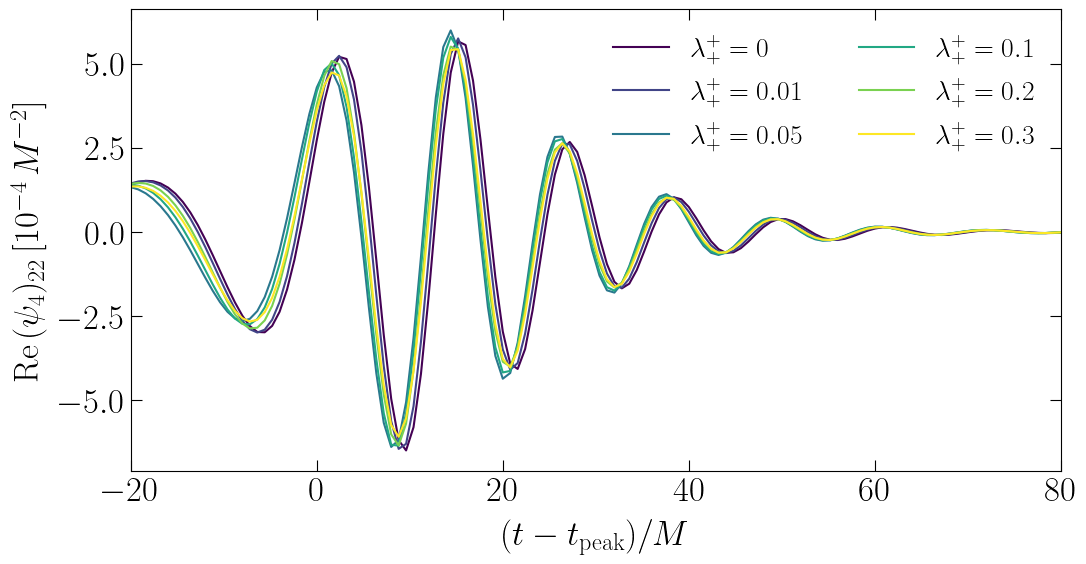

In [24]:
# 我们来画第一张图：不同lambda(++)下，22模ringdown部分信号(psi4以h的peak对齐)
from matplotlib import cm

name_list=["0","1","5","10","20","30"]
# name_list=["0","10","30"]
colors = cm.viridis(np.linspace(0, 1, len(name_list)))

plt.figure(figsize=(12,6))
for i_name in range(len(name_list)):
    # 首先计算h_peak
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)

    # 然后读入psi4来画图
    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    if(name_list[i_name]=="10" or name_list[i_name]=="20"):
        plt.plot(t-t[index_peak],-psi4_i*10**4,color=colors[i_name])
    else:
        plt.plot(t-t[index_peak],psi4_r*10**4,color=colors[i_name])

plt.xlim([-20,80])
# plt.yscale("log")
plt.xlabel(r"$(t-t_{\rm peak})/M$",fontsize=25)
plt.ylabel(r"${\rm Re}\,(\psi_4)_{22}\,[10^{-4}\,M^{-2}]$",fontsize=25)

plt.legend([r"$\lambda_+^+=0$",r"$\lambda_+^+=0.01$",r"$\lambda_+^+=0.05$",r"$\lambda_+^+=0.1$",r"$\lambda_+^+=0.2$",r"$\lambda_+^+=0.3$"]
           ,fontsize=20,frameon=False,ncol=2)

plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/psi4_22.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

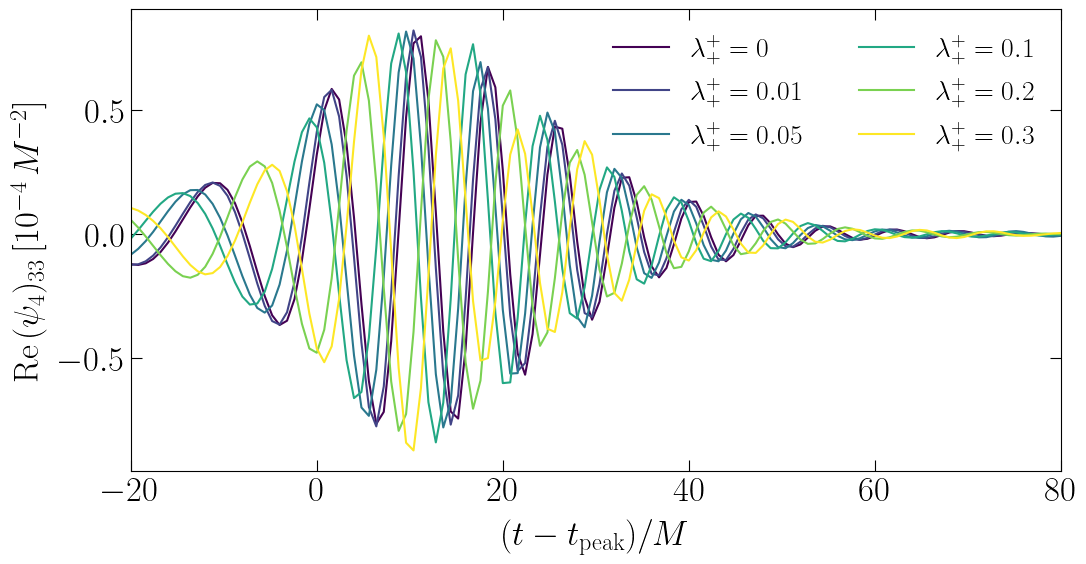

In [29]:
# 尽管如此，我们还要画两张图，一张是33mode的，另一张/两张是对，比如另一个系列的

name_list=["0","1","5","10","20","30"]
# name_list=["0","10","30"]
colors = cm.viridis(np.linspace(0, 1, len(name_list)))

plt.figure(figsize=(12,6))
for i_name in range(len(name_list)):
    # 首先计算h_peak
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)

    # 然后读入psi4来画图
    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_33.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    if(name_list[i_name]=="10" or name_list[i_name]=="20"):
        plt.plot(t-t[index_peak],-psi4_i*10**4,color=colors[i_name])
    else:
        plt.plot(t-t[index_peak],psi4_r*10**4,color=colors[i_name])

plt.xlim([-20,80])
# plt.yscale("log")
plt.xlabel(r"$(t-t_{\rm peak})/M$",fontsize=25)
plt.ylabel(r"${\rm Re}\,(\psi_4)_{33}\,[10^{-4}\,M^{-2}]$",fontsize=25)

plt.legend([r"$\lambda_+^+=0$",r"$\lambda_+^+=0.01$",r"$\lambda_+^+=0.05$",r"$\lambda_+^+=0.1$",r"$\lambda_+^+=0.2$",r"$\lambda_+^+=0.3$"]
           ,fontsize=20,frameon=False,ncol=2)

plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/psi4_33.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

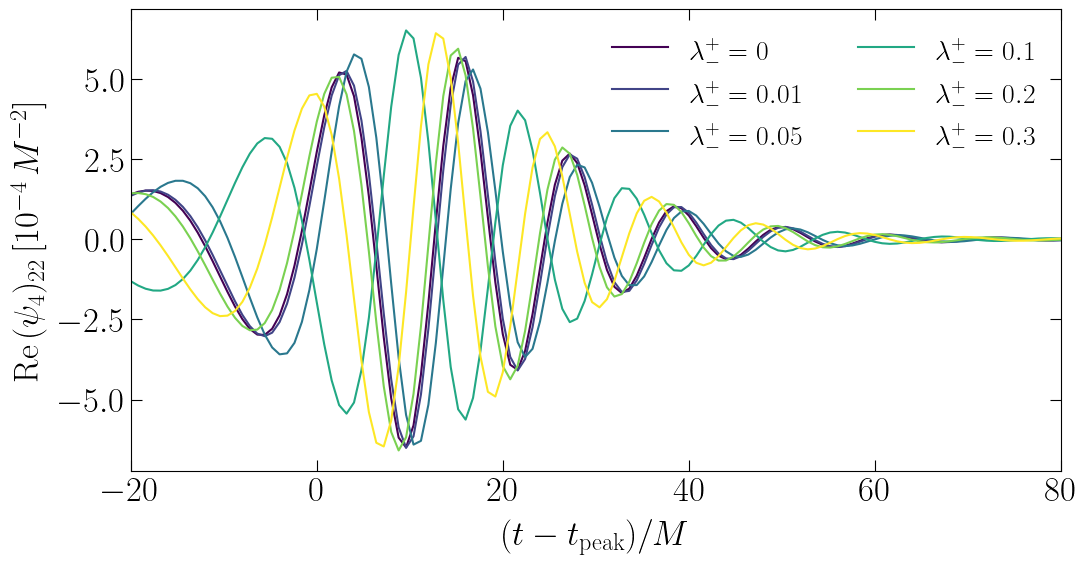

In [49]:
# name_list=["0","o1","o5","o10","o20","o30"]
name_list=["0","o1","o5","o10","o20","o30"]
colors = cm.viridis(np.linspace(0, 1, len(name_list)))

plt.figure(figsize=(12,6))
for i_name in range(len(name_list)):
    # 首先计算h_peak
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)

    # 然后读入psi4来画图
    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    # if(name_list[i_name]=="o10" or name_list[i_name]=="o20"):
    #     plt.plot(t-t[index_peak],-psi4_i*10**4,color=colors[i_name])
    # else:
    #     plt.plot(t-t[index_peak],psi4_r*10**4,color=colors[i_name])
    plt.plot(t-t[index_peak],psi4_r*10**4,color=colors[i_name])
    # plt.plot(t-t[index_peak],psi4_i*10**4,'--',color=colors[i_name])


plt.xlim([-20,80])
# plt.yscale("log")
plt.xlabel(r"$(t-t_{\rm peak})/M$",fontsize=25)
plt.ylabel(r"${\rm Re}\,(\psi_4)_{22}\,[10^{-4}\,M^{-2}]$",fontsize=25)

plt.legend([r"$\lambda_-^+=0$",r"$\lambda_-^+=0.01$",r"$\lambda_-^+=0.05$",r"$\lambda_-^+=0.1$",r"$\lambda_-^+=0.2$",r"$\lambda_-^+=0.3$"]
           ,fontsize=20,frameon=False,ncol=2)

plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/psi4_22_o.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

(-20.0, 80.0)

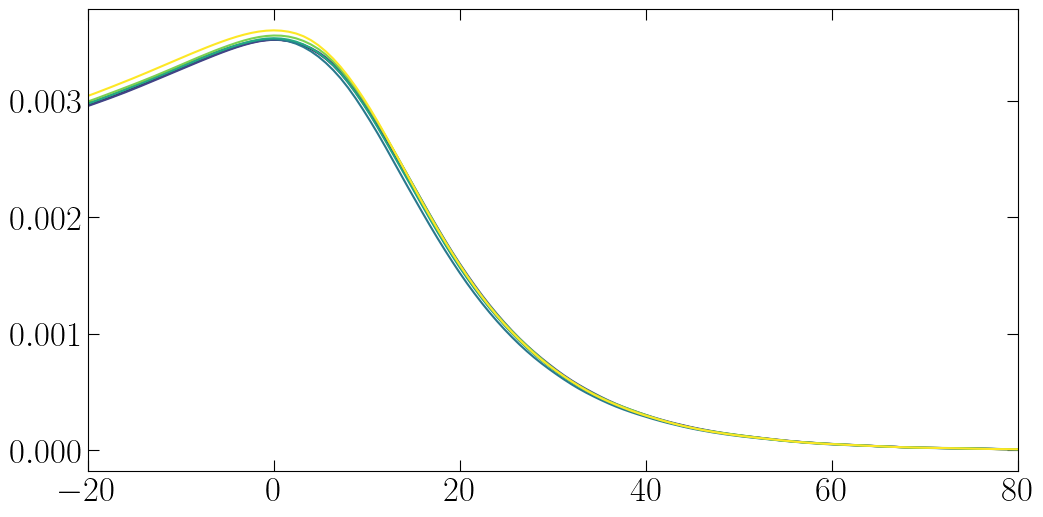

In [53]:
name_list=["0","o1","o5","o10","o20","o30"]
colors = cm.viridis(np.linspace(0, 1, len(name_list)))

plt.figure(figsize=(12,6))
for i_name in range(len(name_list)):
    # 首先计算h_peak
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)

    # 然后读入psi4来画图
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    psi4_abs=(psi4_r**2+psi4_i**2)**(1/2)
    # if(name_list[i_name]=="o10" or name_list[i_name]=="o20"):
    #     plt.plot(t-t[index_peak],-psi4_i*10**4,color=colors[i_name])
    # else:
    #     plt.plot(t-t[index_peak],psi4_r*10**4,color=colors[i_name])
    plt.plot(t-t[index_peak],psi4_abs,color=colors[i_name])
    # plt.plot(t-t[index_peak],psi4_i*10**4,'--',color=colors[i_name])

plt.xlim([-20,80])

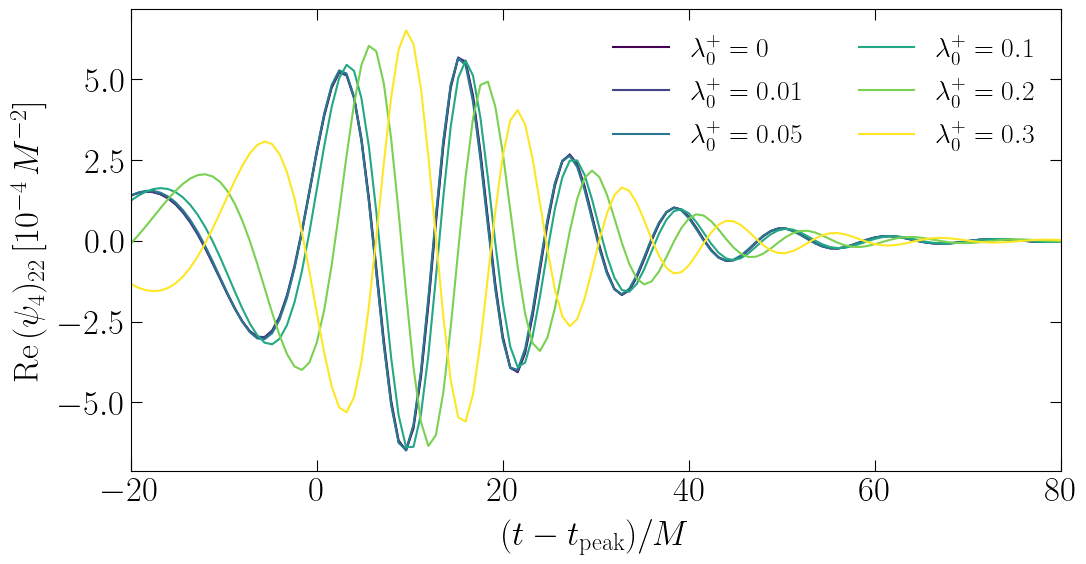

In [56]:
name_list=["0","s1","s5","s10","s20","s30"]
colors = cm.viridis(np.linspace(0, 1, len(name_list)))

plt.figure(figsize=(12,6))
for i_name in range(len(name_list)):
    # 首先计算h_peak
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)

    # 然后读入psi4来画图
    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    # if(name_list[i_name]=="o10" or name_list[i_name]=="o20"):
    #     plt.plot(t-t[index_peak],-psi4_i*10**4,color=colors[i_name])
    # else:
    #     plt.plot(t-t[index_peak],psi4_r*10**4,color=colors[i_name])
    plt.plot(t-t[index_peak],psi4_r*10**4,color=colors[i_name])
    # plt.plot(t-t[index_peak],psi4_i*10**4,'--',color=colors[i_name])


plt.xlim([-20,80])
# plt.yscale("log")
plt.xlabel(r"$(t-t_{\rm peak})/M$",fontsize=25)
plt.ylabel(r"${\rm Re}\,(\psi_4)_{22}\,[10^{-4}\,M^{-2}]$",fontsize=25)

plt.legend([r"$\lambda_0^+=0$",r"$\lambda_0^+=0.01$",r"$\lambda_0^+=0.05$",r"$\lambda_0^+=0.1$",r"$\lambda_0^+=0.2$",r"$\lambda_0^+=0.3$"]
           ,fontsize=20,frameon=False,ncol=2)



plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/psi4_22_s.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
# 下面我们要实际的拟合QNM了，可能想改进一下拟合的程序
# 有两方面：一方面是拟合的方法以及QNM模型
# 另一方面是之后的数据读取：模式提取的time window可取为和模式相关：考虑到我们的模式虽有偏差，但和GR不会差的太远，我们可以用GR来看
# 我们是否有必要用混合回去的h进行拟合？还是依然在Ylm空间中进行？
# 我们还是用老的拟合办法吧，虽然有球协-椭球协混合，以及由于super rest frame 问题带来的混合，但我们反正也不会去修正这个frame效果
# 在每个分量中都只关心其本身，和高阶n，虽然相当于没有完全利用信息，但应该问题不大
# 可能主要关注还是如何从拟合结果中提取以及表明这种结果的合理性
# 但不管怎么样，我们似乎还是应该使用类似VarPro的方法来拟合区分线性和非线性变量

In [59]:
# 以30为例来进行一下拟合和提取并画图说明（即如何处理单个问题）

import My_Fitting

data=np.genfromtxt("Figure_data/strain_"+"10"+"_22_cutoff_low_0.005.dat")
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
index_peak=np.argmax(h_abs)


data=np.genfromtxt("Figure_data/Weyl4_mode_"+"10"+"_22.dat")
t=data[:,0]
psi4_r=data[:,1]
psi4_i=data[:,2]
index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
index_100=np.argmin(np.abs(t-t[index_peak]-100))+1


t_arr=np.zeros(index_100-index_peak)
psi4_r_arr=np.zeros(index_100-index_peak)
psi4_i_arr=np.zeros(index_100-index_peak)
t0_arr=np.zeros(index_50-index_peak)
N_guess=10
N_free=5
N_fix=0
omega_fix=[]
pert=10**(-3)
N_pert_guess=20
max_nfev=200000
for i in range(index_100-index_peak):
    t_arr[i]=t[index_peak+i]-t[index_peak]
    psi4_r_arr[i]=psi4_r[index_peak+i]
    psi4_i_arr[i]=psi4_i[index_peak+i]
    
for i in range(index_50-index_peak):
    t0_arr[i]=t[index_peak+i]-t[index_peak]

params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)



initial guess:


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


initial guess index:  5
min loss: 6.78315765202242e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:49<00:00,  1.27it/s]


In [ ]:
# 这里就显出之前搞笑的问题了,t0_arr其实取得再密应当是没用的,我们这分辨率就这么点,实际上就63个有效点

In [60]:
name_list=["0","1","5","10","20","30"]
i_name=3

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    pass

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

M=1
M_f=mt(t[index_100])
a_f=st(t[index_100])/M_f**2
q_f=qt(t[index_100])/M_f

print(M_f,a_f,q_f)

0.952988361114351 0.6766872571119554 0.10250278731607375


Text(0, 0.5, '$M\\omega_{i}$')

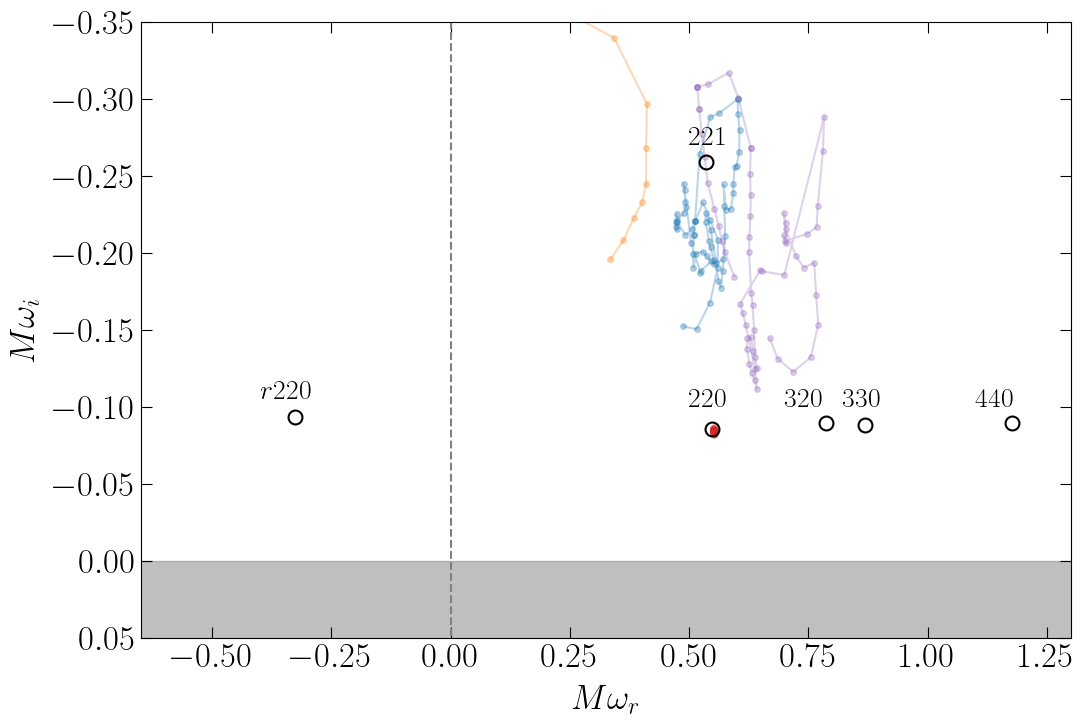

In [61]:
fig, ax = plt.subplots(figsize=(12,8))

# 绘制拟合结果
for k in range(N_free):
    omega_r_fit=np.zeros(len(t0_arr))
    omega_i_fit=np.zeros(len(t0_arr))
    for i in range(len(t0_arr)):
        omega_r_fit[i]=params_fit[i][2*N_fix+4*k+2]
        omega_i_fit[i]=params_fit[i][2*N_fix+4*k+3]

    ax.plot(omega_r_fit,omega_i_fit,alpha=0.3,marker="o",markersize=4)

# omega_list=["c,2,2,0","c,2,2,1","c,2,2,2", # natural linear modes
#             "c,3,2,0","c,4,2,0","c,5,2,0","c,6,2,0","c,7,2,0","c,8,2,0", # mixing modes
#             "constant", # constant mode
#             "r,2,2,0", # retrograde modes
#             ] 

omega_list=["c,2,2,0","r,2,2,0","c,2,2,1","c,3,2,0","c,3,3,0","c,4,4,0"]

def to_latex_format(s):
    return rf'$\rm {s}$'

texts=[]
for i in range(len(omega_list)):
    first_part=omega_list[i].split(',')[0]
    if first_part == "constant":
        omega_x=0
        omega_y=0
    elif first_part == "c":
        parts=omega_list[i].split(',')[1:]
        l,m,n=map(int,parts)
        omega_i=qnm.modes_cache(s=-2,l=l,m=m,n=n)(a=a_f)[0]
        omega_x=omega_i.real*M/M_f
        omega_y=omega_i.imag*M/M_f
    elif first_part == "r":
        parts=omega_list[i].split(',')[1:]
        l,m,n=map(int,parts)
        omega_i=qnm.modes_cache(s=-2,l=l,m=-m,n=n)(a=a_f)[0]
        omega_x=-omega_i.real*M/M_f
        omega_y=omega_i.imag*M/M_f
    else:
        omega_x=-100
        omega_y=-100
        print("invalid mode name")
    ax.plot(omega_x,omega_y,marker='o',markeredgecolor='black',\
    markerfacecolor='none',markersize=10,markeredgewidth=1.5)
#     texts.append(ax.annotate(to_latex_format(omega_list[i]),[omega_x,omega_y],\
#     ha='center',fontsize=20))

# adjust_text(texts,expand_text=(1.4, 2), expand_points=(1.0, 1.2))
ax.text(0.5,-0.1,r"$220$",fontsize=20)
ax.text(0.5,-0.27,r"$221$",fontsize=20)
ax.text(0.7,-0.1,r"$320$",fontsize=20)
ax.text(0.82,-0.1,r"$330$",fontsize=20)
ax.text(1.1,-0.1,r"$440$",fontsize=20)
ax.text(-0.4,-0.105,r"$r220$",fontsize=20)

ax.set_xlim([-0.65,1.3])
ax.set_ylim([-0.35,0.05])
ax.invert_yaxis()

# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.plot([0,0],[-1,1],'--',color="gray")

x = np.array([-1, 2])
y1 = np.array([1, 1])
ax.fill_between(x, y1, color="gray", alpha=0.5)


plt.xlabel(r"$M\omega_{r}$",fontsize=25)
plt.ylabel(r"$M\omega_{i}$",fontsize=25)

# plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/fit_30_22.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

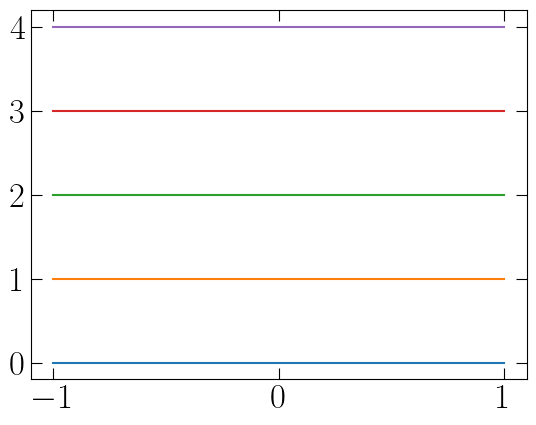

In [138]:
for i in range(5):
    plt.plot([-1,1],[i,i])

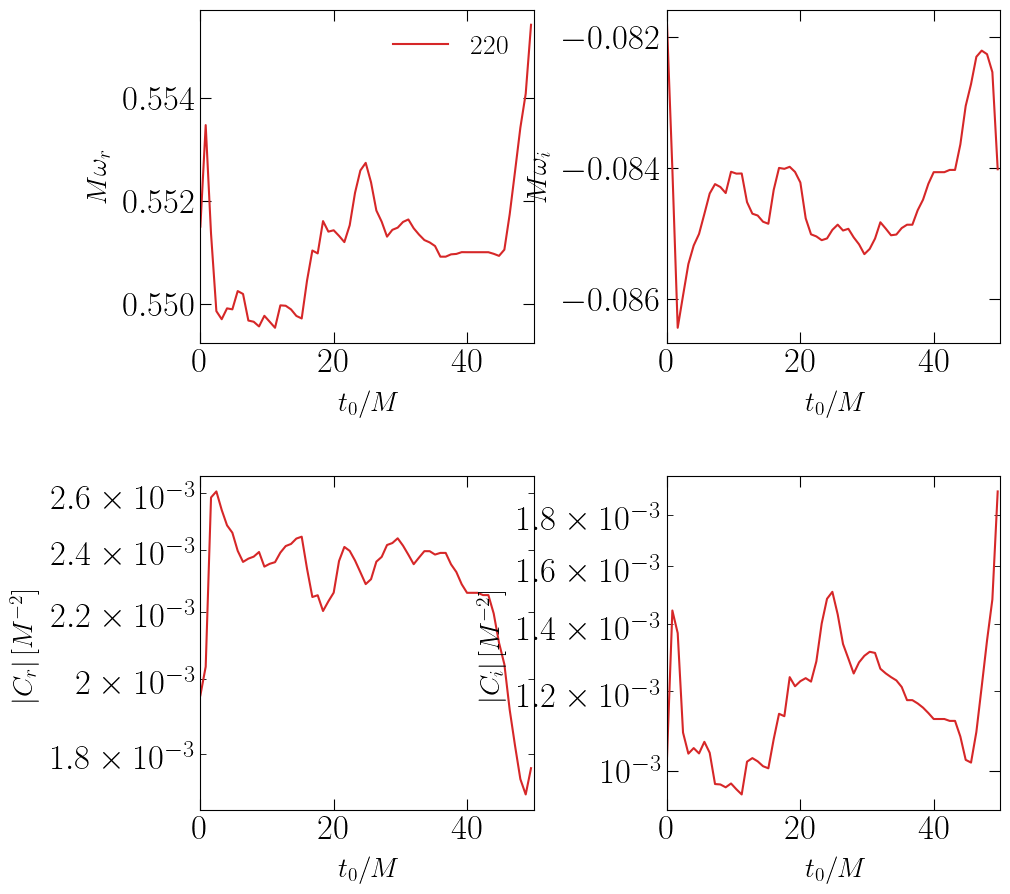

In [ ]:
ks=[3]
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', "#9367bdff"]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

axs[0,0].set_xlabel(r"$t_0/M$",fontsize=20)
axs[0,0].set_ylabel(r"$M\omega_r$",fontsize=20)
axs[0,0].set_xlim([0,50])

axs[0,1].set_xlabel(r"$t_0/M$",fontsize=20)
axs[0,1].set_ylabel(r"$M\omega_i$",fontsize=20)
axs[0,1].set_xlim([0,50])

axs[1,0].set_xlabel(r"$t_0/M$",fontsize=20)
axs[1,0].set_ylabel(r"$|C_r|\,[M^{-2}]$",fontsize=20)
axs[1,0].set_xlim([0,50])
# axs[1,0].set_ylim([-0.01,0.01])
axs[1,0].set_yscale("log")

axs[1,1].set_xlabel(r"$t_0/M$",fontsize=20)
axs[1,1].set_ylabel(r"$|C_i|\,[M^{-2}]$",fontsize=20)
axs[1,1].set_xlim([0,50])
# axs[1,1].set_ylim([0,1])
axs[1,1].set_yscale("log")

for k in ks:
    color=colors[k]
    omega_r_fit=np.zeros(len(t0_arr))
    omega_i_fit=np.zeros(len(t0_arr))
    A_fit=np.zeros(len(t0_arr))
    phi_fit=np.zeros(len(t0_arr))
    for i in range(len(t0_arr)):
        omega_r_fit[i]=params_fit[i][4*k+2]
        omega_i_fit[i]=params_fit[i][4*k+3]

        A_fit[i]=np.abs(params_fit[i][4*k+0])
        if(params_fit[i][4*k+0]<0):
            phi_fit[i]=params_fit[i][4*k+1]+np.pi
        else:
            phi_fit[i]=params_fit[i][4*k+1]
        phi_fit[i]%=(2.0*np.pi)

    # 但我们不画A-phi,我们画Cr Ci
    C_r=np.zeros(len(t0_arr))
    C_i=np.zeros(len(t0_arr))
    for i in range(len(t0_arr)):
        C_r[i]=A_fit[i]*np.cos(phi_fit[i])
        C_i[i]=-A_fit[i]*np.sin(phi_fit[i])
        
    axs[0,0].plot(t0_arr,omega_r_fit,c=color)
    axs[0,1].plot(t0_arr,omega_i_fit,c=color)
    # axs[1,0].plot(t0_arr,A_fit,c=color)
    # axs[1,1].plot(t0_arr,phi_fit/2/np.pi,c=color)
    axs[1,0].plot(t0_arr,np.abs(C_r),c=color)
    axs[1,1].plot(t0_arr,np.abs(C_i),c=color)

axs[0,0].legend([r"$220$",r"$221$"],fontsize=20,frameon=False, ncol=2)

# plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/mode_sta.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [2]:
# 来定义220模的拟合
bkj_220r=[[1.0,       0.537583,   -2.990402,  1.503421],
     [-1.899567, -2.128633,  6.626680,   -2.903790],
     [1.015454,  2.147094,   -4.672847,  1.891731],
     [-0.111430, -0.581706,  1.021061,   -0.414517]]

ckj_220r=[[1.0,          0.548651,   -3.141145,  1.636377],
     [-2.238461,    -2.291933,  7.695570,   -3.458474],
     [1.581677,     2.662938,   -6.256090,  2.494264],
     [-0.341455,    -0.930069,  1.688288,   -0.612643]]

bkj_220i=[[1.0,          -2.721789,     2.472860,      -0.750015],
          [-2.533958,    7.181110,      -6.870324,     2.214689],
          [2.102750,     -6.317887,     6.206452,      -1.980749],
          [-0.568636,    1.857404,      -1.820547,     0.554722]]

ckj_220i=[[1.0,          -2.732346,     2.495049,      -0.761581],
          [-2.498341,    7.089542,      -6.781334,     2.181880],
          [2.056918,     -6.149334,     6.010021,      -1.909275],
          [-0.557557,    1.786783,      -1.734461,     0.524997]]

# 330
bkj_330r=[[1.0,         -0.311963,      -1.457057,      0.825692],
          [-1.928277,   -0.026433,      3.139427,       -1.484557],
          [1.044039,    0.545708,       -2.188569,      0.940019],
          [-0.112303,   -0.226402,      0.482482,       -0.204299]]

ckj_330r=[[1.0,         -0.299153,      -1.591595,      0.938987],
          [-2.265230,   0.058508,       3.772084,       -1.852247],
          [1.624332,    0.533096,       -3.007197,      1.285026],
          [-0.357651,   -0.300599,      0.810387,       -0.314715]]

bkj_330i=[[1.0,         -2.813977,      2.666759,       -0.850618],
          [-2.163575,   6.934304,       -7.425335,      2.640936],
          [1.405496,    -5.678573,      6.621826,       -2.345713],
          [-0.241561,   1.555843,       -1.890365,      0.637480]]

ckj_330i=[[1.0,         -2.820763,      2.680557,       -0.857462],
          [-2.130446,   6.825101,       -7.291058,      2.583282],
          [1.394144,    -5.533669,      6.393699,       -2.254239],
          [-0.261229,   1.517744,       -1.810579,      0.608393]]

# 221
bkj_221r=[[1.0,         -2.918987,      2.866252,       -0.944554],
          [-1.850299,   7.321955,       -8.783456,      3.292966],
          [0.944088,    -5.584876,      7.675096,       -3.039132],
          [-0.088458,   1.198758,       -1.973222,      0.838109]]

ckj_221r=[[1.0,         -2.941138,      2.907859,       -0.964407],
          [-2.250169,   8.425183,       -9.852886,      3.660289],
          [1.611393,    -7.869432,      9.999751,       -3.737205],
          [-0.359285,   2.392321,       -3.154979,      1.129776]]

bkj_221i=[[1.0,         -3.074983,      3.182195,       -1.105297],
          [0.366066,    4.296285,       -9.700146,      5.016955],
          [-3.290350,   -0.844265,      9.999863,       -5.818349],
          [1.927196,    -0.401520,      -3.537667,      2.077991]]

ckj_221i=[[1.0,         -3.079686,      3.191889,       -1.110140],
          [0.388928,    4.159242,       -9.474149,      4.904881],
          [-3.119527,   -0.914668,      9.767356,       -5.690517],
          [1.746957,    -0.240680,      -3.505359,     2.049254]]

In [8]:
name_list=["30"]
i_name=0

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    pass

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

M=1
M_f=mt(2400)
a_f=st(2400)/M_f**2
q_f=qt(2400)/M_f

print(M_f,a_f,q_f)


num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_220r[k][j]*a_f**k*q_f**j
        den+=ckj_220r[k][j]*a_f**k*q_f**j

omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_220i[k][j]*a_f**k*q_f**j
        den+=ckj_220i[k][j]*a_f**k*q_f**j

omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)

omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]

print(np.abs(omega_KN_220_r-omega_GR_220.real)/np.abs(omega_GR_220.real))
print(np.abs(omega_KN_220_i-omega_GR_220.imag)/np.abs(omega_GR_220.imag))

0.954367969457101 0.6459900211941669 0.30708077515557636
0.030994406068993438
0.00920672330852295


In [ ]:
# 下面以30为例展示一下固定频率拟合的图
name_list=["0","1","5","10","20","30"]
i_name=5

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    pass

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

M=1
M_f=mt(t[index_100])
a_f=st(t[index_100])/M_f**2
q_f=qt(t[index_100])/M_f

print(M_f,a_f,q_f)

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_220r[k][j]*a_f**k*q_f**j
        den+=ckj_220r[k][j]*a_f**k*q_f**j

omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_220i[k][j]*a_f**k*q_f**j
        den+=ckj_220i[k][j]*a_f**k*q_f**j

omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_221r[k][j]*a_f**k*q_f**j
        den+=ckj_221r[k][j]*a_f**k*q_f**j

omega_KN_221_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_221i[k][j]*a_f**k*q_f**j
        den+=ckj_221i[k][j]*a_f**k*q_f**j

omega_KN_221_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

import My_Fitting

data=np.genfromtxt("Figure_data/strain_"+"30"+"_22_cutoff_low_0.005.dat")
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
index_peak=np.argmax(h_abs)


data=np.genfromtxt("Figure_data/Weyl4_mode_"+"30"+"_22.dat")
t=data[:,0]
psi4_r=data[:,1]
psi4_i=data[:,2]
index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
index_100=np.argmin(np.abs(t-t[index_peak]-100))+1


t_arr=np.zeros(index_100-index_peak)
psi4_r_arr=np.zeros(index_100-index_peak)
psi4_i_arr=np.zeros(index_100-index_peak)
t0_arr=np.zeros(index_50-index_peak)
N_guess=10
N_free=3
N_fix=2
omega_fix=[[omega_KN_220_r,omega_KN_220_i],[omega_KN_221_r,omega_KN_221_i]]
pert=10**(-3)
N_pert_guess=20
max_nfev=200000
for i in range(index_100-index_peak):
    t_arr[i]=t[index_peak+i]-t[index_peak]
    psi4_r_arr[i]=psi4_r[index_peak+i]
    psi4_i_arr[i]=psi4_i[index_peak+i]
    
for i in range(index_50-index_peak):
    t0_arr[i]=t[index_peak+i]-t[index_peak]

params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)


0.954369525297543 0.6459866157189657 0.30708129086449204
initial guess:


100%|██████████| 10/10 [00:03<00:00,  2.51it/s]


initial guess index:  3
min loss: 1.414904230772794e-10
fitting for N_free =  3


 87%|████████▋ | 55/63 [00:51<00:04,  1.76it/s]/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/jaxfit/common_scipy.py:330: RuntimeWarning: overflow encountered in divide
  ratio = actual_reduction / predicted_reduction
100%|██████████| 63/63 [00:55<00:00,  1.13it/s]


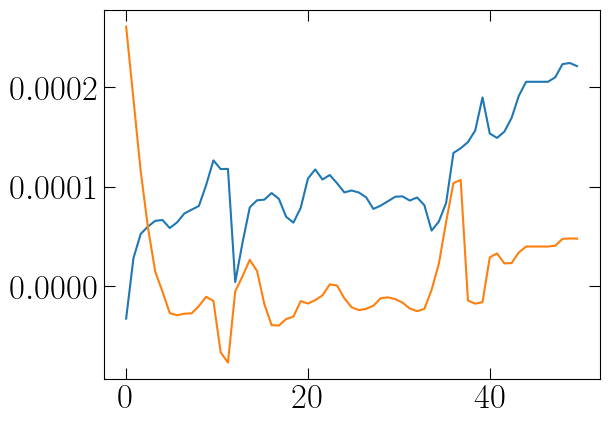

In [110]:
A_220=np.zeros(len(t0_arr))
phi_220=np.zeros(len(t0_arr))
A_221=np.zeros(len(t0_arr))
phi_221=np.zeros(len(t0_arr))

C_r_220=np.zeros(len(t0_arr))
C_i_220=np.zeros(len(t0_arr))
C_r_221=np.zeros(len(t0_arr))
C_i_221=np.zeros(len(t0_arr))

for i in range(len(t0_arr)):
    A_220[i]=params_fit[i][0]
    phi_220[i]=params_fit[i][1]
    A_221[i]=params_fit[i][2]
    phi_221[i]=params_fit[i][3]

    C_r_220[i]=A_220[i]*np.cos(phi_220[i])
    C_i_220[i]=-A_220[i]*np.sin(phi_220[i])
    C_r_221[i]=A_221[i]*np.cos(phi_221[i])
    C_i_221[i]=-A_221[i]*np.sin(phi_221[i])

plt.plot(t0_arr,C_r_221)
plt.plot(t0_arr,C_i_221)

In [27]:
def sta_cal_A(C_r_list,C_i_list):
    n=len(C_r_list)
    A=(C_r_list**2+C_i_list**2)**(1/2)
    A_ave=np.average(A)
    C_r_std=np.std(C_r_list)
    C_i_std=np.std(C_i_list)
    return (C_r_std**2+C_i_std**2)**(1/2)/np.abs(A_ave)

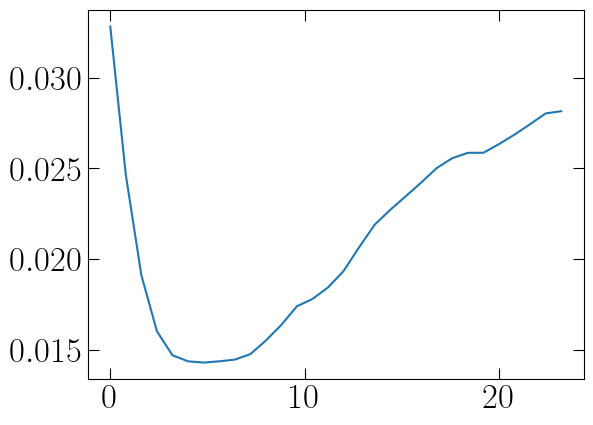

In [87]:
# 直接这样的图并不令人满意，考虑将criteria对应的那段给话上去
# 仿照最新文章，我们的criteria将与模式虚部挂钩
# 取 sigma=0.2 和 dA = 10 (即dt=-ln10/omega_i_GR) 
# 取 dA=10主要是考虑到数据长度和质量，另外这个选择其实只是在221上比较激进，但大约也是10M左右

omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M

# 先来处理220
dt=-np.log(10.0)/omega_GR_220.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=sta_cal_A(C_r_220[i:index_dt],C_i_220[i:index_dt])

plt.plot(t0_arr[0:n_sta],sta_list)

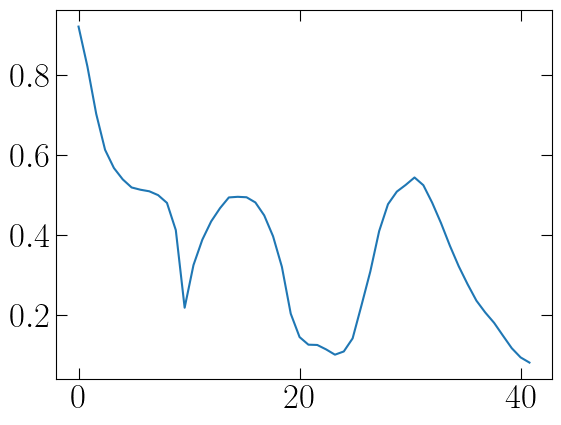

In [88]:
omega_GR_221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=a_f)[0]/M_f*M

dt=-np.log(10.0)/omega_GR_221.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=sta_cal_A(C_r_221[i:index_dt],C_i_221[i:index_dt])

plt.plot(t0_arr[0:n_sta],sta_list)

# 这怎么不太稳定啊。。。得加大猜测次数和微扰次数

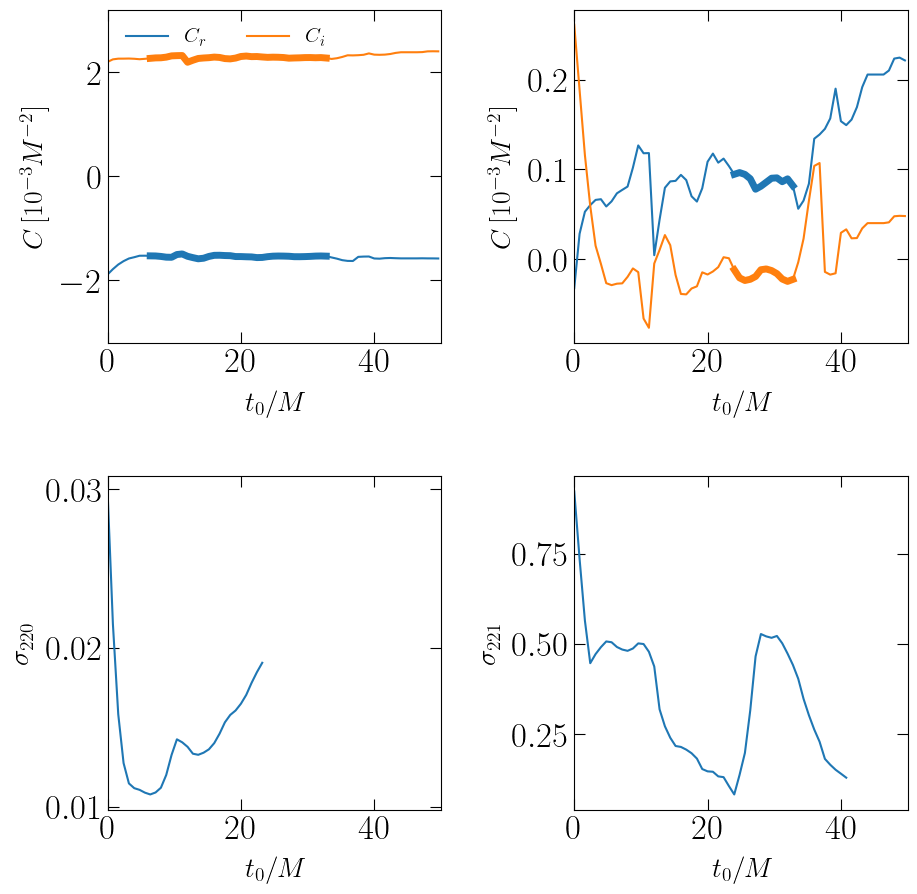

In [ ]:
dA=10.0

# 我们还是来画一个四宫格图
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

axes[0,0].plot(t0_arr,C_r_220*10**3)
axes[0,0].plot(t0_arr,C_i_220*10**3)
axes[0,0].set_xlim([0,50])
axes[0,0].set_xlabel(r"$t_0/M$",fontsize=20)
axes[0,0].set_ylabel(r"$C\,[10^{-3} M^{-2}]$",fontsize=20)
axes[0,0].set_ylim([-3.2,3.2])
axes[0,0].legend([r"$C_r$",r"$C_i$"],fontsize=15,frameon=False,ncol=2)

axes[0,1].plot(t0_arr,C_r_221*10**3)
axes[0,1].plot(t0_arr,C_i_221*10**3)
axes[0,1].set_xlim([0,50])
axes[0,1].set_xlabel(r"$t_0/M$",fontsize=20)
axes[0,1].set_ylabel(r"$C\,[10^{-3} M^{-2}]$",fontsize=20)


omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M

dt=-np.log(dA)/omega_GR_220.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=sta_cal_A(C_r_220[i:index_dt],C_i_220[i:index_dt])

axes[1,0].plot(t0_arr[0:n_sta],sta_list)
axes[1,0].set_xlim([0,50])
axes[1,0].set_xlabel(r"$t_0/M$",fontsize=20)
axes[1,0].set_ylabel(r"$\sigma_{220}$",fontsize=20)

index_min=np.argmin(sta_list)
index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

axes[0,0].plot(t0_arr[index_min:index_min_dt],C_r_220[index_min:index_min_dt]*10**3,color='#1f77b4',linewidth=5)
axes[0,0].plot(t0_arr[index_min:index_min_dt],C_i_220[index_min:index_min_dt]*10**3,color='#ff7f0e',linewidth=5)

omega_GR_221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=a_f)[0]/M_f*M

dt=-np.log(dA)/omega_GR_221.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=sta_cal_A(C_r_221[i:index_dt],C_i_221[i:index_dt])

axes[1,1].plot(t0_arr[0:n_sta],sta_list)
axes[1,1].set_xlim([0,50])
axes[1,1].set_xlabel(r"$t_0/M$",fontsize=20)
axes[1,1].set_ylabel(r"$\sigma_{221}$",fontsize=20)

index_min=np.argmin(sta_list)
index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

axes[0,1].plot(t0_arr[index_min:index_min_dt],C_r_221[index_min:index_min_dt]*10**3,color='#1f77b4',linewidth=5)
axes[0,1].plot(t0_arr[index_min:index_min_dt],C_i_221[index_min:index_min_dt]*10**3,color='#ff7f0e',linewidth=5)
# plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/A_ext.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [113]:
# 我们要相似的改变N_free为1和5再画一下
# 下面以30为例展示一下固定频率拟合的图
name_list=["0","1","5","10","20","30"]
i_name=5

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    pass

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

M=1
M_f=mt(t[index_100])
a_f=st(t[index_100])/M_f**2
q_f=qt(t[index_100])/M_f

print(M_f,a_f,q_f)

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_220r[k][j]*a_f**k*q_f**j
        den+=ckj_220r[k][j]*a_f**k*q_f**j

omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_220i[k][j]*a_f**k*q_f**j
        den+=ckj_220i[k][j]*a_f**k*q_f**j

omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_221r[k][j]*a_f**k*q_f**j
        den+=ckj_221r[k][j]*a_f**k*q_f**j

omega_KN_221_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_221i[k][j]*a_f**k*q_f**j
        den+=ckj_221i[k][j]*a_f**k*q_f**j

omega_KN_221_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

import My_Fitting

data=np.genfromtxt("Figure_data/strain_"+"30"+"_22_cutoff_low_0.005.dat")
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
index_peak=np.argmax(h_abs)


data=np.genfromtxt("Figure_data/Weyl4_mode_"+"30"+"_22.dat")
t=data[:,0]
psi4_r=data[:,1]
psi4_i=data[:,2]
index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
index_100=np.argmin(np.abs(t-t[index_peak]-100))+1


t_arr=np.zeros(index_100-index_peak)
psi4_r_arr=np.zeros(index_100-index_peak)
psi4_i_arr=np.zeros(index_100-index_peak)
t0_arr=np.zeros(index_50-index_peak)
N_guess=10
N_free=1
N_fix=2
omega_fix=[[omega_KN_220_r,omega_KN_220_i],[omega_KN_221_r,omega_KN_221_i]]
pert=10**(-3)
N_pert_guess=20
max_nfev=200000
for i in range(index_100-index_peak):
    t_arr[i]=t[index_peak+i]-t[index_peak]
    psi4_r_arr[i]=psi4_r[index_peak+i]
    psi4_i_arr[i]=psi4_i[index_peak+i]
    
for i in range(index_50-index_peak):
    t0_arr[i]=t[index_peak+i]-t[index_peak]

params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)

0.954369525297543 0.6459866157189657 0.30708129086449204
initial guess:


100%|██████████| 10/10 [00:00<00:00, 21.82it/s]


initial guess index:  4
min loss: 1.713520302602036e-08
fitting for N_free =  1


100%|██████████| 63/63 [00:37<00:00,  1.67it/s]


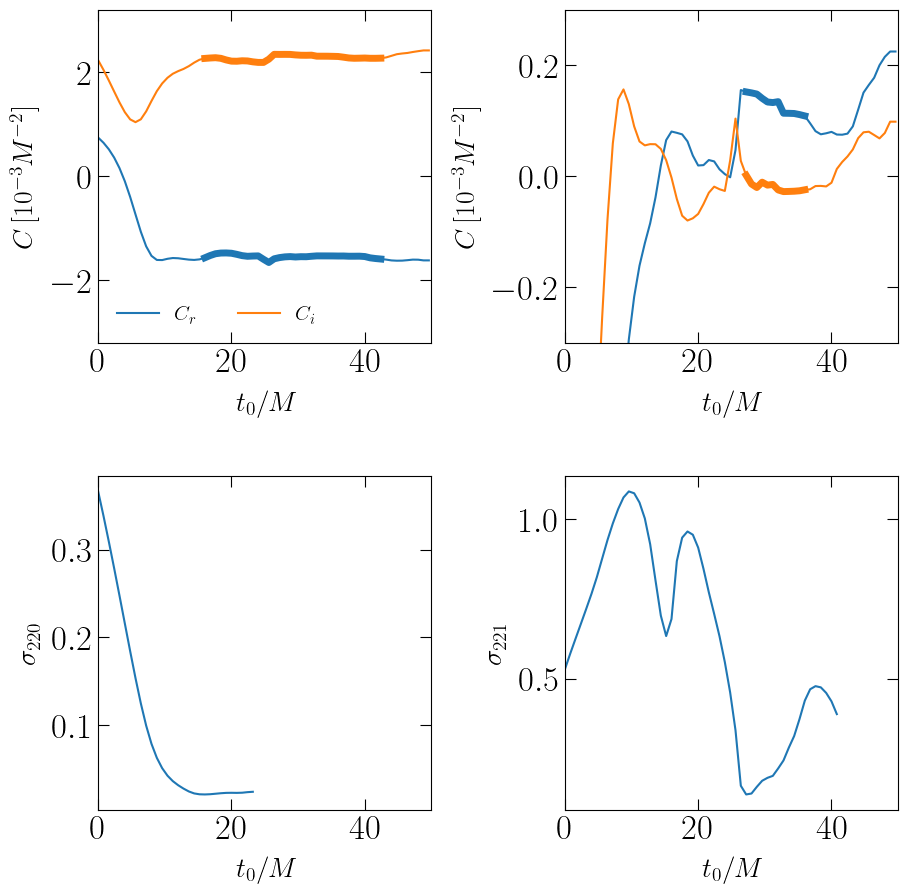

In [117]:
A_220=np.zeros(len(t0_arr))
phi_220=np.zeros(len(t0_arr))
A_221=np.zeros(len(t0_arr))
phi_221=np.zeros(len(t0_arr))

C_r_220=np.zeros(len(t0_arr))
C_i_220=np.zeros(len(t0_arr))
C_r_221=np.zeros(len(t0_arr))
C_i_221=np.zeros(len(t0_arr))

for i in range(len(t0_arr)):
    A_220[i]=params_fit[i][0]
    phi_220[i]=params_fit[i][1]
    A_221[i]=params_fit[i][2]
    phi_221[i]=params_fit[i][3]

    C_r_220[i]=A_220[i]*np.cos(phi_220[i])
    C_i_220[i]=-A_220[i]*np.sin(phi_220[i])
    C_r_221[i]=A_221[i]*np.cos(phi_221[i])
    C_i_221[i]=-A_221[i]*np.sin(phi_221[i])


dA=10.0

# 我们还是来画一个四宫格图
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

axes[0,0].plot(t0_arr,C_r_220*10**3)
axes[0,0].plot(t0_arr,C_i_220*10**3)
axes[0,0].set_xlim([0,50])
axes[0,0].set_xlabel(r"$t_0/M$",fontsize=20)
axes[0,0].set_ylabel(r"$C\,[10^{-3} M^{-2}]$",fontsize=20)
axes[0,0].set_ylim([-3.2,3.2])
axes[0,0].legend([r"$C_r$",r"$C_i$"],fontsize=15,frameon=False,ncol=2)

axes[0,1].plot(t0_arr,C_r_221*10**3)
axes[0,1].plot(t0_arr,C_i_221*10**3)
axes[0,1].set_xlim([0,50])
axes[0,1].set_xlabel(r"$t_0/M$",fontsize=20)
axes[0,1].set_ylabel(r"$C\,[10^{-3} M^{-2}]$",fontsize=20)


omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M

dt=-np.log(dA)/omega_GR_220.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=sta_cal_A(C_r_220[i:index_dt],C_i_220[i:index_dt])

axes[1,0].plot(t0_arr[0:n_sta],sta_list)
axes[1,0].set_xlim([0,50])
axes[1,0].set_xlabel(r"$t_0/M$",fontsize=20)
axes[1,0].set_ylabel(r"$\sigma_{220}$",fontsize=20)

index_min=np.argmin(sta_list)
index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

axes[0,0].plot(t0_arr[index_min:index_min_dt],C_r_220[index_min:index_min_dt]*10**3,color='#1f77b4',linewidth=5)
axes[0,0].plot(t0_arr[index_min:index_min_dt],C_i_220[index_min:index_min_dt]*10**3,color='#ff7f0e',linewidth=5)

omega_GR_221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=a_f)[0]/M_f*M

dt=-np.log(dA)/omega_GR_221.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=sta_cal_A(C_r_221[i:index_dt],C_i_221[i:index_dt])

axes[1,1].plot(t0_arr[0:n_sta],sta_list)
axes[1,1].set_xlim([0,50])
axes[1,1].set_xlabel(r"$t_0/M$",fontsize=20)
axes[1,1].set_ylabel(r"$\sigma_{221}$",fontsize=20)

index_min=np.argmin(sta_list)
index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

axes[0,1].plot(t0_arr[index_min:index_min_dt],C_r_221[index_min:index_min_dt]*10**3,color='#1f77b4',linewidth=5)
axes[0,1].plot(t0_arr[index_min:index_min_dt],C_i_221[index_min:index_min_dt]*10**3,color='#ff7f0e',linewidth=5)
axes[0,1].set_ylim([-0.3,0.3])
plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/A_ext_Nfree_1.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [118]:
# 然后再来一个N_free=5的

name_list=["0","1","5","10","20","30"]
i_name=5

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    pass

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

M=1
M_f=mt(t[index_100])
a_f=st(t[index_100])/M_f**2
q_f=qt(t[index_100])/M_f

print(M_f,a_f,q_f)

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_220r[k][j]*a_f**k*q_f**j
        den+=ckj_220r[k][j]*a_f**k*q_f**j

omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_220i[k][j]*a_f**k*q_f**j
        den+=ckj_220i[k][j]*a_f**k*q_f**j

omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_221r[k][j]*a_f**k*q_f**j
        den+=ckj_221r[k][j]*a_f**k*q_f**j

omega_KN_221_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_221i[k][j]*a_f**k*q_f**j
        den+=ckj_221i[k][j]*a_f**k*q_f**j

omega_KN_221_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

import My_Fitting

data=np.genfromtxt("Figure_data/strain_"+"30"+"_22_cutoff_low_0.005.dat")
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
index_peak=np.argmax(h_abs)


data=np.genfromtxt("Figure_data/Weyl4_mode_"+"30"+"_22.dat")
t=data[:,0]
psi4_r=data[:,1]
psi4_i=data[:,2]
index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
index_100=np.argmin(np.abs(t-t[index_peak]-100))+1


t_arr=np.zeros(index_100-index_peak)
psi4_r_arr=np.zeros(index_100-index_peak)
psi4_i_arr=np.zeros(index_100-index_peak)
t0_arr=np.zeros(index_50-index_peak)
N_guess=10
N_free=5
N_fix=2
omega_fix=[[omega_KN_220_r,omega_KN_220_i],[omega_KN_221_r,omega_KN_221_i]]
pert=10**(-3)
N_pert_guess=20
max_nfev=200000
for i in range(index_100-index_peak):
    t_arr[i]=t[index_peak+i]-t[index_peak]
    psi4_r_arr[i]=psi4_r[index_peak+i]
    psi4_i_arr[i]=psi4_i[index_peak+i]
    
for i in range(index_50-index_peak):
    t0_arr[i]=t[index_peak+i]-t[index_peak]

params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)

0.954369525297543 0.6459866157189657 0.30708129086449204
initial guess:


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


initial guess index:  7
min loss: 4.291124773942503e-11
fitting for N_free =  5


 79%|███████▉  | 50/63 [00:55<00:09,  1.35it/s]/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/jaxfit/common_scipy.py:330: RuntimeWarning: overflow encountered in divide
  ratio = actual_reduction / predicted_reduction
100%|██████████| 63/63 [01:03<00:00,  1.01s/it]


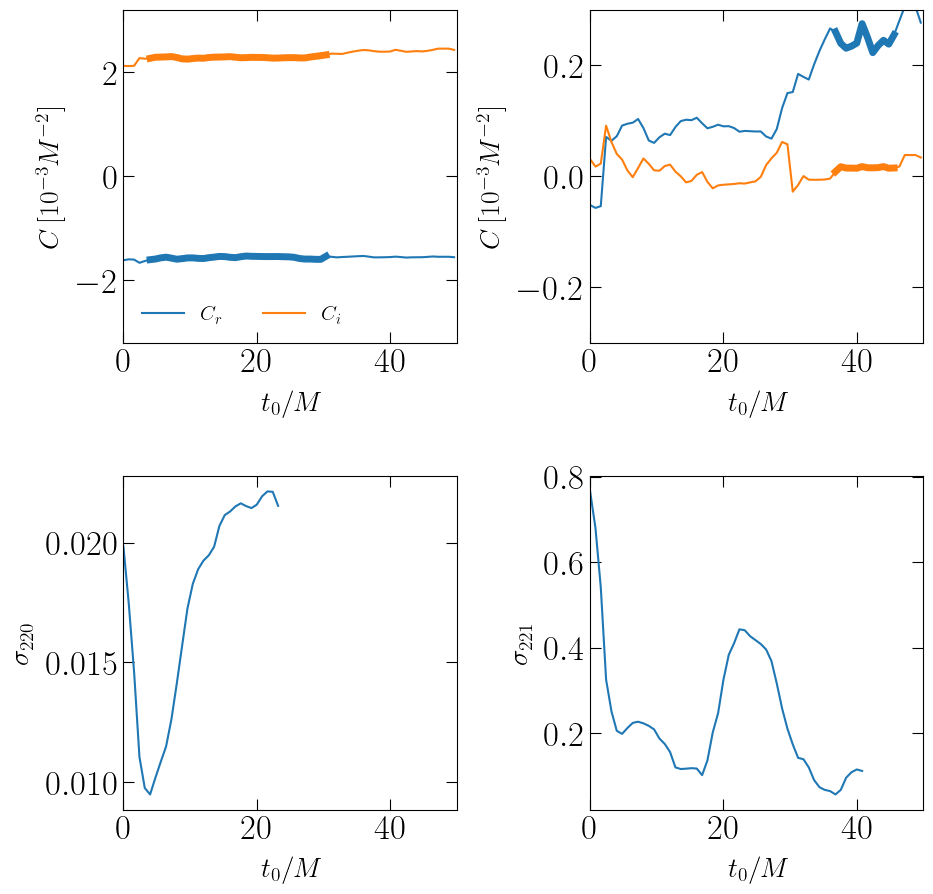

In [120]:
A_220=np.zeros(len(t0_arr))
phi_220=np.zeros(len(t0_arr))
A_221=np.zeros(len(t0_arr))
phi_221=np.zeros(len(t0_arr))

C_r_220=np.zeros(len(t0_arr))
C_i_220=np.zeros(len(t0_arr))
C_r_221=np.zeros(len(t0_arr))
C_i_221=np.zeros(len(t0_arr))

for i in range(len(t0_arr)):
    A_220[i]=params_fit[i][0]
    phi_220[i]=params_fit[i][1]
    A_221[i]=params_fit[i][2]
    phi_221[i]=params_fit[i][3]

    C_r_220[i]=A_220[i]*np.cos(phi_220[i])
    C_i_220[i]=-A_220[i]*np.sin(phi_220[i])
    C_r_221[i]=A_221[i]*np.cos(phi_221[i])
    C_i_221[i]=-A_221[i]*np.sin(phi_221[i])


dA=10.0

# 我们还是来画一个四宫格图
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

axes[0,0].plot(t0_arr,C_r_220*10**3)
axes[0,0].plot(t0_arr,C_i_220*10**3)
axes[0,0].set_xlim([0,50])
axes[0,0].set_xlabel(r"$t_0/M$",fontsize=20)
axes[0,0].set_ylabel(r"$C\,[10^{-3} M^{-2}]$",fontsize=20)
axes[0,0].set_ylim([-3.2,3.2])
axes[0,0].legend([r"$C_r$",r"$C_i$"],fontsize=15,frameon=False,ncol=2)

axes[0,1].plot(t0_arr,C_r_221*10**3)
axes[0,1].plot(t0_arr,C_i_221*10**3)
axes[0,1].set_xlim([0,50])
axes[0,1].set_xlabel(r"$t_0/M$",fontsize=20)
axes[0,1].set_ylabel(r"$C\,[10^{-3} M^{-2}]$",fontsize=20)


omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M

dt=-np.log(dA)/omega_GR_220.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=sta_cal_A(C_r_220[i:index_dt],C_i_220[i:index_dt])

axes[1,0].plot(t0_arr[0:n_sta],sta_list)
axes[1,0].set_xlim([0,50])
axes[1,0].set_xlabel(r"$t_0/M$",fontsize=20)
axes[1,0].set_ylabel(r"$\sigma_{220}$",fontsize=20)

index_min=np.argmin(sta_list)
index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

axes[0,0].plot(t0_arr[index_min:index_min_dt],C_r_220[index_min:index_min_dt]*10**3,color='#1f77b4',linewidth=5)
axes[0,0].plot(t0_arr[index_min:index_min_dt],C_i_220[index_min:index_min_dt]*10**3,color='#ff7f0e',linewidth=5)

omega_GR_221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=a_f)[0]/M_f*M

dt=-np.log(dA)/omega_GR_221.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=sta_cal_A(C_r_221[i:index_dt],C_i_221[i:index_dt])

axes[1,1].plot(t0_arr[0:n_sta],sta_list)
axes[1,1].set_xlim([0,50])
axes[1,1].set_xlabel(r"$t_0/M$",fontsize=20)
axes[1,1].set_ylabel(r"$\sigma_{221}$",fontsize=20)

index_min=np.argmin(sta_list)
index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

axes[0,1].plot(t0_arr[index_min:index_min_dt],C_r_221[index_min:index_min_dt]*10**3,color='#1f77b4',linewidth=5)
axes[0,1].plot(t0_arr[index_min:index_min_dt],C_i_221[index_min:index_min_dt]*10**3,color='#ff7f0e',linewidth=5)
axes[0,1].set_ylim([-0.3,0.3])
plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/A_ext_Nfree_5.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [121]:
# 我们然后再来拟合一下330看看，同样以30 为例

name_list=["0","1","5","10","20","30"]
i_name=5

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    pass

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

M=1
M_f=mt(t[index_100])
a_f=st(t[index_100])/M_f**2
q_f=qt(t[index_100])/M_f

print(M_f,a_f,q_f)

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_330r[k][j]*a_f**k*q_f**j
        den+=ckj_330r[k][j]*a_f**k*q_f**j

omega_KN_330_r=(qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=bkj_330i[k][j]*a_f**k*q_f**j
        den+=ckj_330i[k][j]*a_f**k*q_f**j

omega_KN_330_i=(qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=0)[0].imag*num/den)/M_f*M

import My_Fitting

data=np.genfromtxt("Figure_data/strain_"+"30"+"_22_cutoff_low_0.005.dat")
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
index_peak=np.argmax(h_abs)


data=np.genfromtxt("Figure_data/Weyl4_mode_"+"30"+"_33.dat")
t=data[:,0]
psi4_r=data[:,1]
psi4_i=data[:,2]
index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
index_100=np.argmin(np.abs(t-t[index_peak]-100))+1


t_arr=np.zeros(index_100-index_peak)
psi4_r_arr=np.zeros(index_100-index_peak)
psi4_i_arr=np.zeros(index_100-index_peak)
t0_arr=np.zeros(index_50-index_peak)
N_guess=10
N_free=4
N_fix=1
omega_fix=[[omega_KN_330_r,omega_KN_330_i]]
pert=10**(-3)
N_pert_guess=20
max_nfev=200000
for i in range(index_100-index_peak):
    t_arr[i]=t[index_peak+i]-t[index_peak]
    psi4_r_arr[i]=psi4_r[index_peak+i]
    psi4_i_arr[i]=psi4_i[index_peak+i]
    
for i in range(index_50-index_peak):
    t0_arr[i]=t[index_peak+i]-t[index_peak]

params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)

0.954369525297543 0.6459866157189657 0.30708129086449204
initial guess:


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


initial guess index:  8
min loss: 7.03508253374806e-11
fitting for N_free =  4


100%|██████████| 63/63 [00:53<00:00,  1.17it/s]


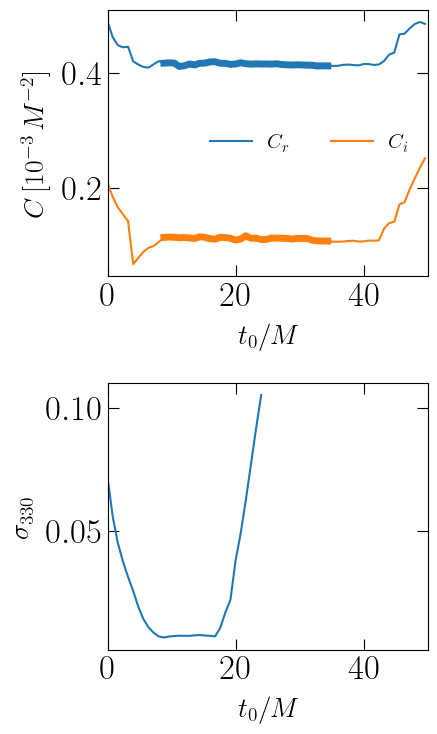

In [130]:
A_330=np.zeros(len(t0_arr))
phi_330=np.zeros(len(t0_arr))

C_r_330=np.zeros(len(t0_arr))
C_i_330=np.zeros(len(t0_arr))

for i in range(len(t0_arr)):
    A_330[i]=params_fit[i][0]
    phi_330[i]=params_fit[i][1]

    C_r_330[i]=A_330[i]*np.cos(phi_330[i])
    C_i_330[i]=-A_330[i]*np.sin(phi_330[i])

dA=10.0

fig,axes=plt.subplots(2,figsize=(4,8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
axes[0].set_xlabel(r"$t_0/M$",fontsize=20)
axes[1].set_xlabel(r"$t_0/M$",fontsize=20)
axes[0].set_ylabel(r"$C\,[10^{-3}\,M^{-2}]$",fontsize=20)
axes[1].set_ylabel(r"$\sigma_{330}$",fontsize=20)

axes[0].plot(t0_arr,C_r_330*10**3)
axes[0].plot(t0_arr,C_i_330*10**3)
axes[0].legend([r"$C_r$",r"$C_i$"],fontsize=15,frameon=False,ncol=2)
axes[0].set_xlim([0,50])

omega_GR_330=qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=a_f)[0]/M_f*M

dt=-np.log(dA)/omega_GR_330.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=sta_cal_A(C_r_330[i:index_dt],C_i_330[i:index_dt])

axes[1].plot(t0_arr[0:n_sta],sta_list)
axes[1].set_xlim([0,50])

index_min=np.argmin(sta_list)
index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

axes[0].plot(t0_arr[index_min:index_min_dt],C_r_330[index_min:index_min_dt]*10**3,color='#1f77b4',linewidth=5)
axes[0].plot(t0_arr[index_min:index_min_dt],C_i_330[index_min:index_min_dt]*10**3,color='#ff7f0e',linewidth=5)
plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/A_ext_330.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [131]:
# 然后是重新画一下老图，当然这里我们用了新的pert设置，另外我们可能也要重写稳定性判据
# 总之先遍历一下++的模拟，把结果都存下来

name_list=["0","1","5","10","20","30"]
for i_name in range(len(name_list)):
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)


    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1


    t_arr=np.zeros(index_100-index_peak)
    psi4_r_arr=np.zeros(index_100-index_peak)
    psi4_i_arr=np.zeros(index_100-index_peak)
    t0_arr=np.zeros(index_50-index_peak)
    N_guess=10
    N_free=5
    N_fix=0
    omega_fix=[]
    pert=10**(-3)
    N_pert_guess=20
    max_nfev=200000
    for i in range(index_100-index_peak):
        t_arr[i]=t[index_peak+i]-t[index_peak]
        psi4_r_arr[i]=psi4_r[index_peak+i]
        psi4_i_arr[i]=psi4_i[index_peak+i]
    
    for i in range(index_50-index_peak):
        t0_arr[i]=t[index_peak+i]-t[index_peak]

    params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)

    with open("Figure_data/"+name_list[i_name]+"_"+"220.pkl",'wb') as file:
        pickle.dump(params_fit,file)

initial guess:


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


initial guess index:  2
min loss: 7.189693514570618e-11
fitting for N_free =  5


 40%|███▉      | 25/63 [00:25<00:33,  1.15it/s]/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/jaxfit/common_scipy.py:330: RuntimeWarning: overflow encountered in divide
  ratio = actual_reduction / predicted_reduction
100%|██████████| 63/63 [00:52<00:00,  1.20it/s]


initial guess:


100%|██████████| 10/10 [00:05<00:00,  1.89it/s]


initial guess index:  8
min loss: 6.782893098292349e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:55<00:00,  1.14it/s]


initial guess:


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


initial guess index:  9
min loss: 6.710161322486707e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:56<00:00,  1.12it/s]


initial guess:


100%|██████████| 10/10 [00:03<00:00,  2.68it/s]


initial guess index:  7
min loss: 6.78325980840278e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:52<00:00,  1.20it/s]


initial guess:


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


initial guess index:  3
min loss: 5.786283910230795e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:54<00:00,  1.15it/s]


initial guess:


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


initial guess index:  1
min loss: 4.779098568077539e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:54<00:00,  1.16it/s]


In [133]:
i_name=5
with open("Figure_data/"+name_list[i_name]+"_"+"220.pkl",'rb') as file:
    params_fit=pickle.load(file)

In [20]:
def sta_cal_4(C_r_list,C_i_list,omega_r_list,omega_i_list):
    A=(C_r_list**2+C_i_list**2)**(1/2)
    A_ave=np.average(A)
    C_r_std=np.std(C_r_list)
    C_i_std=np.std(C_i_list)
    omega=(omega_r_list**2+omega_i_list**2)**(1/2)
    omega_ave=np.average(omega)
    omega_r_std=np.std(omega_r_list)
    omega_i_std=np.std(omega_i_list)
    return (C_r_std**2/A_ave**2+C_i_std**2/A_ave**2+omega_r_std**2/omega_ave**2+omega_i_std**2/omega_ave**2)**(1/2)

2.419592768609924e-05 -5.353008123276659e-05
-5.538535087845631e-05 -5.0373270957360106e-05
-0.0003871867342268853 0.00038854372309460317
0.001325265294538025 0.0018454331876013308
-3.600487763077975e-05 0.0075324195386731185
-0.0008073303323802294 0.01657710629695397


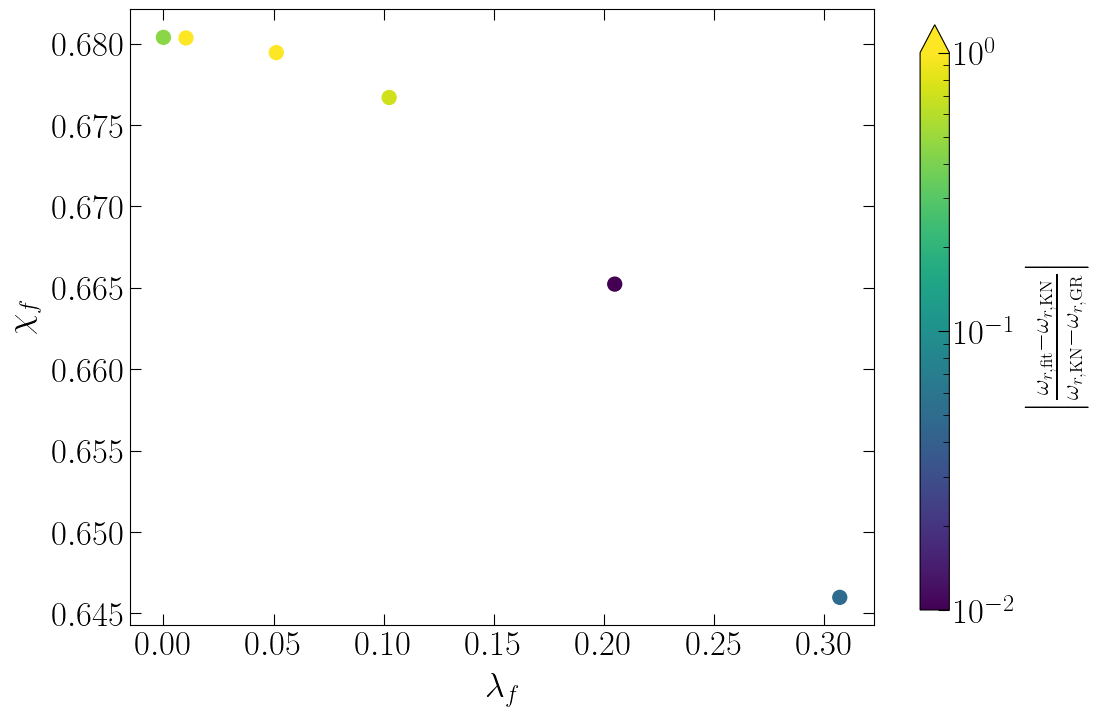

In [ ]:
name_list=["0","1","5","10","20","30"]
q_f_list=np.zeros(len(name_list))
a_f_list=np.zeros(len(name_list))
z=np.zeros(len(name_list))
sizes=np.zeros(len(name_list))

for i_name in range(len(name_list)):
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)

    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass
    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    st=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    qt=timeseries.scalar["qlm_charge[2]"]

    M=1
    M_f=mt(t[index_100])
    a_f=st(t[index_100])/M_f**2
    q_f=qt(t[index_100])/M_f
    q_f_list[i_name]=q_f
    a_f_list[i_name]=a_f
    sizes[i_name]=100

    omega_GR_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M).real

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220r[k][j]*a_f**k*q_f**j
            den+=ckj_220r[k][j]*a_f**k*q_f**j

    omega_KN_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220i[k][j]*a_f**k*q_f**j
            den+=ckj_220i[k][j]*a_f**k*q_f**j

    omega_KN_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M


    with open("Figure_data/"+name_list[i_name]+"_"+"220.pkl",'rb') as file:
        params_fit=pickle.load(file)

    # 首先还要检出哪个是22模。。。
    inside_tag=np.zeros(N_free)
    for i in range(len(t0_arr)):
        for j in range(N_free):
            omega_r=params_fit[i][4*j+2]
            omega_i=params_fit[i][4*j+3]
            if(((omega_r-omega_KN_r)**2+(omega_i-omega_KN_i)**2)**(1/2)<0.1):
                inside_tag[j]+=1

    index_220=np.argmax(inside_tag)

    A_220=np.zeros(len(t0_arr))
    phi_220=np.zeros(len(t0_arr))
    omega_r_220=np.zeros(len(t0_arr))
    omega_i_220=np.zeros(len(t0_arr))
    C_r_220=np.zeros(len(t0_arr))
    C_i_220=np.zeros(len(t0_arr))
    for i in range(len(t0_arr)):
        A_220[i]=params_fit[i][4*index_220+0]
        phi_220[i]=params_fit[i][4*index_220+1]
        omega_r_220[i]=params_fit[i][4*index_220+2]
        omega_i_220[i]=params_fit[i][4*index_220+3]
        C_r_220[i]=A_220[i]*np.cos(phi_220[i])
        C_i_220[i]=-A_220[i]*np.sin(phi_220[i])

    dA=10.0
    dt=-np.log(dA)/omega_GR_220.imag
    # 首先找到离 50 （t0_arr结尾）最近的dt
    index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
    n_sta=index_end+1
    sta_list=np.zeros(n_sta)

    for i in range(n_sta):
        index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
        sta_list[i]=sta_cal_4(C_r_220[i:index_dt],C_i_220[i:index_dt],omega_r_220[i:index_dt],omega_i_220[i:index_dt])

    index_min=np.argmin(sta_list)
    index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1
    
    omega_fit_r=np.average(omega_r_220[index_min:index_min_dt])
    z[i_name]=np.abs((omega_fit_r-omega_KN_r)/(omega_KN_r-omega_GR_r))
    print(omega_fit_r-omega_KN_r,omega_KN_r-omega_GR_r)

    # plt.plot(q_f,a_f,'.',markersize=20)

fig, ax =plt.subplots(1,1,figsize=(12,8), sharex=True, sharey=True)
sc1=[]
sc1.append(ax.scatter(q_f_list,a_f_list,c=z,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.01,vmax=1)))
cbar1 = plt.colorbar(sc1[0], ax=ax, extend='max', shrink=0.95)
cbar1.set_label(r"$\left|\frac{\omega_{r,{\rm fit}}-\omega_{r,{\rm KN}}}{\omega_{r,{\rm KN}}-\omega_{r,{\rm GR}}}\right|$",fontsize=25)
# sc1[0].set_clim(0,0.1)
ax.set_xlabel(r"$\lambda_f$",fontsize=25)
ax.set_ylabel(r"$\chi_f$",fontsize=25)
# plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/220_omega_rel_KN.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [50]:
data=np.genfromtxt("Figure_data/strain_"+"30"+"_22_cutoff_low_0.005.dat")
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
index_peak=np.argmax(h_abs)


data=np.genfromtxt("Figure_data/Weyl4_mode_"+"30"+"_22.dat")
t=data[:,0]
psi4_r=data[:,1]
psi4_i=data[:,2]
index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
index_100=np.argmin(np.abs(t-t[index_peak]-100))+1


t_arr=np.zeros(index_100-index_peak)
psi4_r_arr=np.zeros(index_100-index_peak)
psi4_i_arr=np.zeros(index_100-index_peak)
t0_arr=np.zeros(index_50-index_peak)
N_guess=10
N_free=5
N_fix=2
# omega_fix=[[omega_KN_220_r,omega_KN_220_i],[omega_KN_221_r,omega_KN_221_i]]
pert=10**(-3)
N_pert_guess=20
max_nfev=200000
for i in range(index_100-index_peak):
    t_arr[i]=t[index_peak+i]-t[index_peak]
    psi4_r_arr[i]=psi4_r[index_peak+i]
    psi4_i_arr[i]=psi4_i[index_peak+i]
    
for i in range(index_50-index_peak):
    t0_arr[i]=t[index_peak+i]-t[index_peak]

-4.1803655514649485e-05 -5.353008123276659e-05
-6.596743196685129e-05 -5.0373270957360106e-05
-0.00038987573073501203 0.00038854372309460317
0.0013045681274195253 0.0018454331876013308
-3.600487763077975e-05 0.0075324195386731185
-0.0008073303323802294 0.01657710629695397


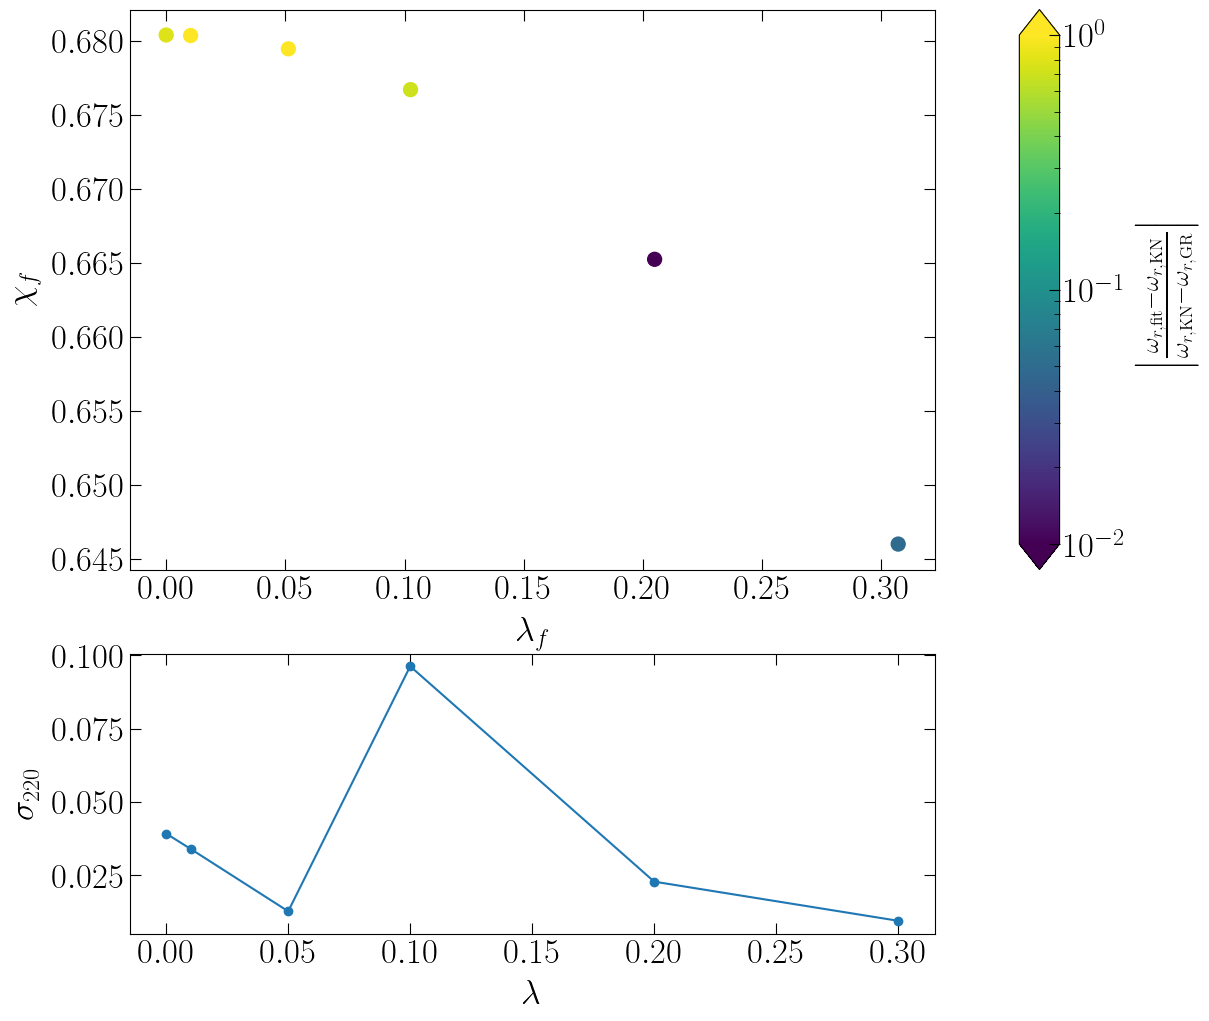

In [66]:
import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=(12,12))
gs=gridspec.GridSpec(2,2,width_ratios=[20,1],height_ratios=[2,1])
ax1=plt.subplot(gs[0,0])
ax2=plt.subplot(gs[1,0])
cax=plt.subplot(gs[0,1])
# plt.subplots_adjust(left=0.1, right=0.3, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
N_free=5
# gs.update(hspace=0)
# ax1.tick_params(labelbottom=False)

name_list=["0","1","5","10","20","30"]
q_f_list=np.zeros(len(name_list))
a_f_list=np.zeros(len(name_list))
z=np.zeros(len(name_list))
sizes=np.zeros(len(name_list))
sigma_min=np.zeros(len(name_list))

for i_name in range(len(name_list)):
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)

    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass
    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    st=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    qt=timeseries.scalar["qlm_charge[2]"]

    M=1
    M_f=mt(t[index_100])
    a_f=st(t[index_100])/M_f**2
    q_f=qt(t[index_100])/M_f
    q_f_list[i_name]=q_f
    a_f_list[i_name]=a_f
    sizes[i_name]=100

    omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M
    omega_GR_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M).real

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220r[k][j]*a_f**k*q_f**j
            den+=ckj_220r[k][j]*a_f**k*q_f**j

    omega_KN_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220i[k][j]*a_f**k*q_f**j
            den+=ckj_220i[k][j]*a_f**k*q_f**j

    omega_KN_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M


    with open("Figure_data/"+name_list[i_name]+"_"+"220.pkl",'rb') as file:
        params_fit=pickle.load(file)

    # 首先还要检出哪个是22模。。。
    inside_tag=np.zeros(N_free)
    for i in range(len(t0_arr)):
        for j in range(N_free):
            omega_r=params_fit[i][4*j+2]
            omega_i=params_fit[i][4*j+3]
            if(((omega_r-omega_KN_r)**2+(omega_i-omega_KN_i)**2)**(1/2)<0.1):
                inside_tag[j]+=1

    index_220=np.argmax(inside_tag)

    A_220=np.zeros(len(t0_arr))
    phi_220=np.zeros(len(t0_arr))
    omega_r_220=np.zeros(len(t0_arr))
    omega_i_220=np.zeros(len(t0_arr))
    C_r_220=np.zeros(len(t0_arr))
    C_i_220=np.zeros(len(t0_arr))
    for i in range(len(t0_arr)):
        A_220[i]=params_fit[i][4*index_220+0]
        phi_220[i]=params_fit[i][4*index_220+1]
        omega_r_220[i]=params_fit[i][4*index_220+2]
        omega_i_220[i]=params_fit[i][4*index_220+3]
        C_r_220[i]=A_220[i]*np.cos(phi_220[i])
        C_i_220[i]=-A_220[i]*np.sin(phi_220[i])

    dA=10.0
    dt=-np.log(dA)/omega_GR_220.imag
    # 首先找到离 50 （t0_arr结尾）最近的dt
    index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
    n_sta=index_end+1
    sta_list=np.zeros(n_sta)
    # print(t0_arr)
    for i in range(n_sta):
        index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
        sta_list[i]=sta_cal_4(C_r_220[i:index_dt],C_i_220[i:index_dt],omega_r_220[i:index_dt],omega_i_220[i:index_dt])

    index_min=np.argmin(sta_list)
    index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1
    sigma_min[i_name]=sta_list[index_min]
    # print(sta_list)
    
    omega_fit_r=np.average(omega_r_220[index_min:index_min_dt])
    z[i_name]=np.abs((omega_fit_r-omega_KN_r)/(omega_KN_r-omega_GR_r))
    print(omega_fit_r-omega_KN_r,omega_KN_r-omega_GR_r)

    # plt.plot(q_f,a_f,'.',markersize=20)

scatter=ax1.scatter(q_f_list,a_f_list,c=z,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.01,vmax=1))
colorbar=fig.colorbar(scatter,cax=cax,extend='both')
colorbar.set_label(r"$\left|\frac{\omega_{r,{\rm fit}}-\omega_{r,{\rm KN}}}{\omega_{r,{\rm KN}}-\omega_{r,{\rm GR}}}\right|$",fontsize=25)
ax1.set_xlabel(r"$\lambda_f$",fontsize=25)
ax2.set_xlabel(r"$\lambda$",fontsize=25)
ax2.set_ylabel(r"$\sigma_{220}$",fontsize=25)
ax1.set_ylabel(r"$\chi_f$",fontsize=25)
lamb_list=np.array([0,0.01,0.05,0.1,0.2,0.3])
ax2.plot(lamb_list,sigma_min,'.-',markersize=12)
# ax2.set_yscale("log")

-4.1803655514649485e-05 -5.353008123276659e-05
-6.596743196685129e-05 -5.0373270957360106e-05
-0.00038987573073501203 0.00038854372309460317
0.0013045681274195253 0.0018454331876013308
-3.600487763077975e-05 0.0075324195386731185
-0.0008073303323802294 0.01657710629695397
-1.5647740924315534e-05 8.226414186142395e-05
-0.00026293997897107457 7.391094870827508e-05
0.00020055427712172003 6.033283678054391e-05
0.000499978513043578 9.10667656937314e-05
0.0008045728693525933 0.00032418329632014076
0.0006952943611658463 0.0007966033228105074


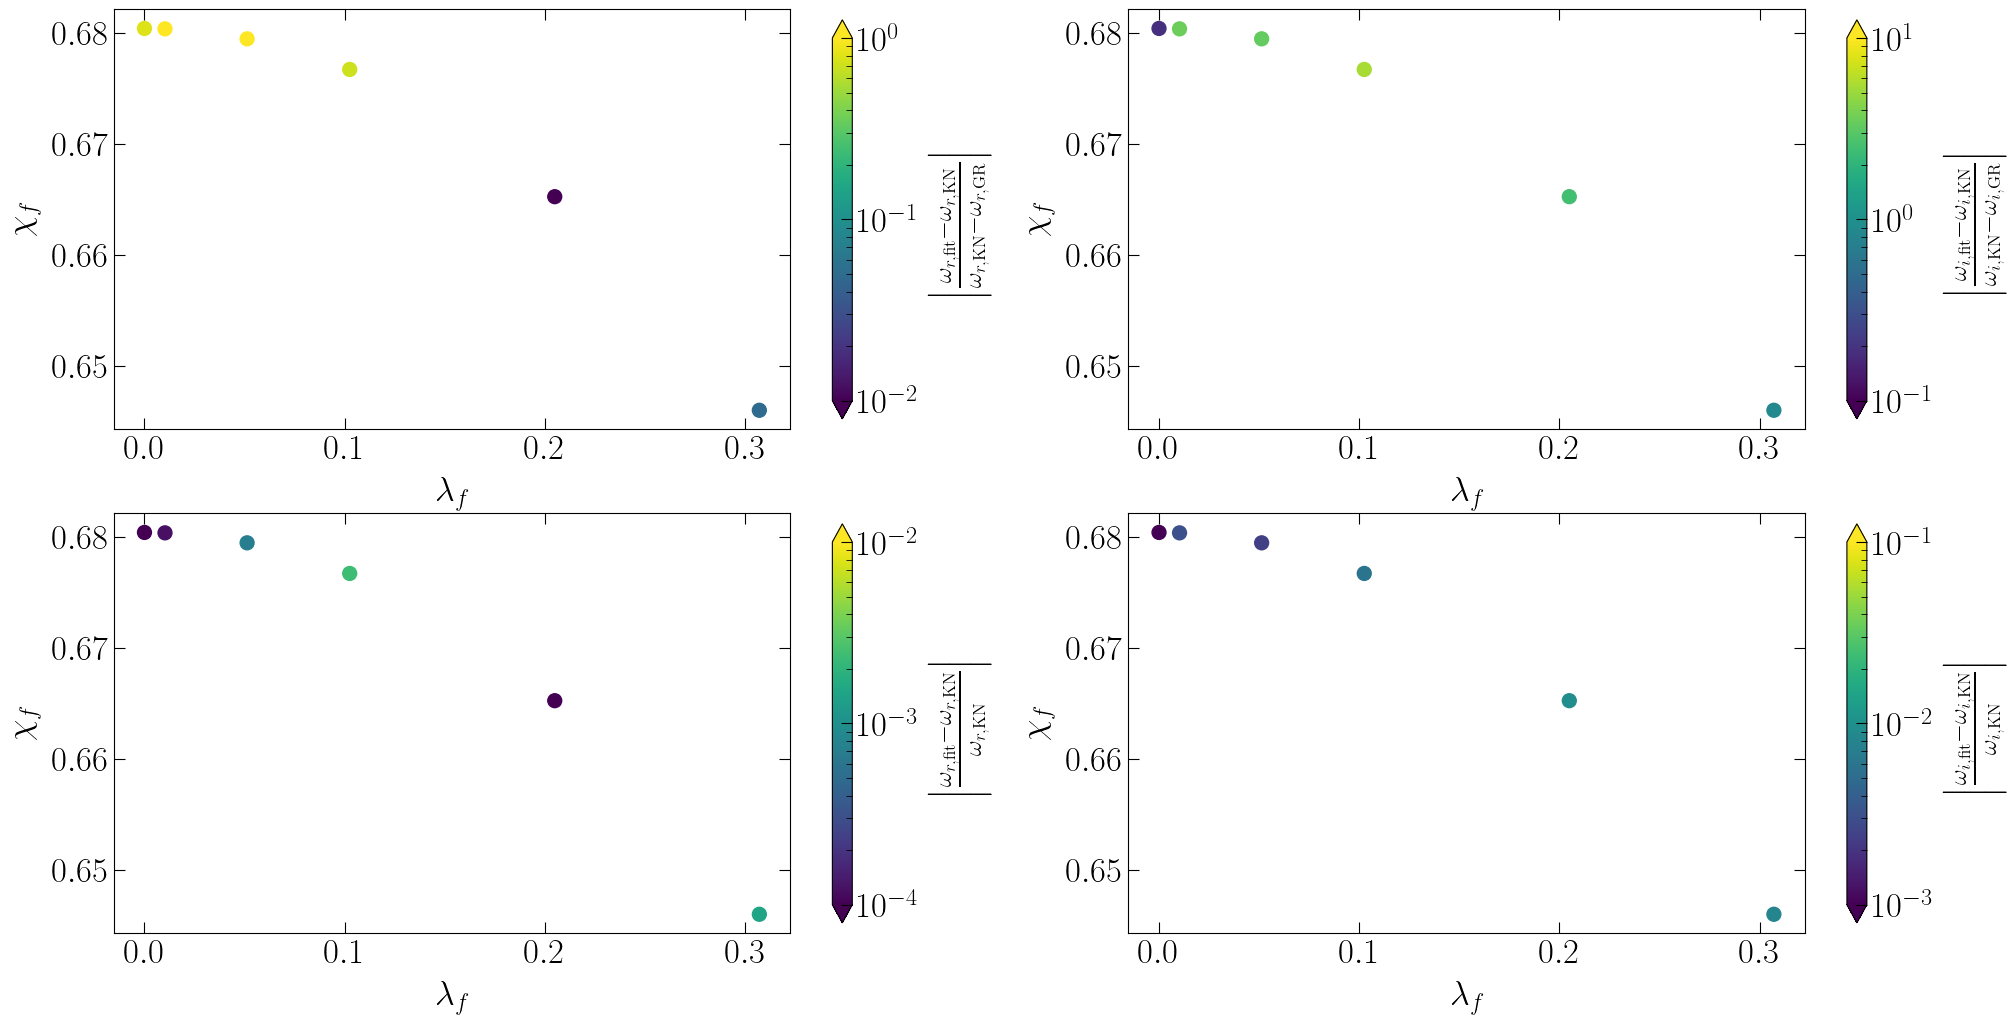

In [86]:
# 这感觉还是浪费空间，要不还是画2*2的图吧

fig=plt.figure(figsize=(24,12))
gs=gridspec.GridSpec(2,2)
ax1=plt.subplot(gs[0,0])
ax2=plt.subplot(gs[0,1])
ax3=plt.subplot(gs[1,0])
ax4=plt.subplot(gs[1,1])

ax1.set_xlabel(r"$\lambda_f$",fontsize=25)
ax1.set_ylabel(r"$\chi_f$",fontsize=25)
ax2.set_xlabel(r"$\lambda_f$",fontsize=25)
ax2.set_ylabel(r"$\chi_f$",fontsize=25)
ax3.set_xlabel(r"$\lambda_f$",fontsize=25)
ax3.set_ylabel(r"$\chi_f$",fontsize=25)
ax4.set_xlabel(r"$\lambda_f$",fontsize=25)
ax4.set_ylabel(r"$\chi_f$",fontsize=25)

name_list=["0","1","5","10","20","30"]
q_f_list=np.zeros(len(name_list))
a_f_list=np.zeros(len(name_list))
z=np.zeros(len(name_list))
sizes=np.zeros(len(name_list))
sigma_min=np.zeros(len(name_list))
z_GR=np.zeros(len(name_list))

for i_name in range(len(name_list)):
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)

    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass
    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    st=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    qt=timeseries.scalar["qlm_charge[2]"]

    M=1
    M_f=mt(t[index_100])
    a_f=st(t[index_100])/M_f**2
    q_f=qt(t[index_100])/M_f
    q_f_list[i_name]=q_f
    a_f_list[i_name]=a_f
    sizes[i_name]=100

    omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M
    omega_GR_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M).real

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220r[k][j]*a_f**k*q_f**j
            den+=ckj_220r[k][j]*a_f**k*q_f**j

    omega_KN_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220i[k][j]*a_f**k*q_f**j
            den+=ckj_220i[k][j]*a_f**k*q_f**j

    omega_KN_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M


    with open("Figure_data/"+name_list[i_name]+"_"+"220.pkl",'rb') as file:
        params_fit=pickle.load(file)

    # 首先还要检出哪个是22模。。。
    inside_tag=np.zeros(N_free)
    for i in range(len(t0_arr)):
        for j in range(N_free):
            omega_r=params_fit[i][4*j+2]
            omega_i=params_fit[i][4*j+3]
            if(((omega_r-omega_KN_r)**2+(omega_i-omega_KN_i)**2)**(1/2)<0.1):
                inside_tag[j]+=1

    index_220=np.argmax(inside_tag)

    A_220=np.zeros(len(t0_arr))
    phi_220=np.zeros(len(t0_arr))
    omega_r_220=np.zeros(len(t0_arr))
    omega_i_220=np.zeros(len(t0_arr))
    C_r_220=np.zeros(len(t0_arr))
    C_i_220=np.zeros(len(t0_arr))
    for i in range(len(t0_arr)):
        A_220[i]=params_fit[i][4*index_220+0]
        phi_220[i]=params_fit[i][4*index_220+1]
        omega_r_220[i]=params_fit[i][4*index_220+2]
        omega_i_220[i]=params_fit[i][4*index_220+3]
        C_r_220[i]=A_220[i]*np.cos(phi_220[i])
        C_i_220[i]=-A_220[i]*np.sin(phi_220[i])

    dA=10.0
    dt=-np.log(dA)/omega_GR_220.imag
    # 首先找到离 50 （t0_arr结尾）最近的dt
    index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
    n_sta=index_end+1
    sta_list=np.zeros(n_sta)
    # print(t0_arr)
    for i in range(n_sta):
        index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
        sta_list[i]=sta_cal_4(C_r_220[i:index_dt],C_i_220[i:index_dt],omega_r_220[i:index_dt],omega_i_220[i:index_dt])

    index_min=np.argmin(sta_list)
    index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1
    sigma_min[i_name]=sta_list[index_min]
    # print(sta_list)
    
    omega_fit_r=np.average(omega_r_220[index_min:index_min_dt])
    z[i_name]=np.abs((omega_fit_r-omega_KN_r)/(omega_KN_r-omega_GR_r))
    z_GR[i_name]=np.abs((omega_fit_r-omega_KN_r)/(omega_KN_r))
    print(omega_fit_r-omega_KN_r,omega_KN_r-omega_GR_r)

    # plt.plot(q_f,a_f,'.',markersize=20)

sc1=[]
sc1.append(ax1.scatter(q_f_list,a_f_list,c=z,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.01,vmax=1)))
cbar1 = plt.colorbar(sc1[0], ax=ax1, extend='both', shrink=0.95)
cbar1.set_label(r"$\left|\frac{\omega_{r,{\rm fit}}-\omega_{r,{\rm KN}}}{\omega_{r,{\rm KN}}-\omega_{r,{\rm GR}}}\right|$",fontsize=25)

sc3=[]
sc3.append(ax3.scatter(q_f_list,a_f_list,c=z_GR,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.0001,vmax=0.01)))
cbar3 = plt.colorbar(sc3[0], ax=ax3, extend='both', shrink=0.95)
cbar3.set_label(r"$\left|\frac{\omega_{r,{\rm fit}}-\omega_{r,{\rm KN}}}{\omega_{r,{\rm KN}}}\right|$",fontsize=25)

name_list=["0","1","5","10","20","30"]
q_f_list=np.zeros(len(name_list))
a_f_list=np.zeros(len(name_list))
z=np.zeros(len(name_list))
sizes=np.zeros(len(name_list))
sigma_min=np.zeros(len(name_list))
z_GR=np.zeros(len(name_list))

for i_name in range(len(name_list)):
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)

    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass
    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    st=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    qt=timeseries.scalar["qlm_charge[2]"]

    M=1
    M_f=mt(t[index_100])
    a_f=st(t[index_100])/M_f**2
    q_f=qt(t[index_100])/M_f
    q_f_list[i_name]=q_f
    a_f_list[i_name]=a_f
    sizes[i_name]=100

    omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M
    omega_GR_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M).imag

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220r[k][j]*a_f**k*q_f**j
            den+=ckj_220r[k][j]*a_f**k*q_f**j

    omega_KN_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220i[k][j]*a_f**k*q_f**j
            den+=ckj_220i[k][j]*a_f**k*q_f**j

    omega_KN_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M


    with open("Figure_data/"+name_list[i_name]+"_"+"220.pkl",'rb') as file:
        params_fit=pickle.load(file)

    # 首先还要检出哪个是22模。。。
    inside_tag=np.zeros(N_free)
    for i in range(len(t0_arr)):
        for j in range(N_free):
            omega_r=params_fit[i][4*j+2]
            omega_i=params_fit[i][4*j+3]
            if(((omega_r-omega_KN_r)**2+(omega_i-omega_KN_i)**2)**(1/2)<0.1):
                inside_tag[j]+=1

    index_220=np.argmax(inside_tag)

    A_220=np.zeros(len(t0_arr))
    phi_220=np.zeros(len(t0_arr))
    omega_r_220=np.zeros(len(t0_arr))
    omega_i_220=np.zeros(len(t0_arr))
    C_r_220=np.zeros(len(t0_arr))
    C_i_220=np.zeros(len(t0_arr))
    for i in range(len(t0_arr)):
        A_220[i]=params_fit[i][4*index_220+0]
        phi_220[i]=params_fit[i][4*index_220+1]
        omega_r_220[i]=params_fit[i][4*index_220+2]
        omega_i_220[i]=params_fit[i][4*index_220+3]
        C_r_220[i]=A_220[i]*np.cos(phi_220[i])
        C_i_220[i]=-A_220[i]*np.sin(phi_220[i])

    dA=10.0
    dt=-np.log(dA)/omega_GR_220.imag
    # 首先找到离 50 （t0_arr结尾）最近的dt
    index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
    n_sta=index_end+1
    sta_list=np.zeros(n_sta)
    # print(t0_arr)
    for i in range(n_sta):
        index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
        sta_list[i]=sta_cal_4(C_r_220[i:index_dt],C_i_220[i:index_dt],omega_r_220[i:index_dt],omega_i_220[i:index_dt])

    index_min=np.argmin(sta_list)
    index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1
    sigma_min[i_name]=sta_list[index_min]
    # print(sta_list)
    
    omega_fit_i=np.average(omega_i_220[index_min:index_min_dt])
    z[i_name]=np.abs((omega_fit_i-omega_KN_i)/(omega_KN_i-omega_GR_i))
    z_GR[i_name]=np.abs((omega_fit_i-omega_KN_i)/(omega_KN_i))
    print(omega_fit_i-omega_KN_i,omega_KN_i-omega_GR_i)

    # plt.plot(q_f,a_f,'.',markersize=20)

sc2=[]
sc2.append(ax2.scatter(q_f_list,a_f_list,c=z,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.1,vmax=10)))
cbar2 = plt.colorbar(sc2[0], ax=ax2, extend='both', shrink=0.95)
cbar2.set_label(r"$\left|\frac{\omega_{i,{\rm fit}}-\omega_{i,{\rm KN}}}{\omega_{i,{\rm KN}}-\omega_{i,{\rm GR}}}\right|$",fontsize=25)

sc4=[]
sc4.append(ax4.scatter(q_f_list,a_f_list,c=z_GR,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.001,vmax=0.1)))
cbar4 = plt.colorbar(sc4[0], ax=ax4, extend='both', shrink=0.95)
cbar4.set_label(r"$\left|\frac{\omega_{i,{\rm fit}}-\omega_{i,{\rm KN}}}{\omega_{i,{\rm KN}}}\right|$",fontsize=25)
plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/220_omega_KN.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
# 以上只能作为方法有效性的讨论，毕竟只展示了一个220模式，实际上我们不能很好的提取221模式，330模式也没有展示不能确定，其他模式则完全无法比较
# 然后我们应该看点图：具体的amp和phi随参数的变化：这里我们先画220,221,330这三个可以固定频率拟合的
# 我们应当遍历一下三个模拟
import My_Fitting

name_list=["0","1","5","10","20","30","s1","s5","s10","s20","s30","o1","o5","o10","o20","o30"]
# name_list=["o20"]
for i_name in range(len(name_list)):
    #用到了index_100这个东西
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)


    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                    pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass

    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    st=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    qt=timeseries.scalar["qlm_charge[2]"]

    M=1
    M_f=mt(t[index_100])
    a_f=st(t[index_100])/M_f**2
    q_f=qt(t[index_100])/M_f

    print(M_f,a_f,q_f)

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=My_Fitting.bkj_220r[k][j]*a_f**k*q_f**j
            den+=My_Fitting.ckj_220r[k][j]*a_f**k*q_f**j

    omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=My_Fitting.bkj_220i[k][j]*a_f**k*q_f**j
            den+=My_Fitting.ckj_220i[k][j]*a_f**k*q_f**j

    omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=My_Fitting.bkj_221r[k][j]*a_f**k*q_f**j
            den+=My_Fitting.ckj_221r[k][j]*a_f**k*q_f**j

    omega_KN_221_r=(qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0)[0].real*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=My_Fitting.bkj_221i[k][j]*a_f**k*q_f**j
            den+=My_Fitting.ckj_221i[k][j]*a_f**k*q_f**j

    omega_KN_221_i=(qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0)[0].imag*num/den)/M_f*M

    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]


    t_arr=np.zeros(index_100-index_peak)
    psi4_r_arr=np.zeros(index_100-index_peak)
    psi4_i_arr=np.zeros(index_100-index_peak)
    t0_arr=np.zeros(index_50-index_peak)
    N_guess=30
    N_free=5
    N_fix=2
    omega_fix=[[omega_KN_220_r,omega_KN_220_i],[omega_KN_221_r,omega_KN_221_i]]
    pert=10**(-3)
    N_pert_guess=30
    max_nfev=200000
    for i in range(index_100-index_peak):
        t_arr[i]=t[index_peak+i]-t[index_peak]
        psi4_r_arr[i]=psi4_r[index_peak+i]
        psi4_i_arr[i]=psi4_i[index_peak+i]
    
    for i in range(index_50-index_peak):
        t0_arr[i]=t[index_peak+i]-t[index_peak]

    params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)

    with open("Figure_data/"+name_list[i_name]+"_"+"A_phi_22.pkl",'wb') as file:
            pickle.dump(params_fit,file)

0.94943274252741 0.683275587461712 0.022742671777501104
initial guess:


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


initial guess index:  24
min loss: 3.5452940609042405e-11
fitting for N_free =  5


100%|██████████| 64/64 [01:43<00:00,  1.61s/it]


In [32]:
# 然后我们当然是要分析数据，使用我们之前的

# omega_GR_221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=a_f)[0]/M_f*M

# dt=-np.log(dA)/omega_GR_221.imag
# # 首先找到离 50 （t0_arr结尾）最近的dt
# index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
# n_sta=index_end+1
# sta_list=np.zeros(n_sta)

# for i in range(n_sta):
#     index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
#     sta_list[i]=sta_cal_A(C_r_221[i:index_dt],C_i_221[i:index_dt])

# axes[1,1].plot(t0_arr[0:n_sta],sta_list)
# axes[1,1].set_xlim([0,50])
# axes[1,1].set_xlabel(r"$t_0/M$",fontsize=20)
# axes[1,1].set_ylabel(r"$\sigma_{221}$",fontsize=20)

# index_min=np.argmin(sta_list)
# index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

dA=10.0

name_list=["0","1","5","10","20","30"]
lambda_list=[0,0.01,0.05,0.1,0.2,0.3]

C_r_220_list=np.zeros(len(name_list))
C_i_220_list=np.zeros(len(name_list))
sigma_220_list=np.zeros(len(name_list))
C_r_221_list=np.zeros(len(name_list))
C_i_221_list=np.zeros(len(name_list))
sigma_221_list=np.zeros(len(name_list))

Crh_r_220_list=np.zeros(len(name_list))
Crh_i_220_list=np.zeros(len(name_list))
Crh_r_221_list=np.zeros(len(name_list))
Crh_i_221_list=np.zeros(len(name_list))

for i_name in range(len(name_list)):
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)


    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

    t_arr=np.zeros(index_100-index_peak)
    psi4_r_arr=np.zeros(index_100-index_peak)
    psi4_i_arr=np.zeros(index_100-index_peak)
    t0_arr=np.zeros(index_50-index_peak)
    N_guess=10
    N_free=3
    N_fix=2
    omega_fix=[[omega_KN_220_r,omega_KN_220_i],[omega_KN_221_r,omega_KN_221_i]]
    pert=10**(-3)
    N_pert_guess=20
    max_nfev=200000

    for i in range(index_100-index_peak):
        t_arr[i]=t[index_peak+i]-t[index_peak]
        psi4_r_arr[i]=psi4_r[index_peak+i]
        psi4_i_arr[i]=psi4_i[index_peak+i]
    
    for i in range(index_50-index_peak):
        t0_arr[i]=t[index_peak+i]-t[index_peak]

    with open("Figure_data/"+name_list[i_name]+"_"+"A_phi_22.pkl",'rb') as file:
        params_fit=pickle.load(file)
    C_r_220=np.zeros(len(t0_arr))
    C_i_220=np.zeros(len(t0_arr))
    C_r_221=np.zeros(len(t0_arr))
    C_i_221=np.zeros(len(t0_arr))
    for i in range(len(t0_arr)):
        C_r_220[i]=params_fit[i][0]*np.cos(params_fit[i][1])
        C_i_220[i]=-params_fit[i][0]*np.sin(params_fit[i][1])
        C_r_221[i]=params_fit[i][2]*np.cos(params_fit[i][3])
        C_i_221[i]=-params_fit[i][2]*np.sin(params_fit[i][3])

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                    pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass

    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    st=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    qt=timeseries.scalar["qlm_charge[2]"]

    M=1
    M_f=mt(t[index_100])
    a_f=st(t[index_100])/M_f**2
    q_f=qt(t[index_100])/M_f

    omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M

    dt=-np.log(dA)/omega_GR_220.imag
    # 首先找到离 50 （t0_arr结尾）最近的dt
    index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
    n_sta=index_end+1
    sta_list=np.zeros(n_sta)
    for i in range(n_sta):
        index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
        sta_list[i]=sta_cal_A(C_r_220[i:index_dt],C_i_220[i:index_dt])

    index_min=np.argmin(sta_list)
    index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

    C_r_220_list[i_name]=np.average(C_r_220[index_min:index_min_dt])
    C_i_220_list[i_name]=np.average(C_i_220[index_min:index_min_dt])
    sigma_220_list[i_name]=sta_list[index_min]

    omega_GR_221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=a_f)[0]/M_f*M

    dt=-np.log(dA)/omega_GR_221.imag
    # 首先找到离 50 （t0_arr结尾）最近的dt
    index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
    n_sta=index_end+1
    sta_list=np.zeros(n_sta)
    for i in range(n_sta):
        index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
        sta_list[i]=sta_cal_A(C_r_221[i:index_dt],C_i_221[i:index_dt])

    index_min=np.argmin(sta_list)

    # 对30这个我们特别处理一下
    if(i_name==5):
        index_min=np.argmin(sta_list[0:40])


    index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1
    print(name_list[i_name],t0_arr[index_min])

    C_r_221_list[i_name]=np.average(C_r_221[index_min:index_min_dt])
    C_i_221_list[i_name]=np.average(C_i_221[index_min:index_min_dt])
    sigma_221_list[i_name]=sta_list[index_min]

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220r[k][j]*a_f**k*q_f**j
            den+=ckj_220r[k][j]*a_f**k*q_f**j

    omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220i[k][j]*a_f**k*q_f**j
            den+=ckj_220i[k][j]*a_f**k*q_f**j

    omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_221r[k][j]*a_f**k*q_f**j
            den+=ckj_221r[k][j]*a_f**k*q_f**j

    omega_KN_221_r=(qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0)[0].real*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_221i[k][j]*a_f**k*q_f**j
            den+=ckj_221i[k][j]*a_f**k*q_f**j

    omega_KN_221_i=(qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0)[0].imag*num/den)/M_f*M

    # 原理上我们上面算了M omega所以为了补量纲下面是*M
    Crh_r_220_list[i_name]=(-(C_r_220_list[i_name]+1.0j*C_i_220_list[i_name])/(omega_KN_220_r+1.0j*omega_KN_220_i)**2).real*110.69*M
    Crh_i_220_list[i_name]=(-(C_r_220_list[i_name]+1.0j*C_i_220_list[i_name])/(omega_KN_220_r+1.0j*omega_KN_220_i)**2).imag*110.69*M
    Crh_r_221_list[i_name]=(-(C_r_221_list[i_name]+1.0j*C_i_221_list[i_name])/(omega_KN_221_r+1.0j*omega_KN_221_i)**2).real*110.69*M
    Crh_i_221_list[i_name]=(-(C_r_221_list[i_name]+1.0j*C_i_221_list[i_name])/(omega_KN_221_r+1.0j*omega_KN_221_i)**2).imag*110.69*M

0 17.59999999999991
1 11.200000000000045
5 9.599999999999909
10 12.799999999999955
20 13.599999999999909
30 4.0


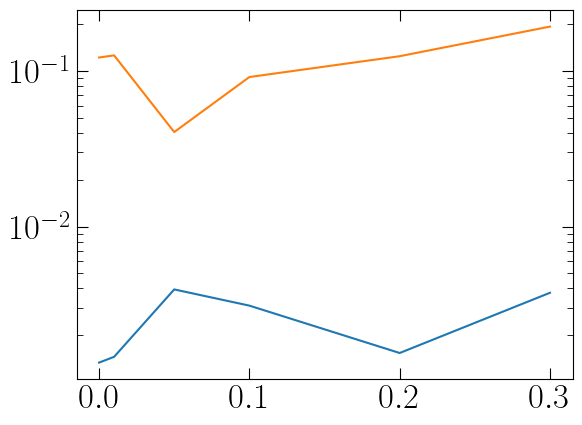

In [34]:
plt.plot(lambda_list,sigma_220_list)
plt.plot(lambda_list,sigma_221_list)
plt.yscale("log")

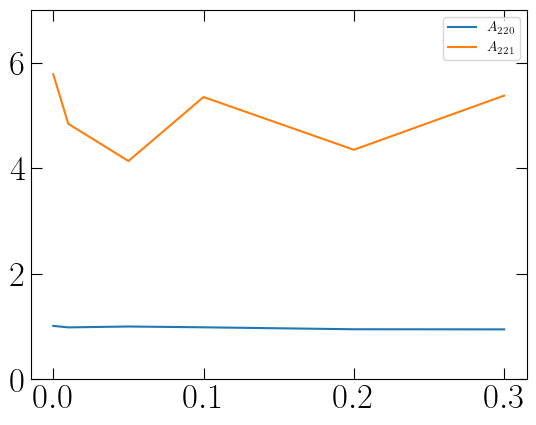

In [39]:
# 但注意一下，我们这里提取出来的是psi4的整幅，我们还得用omega重新标定一下
# C_h=-C_psi4/omega^2
# 然后呢，我们还希望看的是rh/M所以呢我们还要给它乘上个110.69
# 跟上面一起跑吧
# plt.plot(lambda_list,Crh_r_220_list)
# plt.plot(lambda_list,Crh_i_220_list)
plt.plot(lambda_list,(Crh_r_220_list**2+Crh_i_220_list**2)**(1/2))

plt.plot(lambda_list,(Crh_r_221_list**2+Crh_i_221_list**2)**(1/2))
# 221 30 这个可能有点问题，估计是找到后面那个极值点了，我们得怎么处理一下。。。
# 这下差不多了
plt.ylim([0,7])
plt.legend([r"$A_{220}$",r"$A_{221}$"])

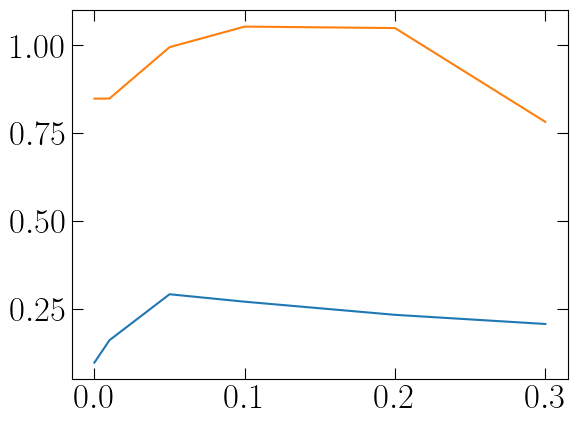

In [55]:
# 看起来倒是有个下降的趋势，我不是很好评价，我们来看下phi先，220的phi实际上是个基准，并没有太大的意义
# 而221的恐怕误差有点大，笑
# 我们给所有的相位减pi/2似乎还是会影响我们相对相位的定义的。。。对于m!=2的模式来说

phi_220_list=np.arctan2(-Crh_i_220_list,Crh_r_220_list)
phi_220_list[3]-=np.pi/2
phi_220_list[4]-=np.pi/2

plt.plot(lambda_list,phi_220_list/np.pi)

# 这里还加了2pi以调节，感觉比较连续
phi_221_list=np.arctan2(-Crh_i_221_list,Crh_r_221_list)
phi_221_list[3]-=np.pi/2-np.pi*2
phi_221_list[4]-=np.pi/2-np.pi*2

plt.plot(lambda_list,phi_221_list/np.pi)

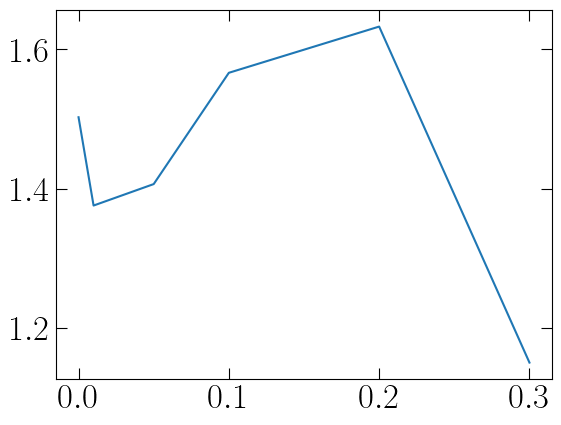

In [57]:
# 来画一下相对相位：2phi_lmn-m phi_220
plt.plot(lambda_list,(2*phi_221_list-2*phi_220_list)/np.pi)

In [58]:
# 这着实有点拉
# 不管怎么说，我们先画220模整幅在三个分支上的表现？然后把sigma画成error bar?
dA=10.0
lambda_list=[0,0.01,0.05,0.1,0.2,0.3]
name_list=[["0","1","5","10","20","30"],["0","s1","s5","s10","s20","s30"],["0","o1","o5","o10","o20","o30"]]

C_r_220_list=np.zeros([3,len(lambda_list)])
C_i_220_list=np.zeros([3,len(lambda_list)])
sigma_220_list=np.zeros([3,len(lambda_list)])
C_r_221_list=np.zeros([3,len(lambda_list)])
C_i_221_list=np.zeros([3,len(lambda_list)])
sigma_221_list=np.zeros([3,len(lambda_list)])

Crh_r_220_list=np.zeros([3,len(lambda_list)])
Crh_i_220_list=np.zeros([3,len(lambda_list)])
Crh_r_221_list=np.zeros([3,len(lambda_list)])
Crh_i_221_list=np.zeros([3,len(lambda_list)])
sigma_rh_220_list=np.zeros([3,len(lambda_list)])
sigma_rh_221_list=np.zeros([3,len(lambda_list)])

for i_name in range(len(lambda_list)):
    for i_family in range(3):
        data=np.genfromtxt("Figure_data/strain_"+name_list[i_family][i_name]+"_22_cutoff_low_0.005.dat")
        h_p=data[:,1]
        h_c=data[:,2]
        h_abs=(h_p**2+h_c**2)**(1/2)
        index_peak=np.argmax(h_abs)


        data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_family][i_name]+"_22.dat")
        t=data[:,0]
        psi4_r=data[:,1]
        psi4_i=data[:,2]
        index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
        index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

        t_arr=np.zeros(index_100-index_peak)
        psi4_r_arr=np.zeros(index_100-index_peak)
        psi4_i_arr=np.zeros(index_100-index_peak)
        t0_arr=np.zeros(index_50-index_peak)
        N_free=3
        N_fix=2

        for i in range(index_100-index_peak):
            t_arr[i]=t[index_peak+i]-t[index_peak]
            psi4_r_arr[i]=psi4_r[index_peak+i]
            psi4_i_arr[i]=psi4_i[index_peak+i]
        
        for i in range(index_50-index_peak):
            t0_arr[i]=t[index_peak+i]-t[index_peak]

        with open("Figure_data/"+name_list[i_family][i_name]+"_"+"A_phi_22.pkl",'rb') as file:
            params_fit=pickle.load(file)
        C_r_220=np.zeros(len(t0_arr))
        C_i_220=np.zeros(len(t0_arr))
        C_r_221=np.zeros(len(t0_arr))
        C_i_221=np.zeros(len(t0_arr))
        for i in range(len(t0_arr)):
            C_r_220[i]=params_fit[i][0]*np.cos(params_fit[i][1])
            C_i_220[i]=-params_fit[i][0]*np.sin(params_fit[i][1])
            C_r_221[i]=params_fit[i][2]*np.cos(params_fit[i][3])
            C_i_221[i]=-params_fit[i][2]*np.sin(params_fit[i][3])

        with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_family][i_name],\
                        pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_family][i_name]+".pickle") as sim:
            pass

        timeseries=sim.ts
        m1=timeseries.scalar["qlm_mass[0]"]
        m2=timeseries.scalar["qlm_mass[1]"]
        mt=timeseries.scalar["qlm_mass[2]"]
        s1=timeseries.scalar["qlm_spin[0]"]
        s2=timeseries.scalar["qlm_spin[1]"]
        st=timeseries.scalar["qlm_spin[2]"]
        q1=timeseries.scalar["qlm_charge[0]"]
        q2=timeseries.scalar["qlm_charge[1]"]
        qt=timeseries.scalar["qlm_charge[2]"]

        M=1
        M_f=mt(t[index_100])
        a_f=st(t[index_100])/M_f**2
        q_f=qt(t[index_100])/M_f

        omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M

        dt=-np.log(dA)/omega_GR_220.imag
        # 首先找到离 50 （t0_arr结尾）最近的dt
        index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
        n_sta=index_end+1
        sta_list=np.zeros(n_sta)
        for i in range(n_sta):
            index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
            sta_list[i]=My_Fitting.sta_cal_A(C_r_220[i:index_dt],C_i_220[i:index_dt])

        index_min=np.argmin(sta_list)
        index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

        C_r_220_list[i_family][i_name]=np.average(C_r_220[index_min:index_min_dt])
        C_i_220_list[i_family][i_name]=np.average(C_i_220[index_min:index_min_dt])
        sigma_220_list[i_family][i_name]=sta_list[index_min]

        omega_GR_221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=a_f)[0]/M_f*M

        dt=-np.log(dA)/omega_GR_221.imag
        # 首先找到离 50 （t0_arr结尾）最近的dt
        index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
        n_sta=index_end+1
        sta_list=np.zeros(n_sta)
        for i in range(n_sta):
            index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
            sta_list[i]=My_Fitting.sta_cal_A(C_r_221[i:index_dt],C_i_221[i:index_dt])

        index_min=np.argmin(sta_list)

        # 有一些需要特别处理
        if((i_name==0) or (i_family==1 and (i_name==1 or i_name==2)) or (i_family==2 and (i_name==2 or i_name==4))):
            index_min=np.argmin(sta_list[0:40])


        index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1
        print(name_list[i_family][i_name],t0_arr[index_min])

        C_r_221_list[i_family][i_name]=np.average(C_r_221[index_min:index_min_dt])
        C_i_221_list[i_family][i_name]=np.average(C_i_221[index_min:index_min_dt])
        sigma_221_list[i_family][i_name]=sta_list[index_min]

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=My_Fitting.bkj_220r[k][j]*a_f**k*q_f**j
                den+=My_Fitting.ckj_220r[k][j]*a_f**k*q_f**j

        omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=My_Fitting.bkj_220i[k][j]*a_f**k*q_f**j
                den+=My_Fitting.ckj_220i[k][j]*a_f**k*q_f**j

        omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=My_Fitting.bkj_221r[k][j]*a_f**k*q_f**j
                den+=My_Fitting.ckj_221r[k][j]*a_f**k*q_f**j

        omega_KN_221_r=(qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0)[0].real*num/den)/M_f*M

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=My_Fitting.bkj_221i[k][j]*a_f**k*q_f**j
                den+=My_Fitting.ckj_221i[k][j]*a_f**k*q_f**j

        omega_KN_221_i=(qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0)[0].imag*num/den)/M_f*M

        # 原理上我们上面算了M omega所以为了补量纲下面是*M
        Crh_r_220_list[i_family][i_name]=(-(C_r_220_list[i_family][i_name]+1.0j*C_i_220_list[i_family][i_name])/(omega_KN_220_r+1.0j*omega_KN_220_i)**2).real*110.69*M
        Crh_i_220_list[i_family][i_name]=(-(C_r_220_list[i_family][i_name]+1.0j*C_i_220_list[i_family][i_name])/(omega_KN_220_r+1.0j*omega_KN_220_i)**2).imag*110.69*M
        Crh_r_221_list[i_family][i_name]=(-(C_r_221_list[i_family][i_name]+1.0j*C_i_221_list[i_family][i_name])/(omega_KN_221_r+1.0j*omega_KN_221_i)**2).real*110.69*M
        Crh_i_221_list[i_family][i_name]=(-(C_r_221_list[i_family][i_name]+1.0j*C_i_221_list[i_family][i_name])/(omega_KN_221_r+1.0j*omega_KN_221_i)**2).imag*110.69*M
        sigma_rh_220_list[i_family][i_name]=sigma_220_list[i_family][i_name]/np.abs(omega_KN_220_r+1.0j*omega_KN_220_i)**2
        sigma_rh_221_list[i_family][i_name]=sigma_221_list[i_family][i_name]/np.abs(omega_KN_221_r+1.0j*omega_KN_221_i)**2

0 17.59999999999991
0 17.59999999999991
0 17.59999999999991
1 12.0
s1 17.59999999999991
o1 19.200000000000045
5 8.0
s5 18.399999999999864
o5 16.800000000000182
10 16.799999999999955
s10 0.0
o10 20.799999999999955
20 16.799999999999727
s20 14.400000000000091
o20 14.399999999999864
30 4.0
s30 18.40000000000009
o30 17.600000000000136


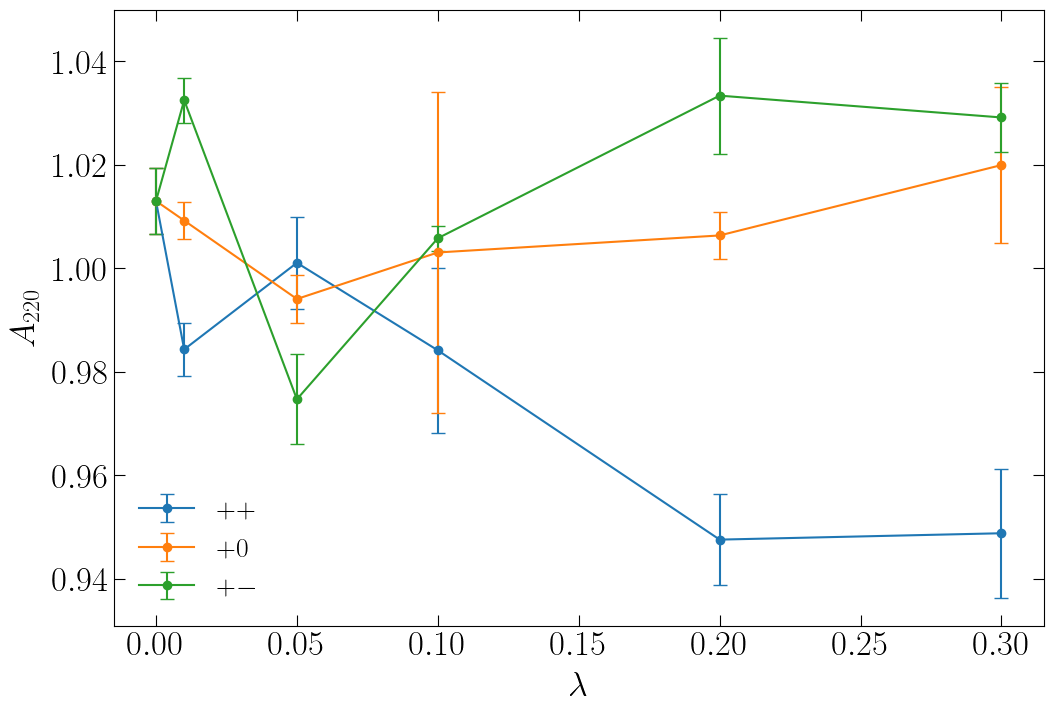

In [63]:
# 我们把errorbar也画上，由sigma_rh给出

plt.figure(figsize=(12,8))

for i_family in range(3):
    plt.errorbar(lambda_list,(Crh_r_220_list[i_family]**2+Crh_i_220_list[i_family]**2)**(1/2),sigma_rh_220_list[i_family],capsize=5,fmt='-o')

plt.xlabel(r"$\lambda$",fontsize=25)
plt.ylabel(r"$A_{220}$",fontsize=25)
plt.legend([r"$++$",r"$+0$",r"$+-$"],fontsize=20,frameon=False)
plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/220_A.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

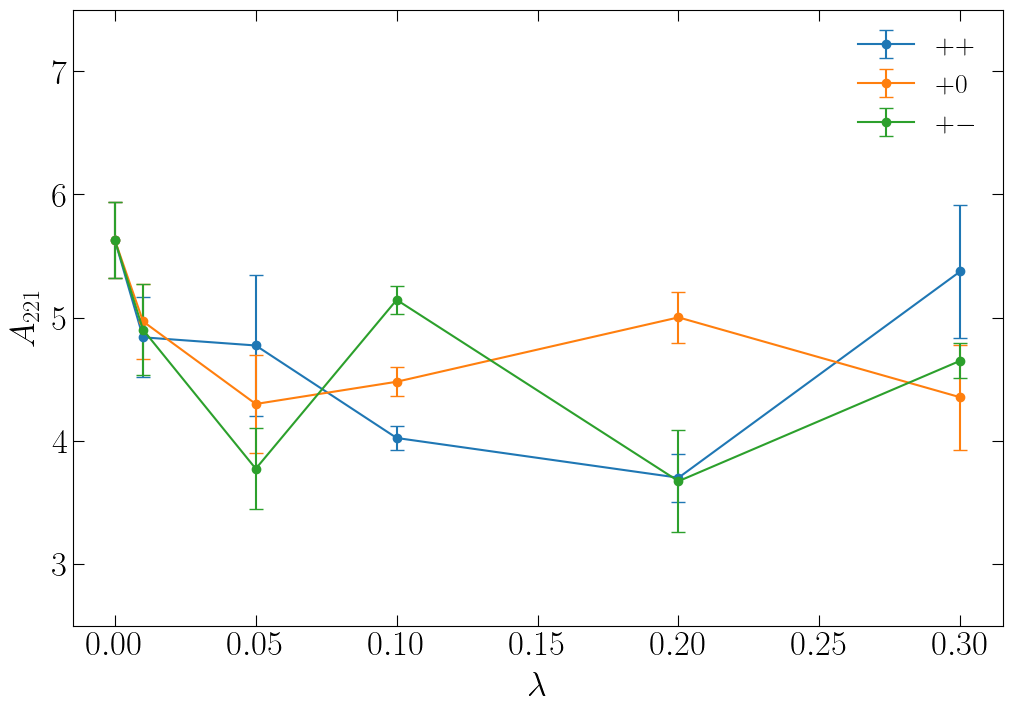

In [64]:
# 然后顺带画个221出来
plt.figure(figsize=(12,8))

for i_family in range(3):
    plt.errorbar(lambda_list,(Crh_r_221_list[i_family]**2+Crh_i_221_list[i_family]**2)**(1/2),sigma_rh_221_list[i_family],capsize=5,fmt='-o')

plt.xlabel(r"$\lambda$",fontsize=25)
plt.ylabel(r"$A_{221}$",fontsize=25)
plt.legend([r"$++$",r"$+0$",r"$+-$"],fontsize=20,frameon=False)
plt.ylim([2.5,7.5])
plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/221_A.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [118]:
from jaxqualin.data import (download_hyperfit_data, 
                            download_interpolate_data,
                            make_hyper_fit_functions,
                            make_interpolators)

download_hyperfit_data()
download_interpolate_data()

hyperfit_functions = make_hyper_fit_functions()
hyper_interpolators = make_interpolators()

mode_name = '2.2.1'

# eta, chi_p, chi_m = 0.2, 0.1, 0.4
with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+"0",\
                    pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+"0"+".pickle") as sim:
    pass

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

M1=m1(1000)
M2=m2(1000)
eta=M1*M2/(M1+M2)**2
chi_p=0
chi_m=0

A_fit = hyperfit_functions[mode_name]['A'](eta, chi_p, chi_m)
A_interp = hyper_interpolators[mode_name]['A'](eta, chi_p, chi_m)
phi_fit = hyperfit_functions[mode_name]['phi'](eta, chi_p, chi_m)
phi_interp = hyper_interpolators[mode_name]['phi'](eta, chi_p, chi_m)

print(f'A_fit: {A_fit:.5f}, A_interp: {A_interp:.5f}')
print(f'phi_fit: {phi_fit:.5f}, phi_interp: {phi_interp:.5f}')

https://mhycheung.github.io/jaxqualin/data/hyperfit_functions_latest.json is not more recent than /home/yuntian/vscode_codes/QNM_compare/Fitting_py/.jaxqualin_cache/data/hyperfit_functions_latest.json, file will not be downloaded.
https://mhycheung.github.io/jaxqualin/data/interpolate_data_latest.json is not more recent than /home/yuntian/vscode_codes/QNM_compare/Fitting_py/.jaxqualin_cache/data/interpolate_data_latest.json, file will not be downloaded.
A_fit: 4.13201, A_interp: 4.26695
phi_fit: 4.37866, phi_interp: 4.38055


In [103]:
eta

0.24710029368961836

0 17.59999999999991
0 17.59999999999991
0 17.59999999999991
1 11.200000000000045
s1 17.59999999999991
o1 18.399999999999864
5 9.599999999999909
s5 10.399999999999864
o5 12.800000000000182
10 12.799999999999955
s10 29.600000000000136
o10 25.59999999999991
20 13.599999999999909
s20 17.59999999999991
o20 1.599999999999909
30 4.0
s30 18.40000000000009
o30 16.799999999999955


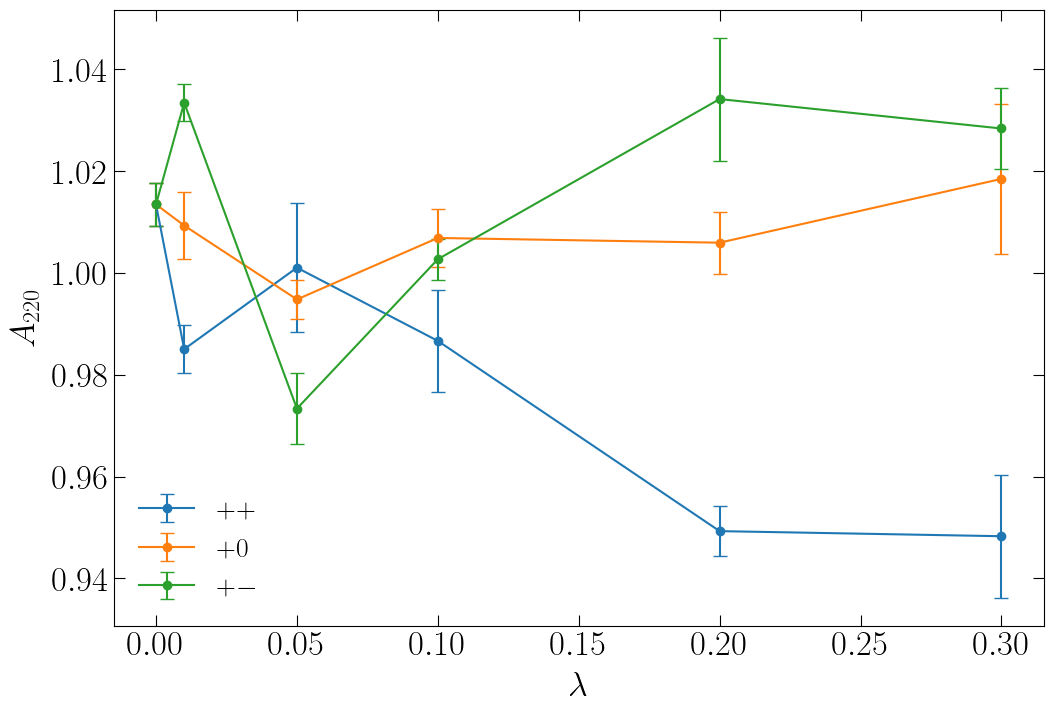

In [92]:
# 这个似乎在说，我们的值偏大，这会是什么原因呢？
# 也许我们考虑用medium来代替ave看看？

dA=10.0
lambda_list=[0,0.01,0.05,0.1,0.2,0.3]
name_list=[["0","1","5","10","20","30"],["0","s1","s5","s10","s20","s30"],["0","o1","o5","o10","o20","o30"]]

C_r_220_list=np.zeros([3,len(lambda_list)])
C_i_220_list=np.zeros([3,len(lambda_list)])
sigma_220_list=np.zeros([3,len(lambda_list)])
C_r_221_list=np.zeros([3,len(lambda_list)])
C_i_221_list=np.zeros([3,len(lambda_list)])
sigma_221_list=np.zeros([3,len(lambda_list)])

Crh_r_220_list=np.zeros([3,len(lambda_list)])
Crh_i_220_list=np.zeros([3,len(lambda_list)])
Crh_r_221_list=np.zeros([3,len(lambda_list)])
Crh_i_221_list=np.zeros([3,len(lambda_list)])
sigma_rh_220_list=np.zeros([3,len(lambda_list)])
sigma_rh_221_list=np.zeros([3,len(lambda_list)])

for i_name in range(len(lambda_list)):
    for i_family in range(3):
        data=np.genfromtxt("Figure_data/strain_"+name_list[i_family][i_name]+"_22_cutoff_low_0.005.dat")
        h_p=data[:,1]
        h_c=data[:,2]
        h_abs=(h_p**2+h_c**2)**(1/2)
        index_peak=np.argmax(h_abs)


        data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_family][i_name]+"_22.dat")
        t=data[:,0]
        psi4_r=data[:,1]
        psi4_i=data[:,2]
        index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
        index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

        t_arr=np.zeros(index_100-index_peak)
        psi4_r_arr=np.zeros(index_100-index_peak)
        psi4_i_arr=np.zeros(index_100-index_peak)
        t0_arr=np.zeros(index_50-index_peak)
        N_free=3
        N_fix=2

        for i in range(index_100-index_peak):
            t_arr[i]=t[index_peak+i]-t[index_peak]
            psi4_r_arr[i]=psi4_r[index_peak+i]
            psi4_i_arr[i]=psi4_i[index_peak+i]
        
        for i in range(index_50-index_peak):
            t0_arr[i]=t[index_peak+i]-t[index_peak]

        with open("Figure_data/"+name_list[i_family][i_name]+"_"+"A_phi_22.pkl",'rb') as file:
            params_fit=pickle.load(file)
        C_r_220=np.zeros(len(t0_arr))
        C_i_220=np.zeros(len(t0_arr))
        C_r_221=np.zeros(len(t0_arr))
        C_i_221=np.zeros(len(t0_arr))
        for i in range(len(t0_arr)):
            C_r_220[i]=params_fit[i][0]*np.cos(params_fit[i][1])
            C_i_220[i]=-params_fit[i][0]*np.sin(params_fit[i][1])
            C_r_221[i]=params_fit[i][2]*np.cos(params_fit[i][3])
            C_i_221[i]=-params_fit[i][2]*np.sin(params_fit[i][3])

        with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_family][i_name],\
                        pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_family][i_name]+".pickle") as sim:
            pass

        timeseries=sim.ts
        m1=timeseries.scalar["qlm_mass[0]"]
        m2=timeseries.scalar["qlm_mass[1]"]
        mt=timeseries.scalar["qlm_mass[2]"]
        s1=timeseries.scalar["qlm_spin[0]"]
        s2=timeseries.scalar["qlm_spin[1]"]
        st=timeseries.scalar["qlm_spin[2]"]
        q1=timeseries.scalar["qlm_charge[0]"]
        q2=timeseries.scalar["qlm_charge[1]"]
        qt=timeseries.scalar["qlm_charge[2]"]

        M=1
        M_f=mt(t[index_100])
        a_f=st(t[index_100])/M_f**2
        q_f=qt(t[index_100])/M_f

        omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M

        dt=-np.log(dA)/omega_GR_220.imag
        # 首先找到离 50 （t0_arr结尾）最近的dt
        index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
        n_sta=index_end+1
        sta_list=np.zeros(n_sta)
        for i in range(n_sta):
            index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
            sta_list[i]=sta_cal_A(C_r_220[i:index_dt],C_i_220[i:index_dt])

        index_min=np.argmin(sta_list)
        index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

        C_r_220_list[i_family][i_name]=np.median(C_r_220[index_min:index_min_dt])
        C_i_220_list[i_family][i_name]=np.median(C_i_220[index_min:index_min_dt])
        sigma_220_list[i_family][i_name]=sta_list[index_min]

        omega_GR_221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=a_f)[0]/M_f*M

        dt=-np.log(dA)/omega_GR_221.imag
        # 首先找到离 50 （t0_arr结尾）最近的dt
        index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
        n_sta=index_end+1
        sta_list=np.zeros(n_sta)
        for i in range(n_sta):
            index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
            sta_list[i]=sta_cal_A(C_r_221[i:index_dt],C_i_221[i:index_dt])

        index_min=np.argmin(sta_list)

        # 对30这个我们特别处理一下
        if((i_name==5 and i_family==0) or (i_family == 1 and (i_name == 1 or i_name == 3)) or (i_family ==2 and (i_name == 3))):
            index_min=np.argmin(sta_list[0:40])


        index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1
        print(name_list[i_family][i_name],t0_arr[index_min])

        C_r_221_list[i_family][i_name]=np.median(C_r_221[index_min:index_min_dt])
        C_i_221_list[i_family][i_name]=np.median(C_i_221[index_min:index_min_dt])
        sigma_221_list[i_family][i_name]=sta_list[index_min]

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=bkj_220r[k][j]*a_f**k*q_f**j
                den+=ckj_220r[k][j]*a_f**k*q_f**j

        omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=bkj_220i[k][j]*a_f**k*q_f**j
                den+=ckj_220i[k][j]*a_f**k*q_f**j

        omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=bkj_221r[k][j]*a_f**k*q_f**j
                den+=ckj_221r[k][j]*a_f**k*q_f**j

        omega_KN_221_r=(qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0)[0].real*num/den)/M_f*M

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=bkj_221i[k][j]*a_f**k*q_f**j
                den+=ckj_221i[k][j]*a_f**k*q_f**j

        omega_KN_221_i=(qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0)[0].imag*num/den)/M_f*M

        # 原理上我们上面算了M omega所以为了补量纲下面是*M
        Crh_r_220_list[i_family][i_name]=(-(C_r_220_list[i_family][i_name]+1.0j*C_i_220_list[i_family][i_name])/(omega_KN_220_r+1.0j*omega_KN_220_i)**2).real*110.69*M
        Crh_i_220_list[i_family][i_name]=(-(C_r_220_list[i_family][i_name]+1.0j*C_i_220_list[i_family][i_name])/(omega_KN_220_r+1.0j*omega_KN_220_i)**2).imag*110.69*M
        Crh_r_221_list[i_family][i_name]=(-(C_r_221_list[i_family][i_name]+1.0j*C_i_221_list[i_family][i_name])/(omega_KN_221_r+1.0j*omega_KN_221_i)**2).real*110.69*M
        Crh_i_221_list[i_family][i_name]=(-(C_r_221_list[i_family][i_name]+1.0j*C_i_221_list[i_family][i_name])/(omega_KN_221_r+1.0j*omega_KN_221_i)**2).imag*110.69*M
        sigma_rh_220_list[i_family][i_name]=sigma_220_list[i_family][i_name]/np.abs(omega_KN_220_r+1.0j*omega_KN_220_i)**2
        sigma_rh_221_list[i_family][i_name]=sigma_221_list[i_family][i_name]/np.abs(omega_KN_221_r+1.0j*omega_KN_221_i)**2


plt.figure(figsize=(12,8))

for i_family in range(3):
    plt.errorbar(lambda_list,(Crh_r_220_list[i_family]**2+Crh_i_220_list[i_family]**2)**(1/2),sigma_rh_220_list[i_family],capsize=5,fmt='-o')

plt.xlabel(r"$\lambda$",fontsize=25)
plt.ylabel(r"$A_{220}$",fontsize=25)
plt.legend([r"$++$",r"$+0$",r"$+-$"],fontsize=20,frameon=False)

In [4]:
# 考虑到psi4到h可能有1%量级的误差，也许我们应该试试变换到h提取看看效果
# 接着研究下这个问题。。。
data=np.genfromtxt("Figure_data/strain_"+"0"+"_22_cutoff_low_0.005.dat")
t=data[:,0]
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
index_peak=np.argmax(h_abs)

index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
index_100=np.argmin(np.abs(t-t[index_peak]-100))+1


t_arr=np.zeros(index_100-index_peak)
psi4_r_arr=np.zeros(index_100-index_peak)
psi4_i_arr=np.zeros(index_100-index_peak)
t0_arr=np.zeros(index_50-index_peak)
N_guess=10
N_free=3
pert=10**(-3)
N_pert_guess=20
max_nfev=200000
for i in range(index_100-index_peak):
    t_arr[i]=t[index_peak+i]-t[index_peak]
    psi4_r_arr[i]=h_p[index_peak+i]
    psi4_i_arr[i]=-h_c[index_peak+i]
    
for i in range(index_50-index_peak):
    t0_arr[i]=t[index_peak+i]-t[index_peak]


with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+"0",\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+"0"+".pickle") as sim:
    pass

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

M=1
M_f=mt(t[index_100])
a_f=st(t[index_100])/M_f**2
q_f=qt(t[index_100])/M_f

print(M_f,a_f,q_f)

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_220r[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_220r[k][j]*a_f**k*q_f**j

omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_220i[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_220i[k][j]*a_f**k*q_f**j

omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_221r[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_221r[k][j]*a_f**k*q_f**j

omega_KN_221_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_221i[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_221i[k][j]*a_f**k*q_f**j

omega_KN_221_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

N_fix=2
omega_fix=[[omega_KN_220_r,omega_KN_220_i],[omega_KN_221_r,omega_KN_221_i]]

params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)



0.952832810584435 0.6803804057491204 0.0
initial guess:


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


initial guess index:  3
min loss: 2.2923660859031528e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:56<00:00,  1.11it/s]


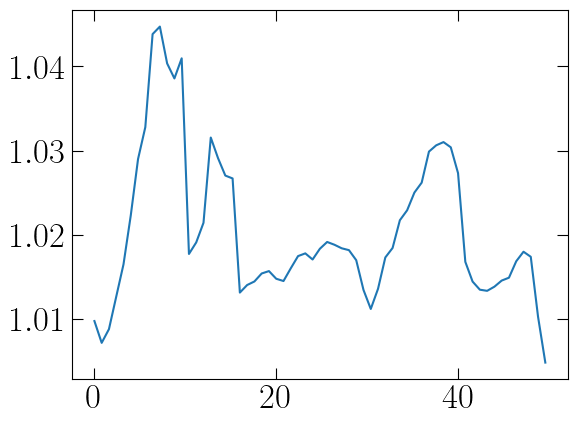

In [ ]:
A_220_h=np.zeros(len(t0_arr))
for i in range(len(t0_arr)):
    A_220_h[i]=params_fit[i][0]

plt.plot(t0_arr,-A_220_h*110.69)
# 这。。。和psi4提取的基本一致呢。。。
# 那为什么有这样系统性的偏差呢？？？

In [8]:
name_list=["0","1","5","10","20","30"]
i_name=0

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    print(sim)
    

Indexed 20261 files and 11 subdirectories
Folder /home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/0
/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/0
Available scalar timeseries:
['qlm_time[0]', 'qlm_time[1]', 'qlm_time[2]', 'qlm_equatorial_circumference[0]', 'qlm_equatorial_circumference[1]', 'qlm_equatorial_circumference[2]', 'qlm_polar_circumference_0[0]', 'qlm_polar_circumference_0[1]', 'qlm_polar_circumference_0[2]', 'qlm_polar_circumference_pi_2[0]', 'qlm_polar_circumference_pi_2[1]', 'qlm_polar_circumference_pi_2[2]', 'qlm_area[0]', 'qlm_area[1]', 'qlm_area[2]', 'qlm_irreducible_mass[0]', 'qlm_irreducible_mass[1]', 'qlm_irreducible_mass[2]', 'qlm_radius[0]', 'qlm_radius[1]', 'qlm_radius[2]', 'qlm_spin_guess[0]', 'qlm_spin_guess[1]', 'qlm_spin_guess[2]', 'qlm_mass_guess[0]', 'qlm_mass_guess[1]', 'qlm_mass_guess[2]', 'qlm_killing_eigenvalue_re[0]', 'qlm_killing_eigenvalue_re[1]', 'qlm_killing_eigenvalue_re[2]', 'qlm_killing_eigenvalue_im[0]', 'qlm_killing_eigenvalue_im[1]', '

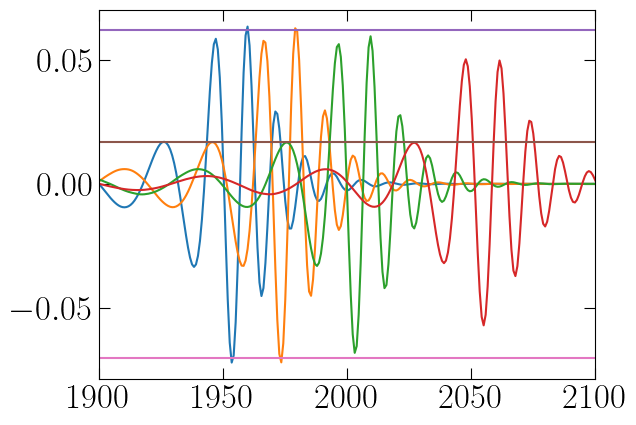

In [ ]:
psi4=sim.multipoles["psi4"][91.46]
psi4_22=psi4[2,2]
plt.plot(psi4_22.real()*(91.46))

psi4=sim.multipoles["psi4"][110.69]
psi4_22=psi4[2,2]
plt.plot(psi4_22.real()*110.69)

psi4=sim.multipoles["psi4"][140.16]
psi4_22=psi4[2,2]
plt.plot(psi4_22.real()*140.16)

psi4=sim.multipoles["psi4"][191.0]
psi4_22=psi4[2,2]
plt.plot(psi4_22.real()*191.0)
# plt.plot(np.abs(psi4_22.imag()))
plt.xlim([1900,2100])
# plt.yscale("log")
plt.plot([0,3000],[0.062,0.062])
plt.plot([0,3000],[0.017,0.017])
plt.plot([0,3000],[-0.07,-0.07])

In [56]:
# 我们得看一下o10和s10是什么情况

name_list=["o20"]
i_name=0

data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
h_p=data[:,1]
h_c=data[:,2]
h_abs=(h_p**2+h_c**2)**(1/2)
index_peak=np.argmax(h_abs)


data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_22.dat")
t=data[:,0]
psi4_r=data[:,1]
psi4_i=data[:,2]
index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
    pass

timeseries=sim.ts
m1=timeseries.scalar["qlm_mass[0]"]
m2=timeseries.scalar["qlm_mass[1]"]
mt=timeseries.scalar["qlm_mass[2]"]
s1=timeseries.scalar["qlm_spin[0]"]
s2=timeseries.scalar["qlm_spin[1]"]
st=timeseries.scalar["qlm_spin[2]"]
q1=timeseries.scalar["qlm_charge[0]"]
q2=timeseries.scalar["qlm_charge[1]"]
qt=timeseries.scalar["qlm_charge[2]"]

M=1
M_f=mt(t[index_100])
a_f=st(t[index_100])/M_f**2
q_f=qt(t[index_100])/M_f

print(M_f,a_f,q_f)

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_220r[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_220r[k][j]*a_f**k*q_f**j

omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_220i[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_220i[k][j]*a_f**k*q_f**j

omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_221r[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_221r[k][j]*a_f**k*q_f**j

omega_KN_221_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_221i[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_221i[k][j]*a_f**k*q_f**j

omega_KN_221_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

import My_Fitting


t_arr=np.zeros(index_100-index_peak)
psi4_r_arr=np.zeros(index_100-index_peak)
psi4_i_arr=np.zeros(index_100-index_peak)
t0_arr=np.zeros(index_50-index_peak)
N_guess=20
N_free=5
N_fix=2
omega_fix=[[omega_KN_220_r,omega_KN_220_i],[omega_KN_221_r,omega_KN_221_i]]
pert=10**(-3)
N_pert_guess=20
max_nfev=200000
for i in range(index_100-index_peak):
    t_arr[i]=t[index_peak+i]-t[index_peak]
    psi4_r_arr[i]=psi4_r[index_peak+i]
    psi4_i_arr[i]=psi4_i[index_peak+i]
    
for i in range(index_50-index_peak):
    t0_arr[i]=t[index_peak+i]-t[index_peak]

# params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)


0.94943274252741 0.683275587461712 0.022742671777501104


In [8]:
M_f=1
a_f=0.6
q_f=0.3
M=1

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_220r[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_220r[k][j]*a_f**k*q_f**j

omega_KN_220_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

num=0
den=0
for k in range(4):
    for j in range(4):
        num+=My_Fitting.bkj_220i[k][j]*a_f**k*q_f**j
        den+=My_Fitting.ckj_220i[k][j]*a_f**k*q_f**j

omega_KN_220_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

omega_GR=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]
print(omega_GR)
print(omega_KN_220_r,omega_KN_220_i)

(0.49404478178138433-0.08376520216104048j)
0.5068740918642372 -0.08331860687133928


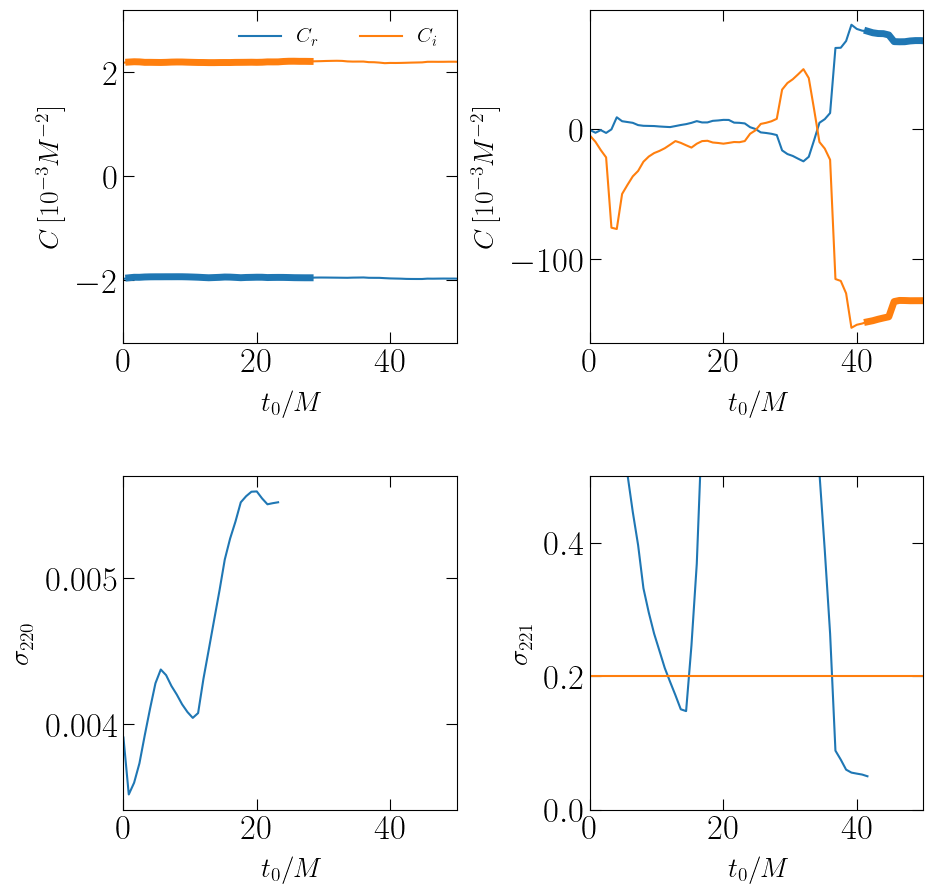

In [57]:

with open("Figure_data/"+"o20"+"_"+"A_phi_22.pkl",'rb') as file:
            params_fit=pickle.load(file)

A_220=np.zeros(len(t0_arr))
phi_220=np.zeros(len(t0_arr))
A_221=np.zeros(len(t0_arr))
phi_221=np.zeros(len(t0_arr))

C_r_220=np.zeros(len(t0_arr))
C_i_220=np.zeros(len(t0_arr))
C_r_221=np.zeros(len(t0_arr))
C_i_221=np.zeros(len(t0_arr))

for i in range(len(t0_arr)):
    A_220[i]=params_fit[i][0]
    phi_220[i]=params_fit[i][1]
    A_221[i]=params_fit[i][2]
    phi_221[i]=params_fit[i][3]

    C_r_220[i]=A_220[i]*np.cos(phi_220[i])
    C_i_220[i]=-A_220[i]*np.sin(phi_220[i])
    C_r_221[i]=A_221[i]*np.cos(phi_221[i])
    C_i_221[i]=-A_221[i]*np.sin(phi_221[i])


dA=10.0

# 我们还是来画一个四宫格图
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

axes[0,0].plot(t0_arr,C_r_220*10**3)
axes[0,0].plot(t0_arr,C_i_220*10**3)
axes[0,0].set_xlim([0,50])
axes[0,0].set_xlabel(r"$t_0/M$",fontsize=20)
axes[0,0].set_ylabel(r"$C\,[10^{-3} M^{-2}]$",fontsize=20)
axes[0,0].set_ylim([-3.2,3.2])
axes[0,0].legend([r"$C_r$",r"$C_i$"],fontsize=15,frameon=False,ncol=2)

axes[0,1].plot(t0_arr,C_r_221*10**3)
axes[0,1].plot(t0_arr,C_i_221*10**3)
axes[0,1].set_xlim([0,50])
axes[0,1].set_xlabel(r"$t_0/M$",fontsize=20)
axes[0,1].set_ylabel(r"$C\,[10^{-3} M^{-2}]$",fontsize=20)


omega_GR_220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M

dt=-np.log(dA)/omega_GR_220.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=My_Fitting.sta_cal_A(C_r_220[i:index_dt],C_i_220[i:index_dt])

axes[1,0].plot(t0_arr[0:n_sta],sta_list)
axes[1,0].set_xlim([0,50])
axes[1,0].set_xlabel(r"$t_0/M$",fontsize=20)
axes[1,0].set_ylabel(r"$\sigma_{220}$",fontsize=20)

index_min=np.argmin(sta_list)
index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

axes[0,0].plot(t0_arr[index_min:index_min_dt],C_r_220[index_min:index_min_dt]*10**3,color='#1f77b4',linewidth=5)
axes[0,0].plot(t0_arr[index_min:index_min_dt],C_i_220[index_min:index_min_dt]*10**3,color='#ff7f0e',linewidth=5)

omega_GR_221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=a_f)[0]/M_f*M

dt=-np.log(dA)/omega_GR_221.imag
# 首先找到离 50 （t0_arr结尾）最近的dt
index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
n_sta=index_end+1
sta_list=np.zeros(n_sta)

for i in range(n_sta):
    index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
    sta_list[i]=My_Fitting.sta_cal_A(C_r_221[i:index_dt],C_i_221[i:index_dt])

axes[1,1].plot(t0_arr[0:n_sta],sta_list)
axes[1,1].set_xlim([0,50])
axes[1,1].set_xlabel(r"$t_0/M$",fontsize=20)
axes[1,1].set_ylabel(r"$\sigma_{221}$",fontsize=20)
axes[1,1].plot([0,50],[0.2,0.2])
axes[1,1].set_ylim([0,0.5])

index_min=np.argmin(sta_list)
index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

axes[0,1].plot(t0_arr[index_min:index_min_dt],C_r_221[index_min:index_min_dt]*10**3,color='#1f77b4',linewidth=5)
axes[0,1].plot(t0_arr[index_min:index_min_dt],C_i_221[index_min:index_min_dt]*10**3,color='#ff7f0e',linewidth=5)
# axes[0,1].set_ylim([-0.3,0.3])

In [76]:
# 然后当然是我们再给330也画个图
name_list=["0","1","5","10","20","30","s1","s5","s10","s20","s30","o1","o5","o10","o20","o30"]
# name_list=["o20"]
for i_name in range(len(name_list)):
    #用到了index_100这个东西
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)
    t=data[:,0]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                    pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass

    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    st=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    qt=timeseries.scalar["qlm_charge[2]"]

    M=1
    M_f=mt(t[index_100])
    a_f=st(t[index_100])/M_f**2
    q_f=qt(t[index_100])/M_f

    print(M_f,a_f,q_f)

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=My_Fitting.bkj_330r[k][j]*a_f**k*q_f**j
            den+=My_Fitting.ckj_330r[k][j]*a_f**k*q_f**j

    omega_KN_330_r=(qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=0)[0].real*num/den)/M_f*M

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=My_Fitting.bkj_330i[k][j]*a_f**k*q_f**j
            den+=My_Fitting.ckj_330i[k][j]*a_f**k*q_f**j

    omega_KN_330_i=(qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=0)[0].imag*num/den)/M_f*M

    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_33.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]


    t_arr=np.zeros(index_100-index_peak)
    psi4_r_arr=np.zeros(index_100-index_peak)
    psi4_i_arr=np.zeros(index_100-index_peak)
    t0_arr=np.zeros(index_50-index_peak)
    N_guess=30
    N_free=6
    N_fix=1
    omega_fix=[[omega_KN_330_r,omega_KN_330_i]]
    pert=10**(-3)
    N_pert_guess=30
    max_nfev=200000
    for i in range(index_100-index_peak):
        t_arr[i]=t[index_peak+i]-t[index_peak]
        psi4_r_arr[i]=psi4_r[index_peak+i]
        psi4_i_arr[i]=psi4_i[index_peak+i]
    
    for i in range(index_50-index_peak):
        t0_arr[i]=t[index_peak+i]-t[index_peak]

    params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)

    with open("Figure_data/"+name_list[i_name]+"_"+"A_phi_33_Nf6.pkl",'wb') as file:
            pickle.dump(params_fit,file)


0.952832810584435 0.6803804057491204 0.0
initial guess:


100%|██████████| 30/30 [00:18<00:00,  1.66it/s]


initial guess index:  17
min loss: 4.571080626061151e-11
fitting for N_free =  6


 70%|██████▉   | 44/63 [01:23<00:27,  1.47s/it]/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/jaxfit/common_scipy.py:330: RuntimeWarning: overflow encountered in divide
  ratio = actual_reduction / predicted_reduction
100%|██████████| 63/63 [02:22<00:00,  2.26s/it]


0.952832632402971 0.6803440080616382 0.010251878468312305
initial guess:


100%|██████████| 30/30 [00:13<00:00,  2.23it/s]


initial guess index:  12
min loss: 4.539131885471159e-11
fitting for N_free =  6


100%|██████████| 63/63 [02:23<00:00,  2.28s/it]


0.952883246655686 0.679444992492798 0.05125661516971226
initial guess:


100%|██████████| 30/30 [00:12<00:00,  2.32it/s]


initial guess index:  11
min loss: 4.3485907008753114e-11
fitting for N_free =  6


100%|██████████| 63/63 [01:44<00:00,  1.66s/it]


0.952988361114351 0.6766872571119554 0.10250278731607375
initial guess:


100%|██████████| 30/30 [00:08<00:00,  3.44it/s]


initial guess index:  9
min loss: 9.59905160346284e-12
fitting for N_free =  6


100%|██████████| 63/63 [01:33<00:00,  1.49s/it]


0.953491903516026 0.6652252165883962 0.2049052800596258
initial guess:


100%|██████████| 30/30 [00:06<00:00,  4.84it/s]


initial guess index:  10
min loss: 1.6892438387404858e-11
fitting for N_free =  6


100%|██████████| 63/63 [01:45<00:00,  1.67s/it]


0.954369525297543 0.6459866157189657 0.30708129086449204
initial guess:


100%|██████████| 30/30 [00:19<00:00,  1.57it/s]


initial guess index:  15
min loss: 4.4994633487446035e-11
fitting for N_free =  6


100%|██████████| 63/63 [01:40<00:00,  1.59s/it]


0.952831012089478 0.6803725570381773 0.0056924716641023635
initial guess:


100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


initial guess index:  23
min loss: 4.636518595212648e-11
fitting for N_free =  6


100%|██████████| 63/63 [02:20<00:00,  2.23s/it]


0.952788775155388 0.6801830026076413 0.028463722860299735
initial guess:


100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


initial guess index:  13
min loss: 4.403236639940135e-11
fitting for N_free =  6


100%|██████████| 64/64 [02:00<00:00,  1.88s/it]


0.952652200467814 0.6795560462677448 0.056935494006961594
initial guess:


100%|██████████| 30/30 [00:16<00:00,  1.81it/s]


initial guess index:  3
min loss: 4.4852022793854846e-11
fitting for N_free =  6


100%|██████████| 63/63 [01:56<00:00,  1.85s/it]


0.952103897434 0.6770482210986529 0.11393778443479682
initial guess:


100%|██████████| 30/30 [00:10<00:00,  2.89it/s]


initial guess index:  5
min loss: 1.530417666338938e-11
fitting for N_free =  6


100%|██████████| 63/63 [01:45<00:00,  1.67s/it]


0.951176400327392 0.6729451283703767 0.17107374375978085
initial guess:


100%|██████████| 30/30 [00:13<00:00,  2.16it/s]


initial guess index:  12
min loss: 4.4183552857708105e-11
fitting for N_free =  6


100%|██████████| 63/63 [02:40<00:00,  2.55s/it]


0.95282529598897 0.6803964186983673 0.0011330417332062388
initial guess:


100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


initial guess index:  11
min loss: 4.748527001885571e-11
fitting for N_free =  6


100%|██████████| 64/64 [02:50<00:00,  2.67s/it]


0.952616925549399 0.6805707967408824 0.005666487318456627
initial guess:


100%|██████████| 30/30 [00:12<00:00,  2.48it/s]


initial guess index:  6
min loss: 2.6577189590945914e-11
fitting for N_free =  6


100%|██████████| 63/63 [01:34<00:00,  1.50s/it]


0.95198062249989 0.6811746778140128 0.01134082973602653
initial guess:


100%|██████████| 30/30 [00:10<00:00,  2.80it/s]


initial guess index:  19
min loss: 4.1522221222603975e-11
fitting for N_free =  6


100%|██████████| 64/64 [01:37<00:00,  1.52s/it]


0.94943274252741 0.683275587461712 0.022742671777501104
initial guess:


100%|██████████| 30/30 [00:14<00:00,  2.10it/s]


initial guess index:  21
min loss: 6.841973880387212e-11
fitting for N_free =  6


100%|██████████| 64/64 [02:22<00:00,  2.23s/it]


0.94510396432959 0.6870504753933426 0.034263540549851805
initial guess:


100%|██████████| 30/30 [00:08<00:00,  3.36it/s]


initial guess index:  2
min loss: 5.190417597912301e-11
fitting for N_free =  6


100%|██████████| 63/63 [01:53<00:00,  1.81s/it]


In [77]:
dA=10.0
lambda_list=[0,0.01,0.05,0.1,0.2,0.3]
name_list=[["0","1","5","10","20","30"],["0","s1","s5","s10","s20","s30"],["0","o1","o5","o10","o20","o30"]]

C_r_330_list=np.zeros([3,len(lambda_list)])
C_i_330_list=np.zeros([3,len(lambda_list)])
sigma_330_list=np.zeros([3,len(lambda_list)])

Crh_r_330_list=np.zeros([3,len(lambda_list)])
Crh_i_330_list=np.zeros([3,len(lambda_list)])
sigma_rh_330_list=np.zeros([3,len(lambda_list)])

for i_name in range(len(lambda_list)):
    for i_family in range(3):
        data=np.genfromtxt("Figure_data/strain_"+name_list[i_family][i_name]+"_22_cutoff_low_0.005.dat")
        h_p=data[:,1]
        h_c=data[:,2]
        h_abs=(h_p**2+h_c**2)**(1/2)
        index_peak=np.argmax(h_abs)
        t=data[:,0]
        index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
        index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

        t_arr=np.zeros(index_100-index_peak)
        t0_arr=np.zeros(index_50-index_peak)
        N_free=4
        N_fix=1

        for i in range(index_100-index_peak):
            t_arr[i]=t[index_peak+i]-t[index_peak]
        
        for i in range(index_50-index_peak):
            t0_arr[i]=t[index_peak+i]-t[index_peak]

        with open("Figure_data/"+name_list[i_family][i_name]+"_"+"A_phi_33_Nf6.pkl",'rb') as file:
            params_fit=pickle.load(file)
        C_r_330=np.zeros(len(t0_arr))
        C_i_330=np.zeros(len(t0_arr))
        for i in range(len(t0_arr)):
            C_r_330[i]=params_fit[i][0]*np.cos(params_fit[i][1])
            C_i_330[i]=-params_fit[i][0]*np.sin(params_fit[i][1])

        with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_family][i_name],\
                        pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_family][i_name]+".pickle") as sim:
            pass

        timeseries=sim.ts
        m1=timeseries.scalar["qlm_mass[0]"]
        m2=timeseries.scalar["qlm_mass[1]"]
        mt=timeseries.scalar["qlm_mass[2]"]
        s1=timeseries.scalar["qlm_spin[0]"]
        s2=timeseries.scalar["qlm_spin[1]"]
        st=timeseries.scalar["qlm_spin[2]"]
        q1=timeseries.scalar["qlm_charge[0]"]
        q2=timeseries.scalar["qlm_charge[1]"]
        qt=timeseries.scalar["qlm_charge[2]"]

        M=1
        M_f=mt(t[index_100])
        a_f=st(t[index_100])/M_f**2
        q_f=qt(t[index_100])/M_f

        omega_GR_330=qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=a_f)[0]/M_f*M

        dt=-np.log(dA)/omega_GR_330.imag
        # 首先找到离 50 （t0_arr结尾）最近的dt
        index_end=np.argmin(np.abs(t0_arr-(t0_arr[-1]-dt)))
        n_sta=index_end+1
        sta_list=np.zeros(n_sta)
        for i in range(n_sta):
            index_dt=np.argmin(np.abs(t0_arr-(t0_arr[i]+dt)))+1
            sta_list[i]=My_Fitting.sta_cal_A(C_r_330[i:index_dt],C_i_330[i:index_dt])

        index_min=np.argmin(sta_list)
        index_min_dt=np.argmin(np.abs(t0_arr-(t0_arr[index_min]+dt)))+1

        C_r_330_list[i_family][i_name]=np.average(C_r_330[index_min:index_min_dt])
        C_i_330_list[i_family][i_name]=np.average(C_i_330[index_min:index_min_dt])
        sigma_330_list[i_family][i_name]=sta_list[index_min]

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=My_Fitting.bkj_330r[k][j]*a_f**k*q_f**j
                den+=My_Fitting.ckj_330r[k][j]*a_f**k*q_f**j

        omega_KN_330_r=(qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=0)[0].real*num/den)/M_f*M

        num=0
        den=0
        for k in range(4):
            for j in range(4):
                num+=My_Fitting.bkj_330i[k][j]*a_f**k*q_f**j
                den+=My_Fitting.ckj_330i[k][j]*a_f**k*q_f**j

        omega_KN_330_i=(qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=0)[0].imag*num/den)/M_f*M

        # 原理上我们上面算了M omega所以为了补量纲下面是*M
        Crh_r_330_list[i_family][i_name]=(-(C_r_330_list[i_family][i_name]+1.0j*C_i_330_list[i_family][i_name])/(omega_KN_330_r+1.0j*omega_KN_330_i)**2).real*110.69*M
        Crh_i_330_list[i_family][i_name]=(-(C_r_330_list[i_family][i_name]+1.0j*C_i_330_list[i_family][i_name])/(omega_KN_330_r+1.0j*omega_KN_330_i)**2).imag*110.69*M
        sigma_rh_330_list[i_family][i_name]=sigma_330_list[i_family][i_name]/np.abs(omega_KN_330_r+1.0j*omega_KN_330_i)**2


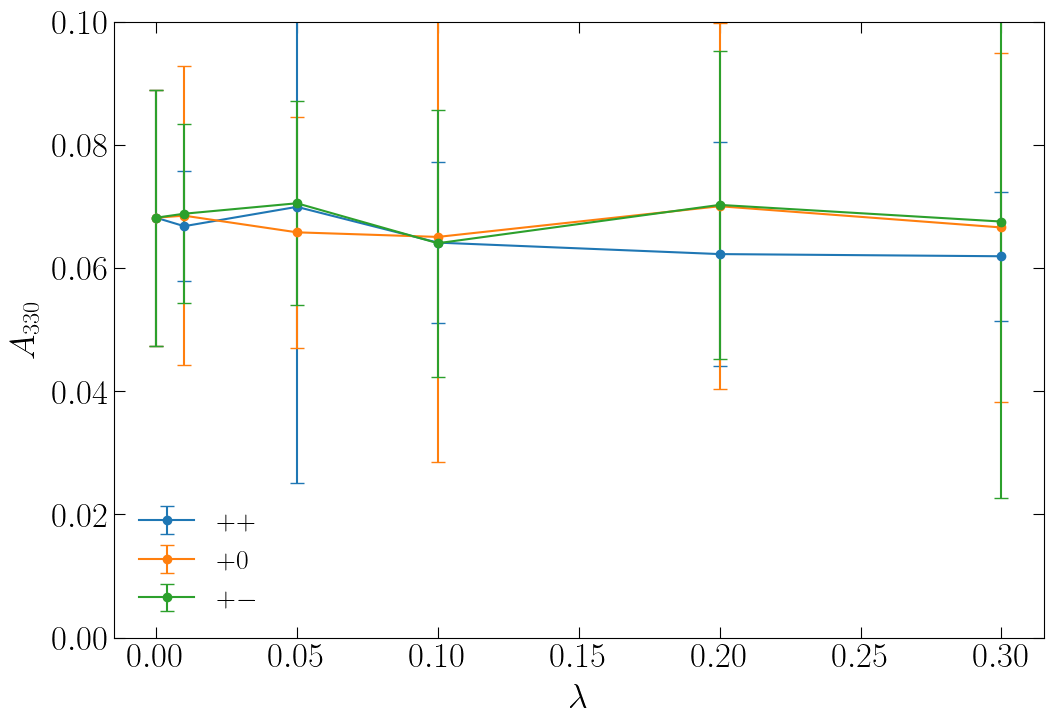

In [79]:
plt.figure(figsize=(12,8))

for i_family in range(3):
    plt.errorbar(lambda_list,(Crh_r_330_list[i_family]**2+Crh_i_330_list[i_family]**2)**(1/2),sigma_rh_330_list[i_family],capsize=5,fmt='-o')

plt.xlabel(r"$\lambda$",fontsize=25)
plt.ylabel(r"$A_{330}$",fontsize=25)
plt.legend([r"$++$",r"$+0$",r"$+-$"],fontsize=20,frameon=False)
plt.ylim([0,0.1])
plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/330_A.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

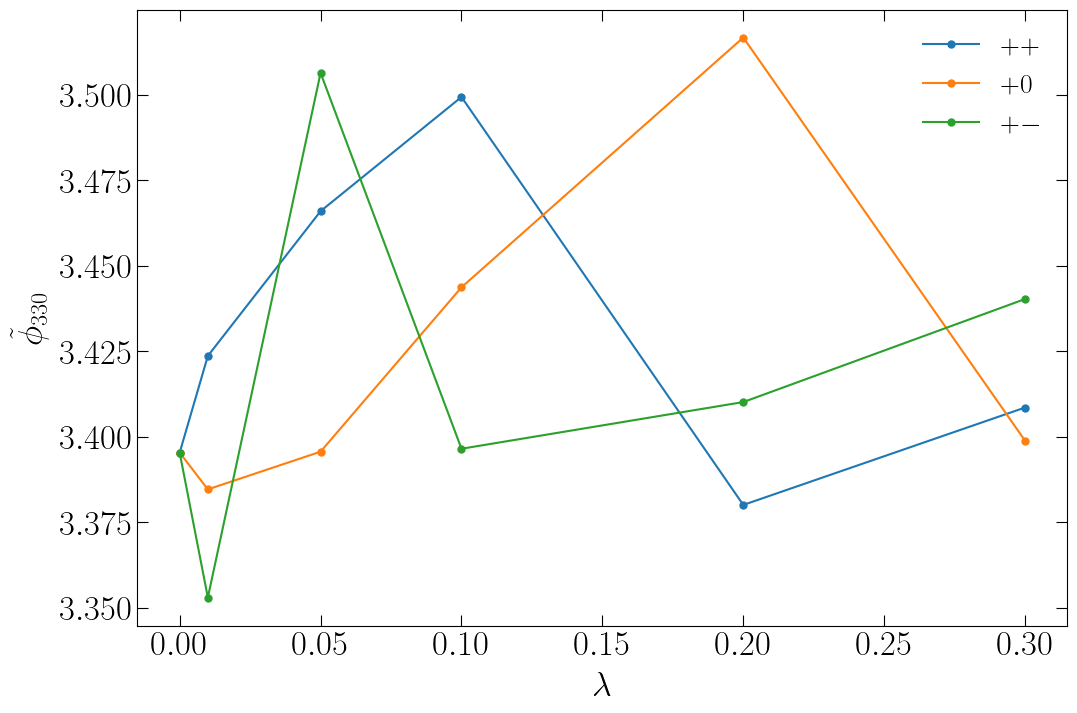

In [104]:
# 另一个信息于是就是相位了
# 可以由 Crh_r_220_list, Crh_i_220_list等得到
# phi=arctan(-Ci/Cr)

phi_220_list=np.zeros([3,len(lambda_list)])
phi_221_list=np.zeros([3,len(lambda_list)])
phi_330_list=np.zeros([3,len(lambda_list)])

for i in range(3):
    for j in range(len(lambda_list)):
        phi_220_list[i][j]=np.arctan2(-Crh_i_220_list[i][j],Crh_r_220_list[i][j])
        phi_221_list[i][j]=np.arctan2(-Crh_i_221_list[i][j],Crh_r_221_list[i][j])
        phi_330_list[i][j]=np.arctan2(-Crh_i_330_list[i][j],Crh_r_330_list[i][j])

plt.figure(figsize=(12,8))

phi_330_list[2][3]-=2*np.pi
phi_330_list[1][5]-=2*np.pi
phi_330_list[0][4]+=4*np.pi
phi_220_list[0][4]+=2*np.pi
phi_220_list[0][5]+=2*np.pi
phi_330_list[0][5]+=2*np.pi

for i in range(3):
    plt.plot(lambda_list,2*phi_330_list[i]-3*phi_220_list[i]+2*np.pi,'.-',markersize=10)

# plt.ylim([-5,0])

plt.legend([r"$++$",r"$+0$",r"$+-$"],fontsize=20,frameon=False)
plt.xlabel(r"$\lambda$",fontsize=25)
plt.ylabel(r"$\tilde{\phi}_{330}$",fontsize=25)

plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/330_phi.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

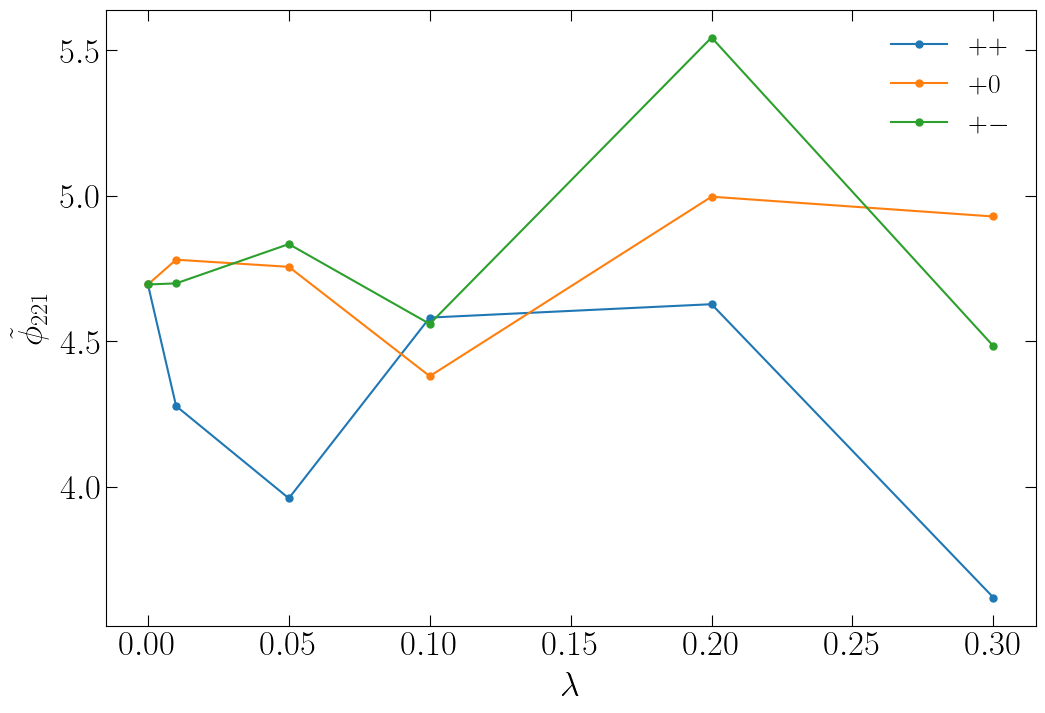

In [117]:
phi_220_list=np.zeros([3,len(lambda_list)])
phi_221_list=np.zeros([3,len(lambda_list)])
phi_330_list=np.zeros([3,len(lambda_list)])

for i in range(3):
    for j in range(len(lambda_list)):
        phi_220_list[i][j]=np.arctan2(-Crh_i_220_list[i][j],Crh_r_220_list[i][j])
        phi_221_list[i][j]=np.arctan2(-Crh_i_221_list[i][j],Crh_r_221_list[i][j])
        phi_330_list[i][j]=np.arctan2(-Crh_i_330_list[i][j],Crh_r_330_list[i][j])

plt.figure(figsize=(12,8))

phi_330_list[2][3]-=2*np.pi
phi_330_list[1][5]-=2*np.pi
phi_330_list[0][4]+=4*np.pi
phi_220_list[0][4]+=2*np.pi
phi_220_list[0][5]+=2*np.pi
phi_330_list[0][5]+=2*np.pi

phi_221_list[0][3]+=2*np.pi
phi_221_list[0][4]+=4*np.pi
phi_221_list[0][5]+=2*np.pi
phi_221_list[2][4]+=2*np.pi
phi_221_list[2][5]+=2*np.pi

for i in range(3):
    plt.plot(lambda_list,2*phi_221_list[i]-2*phi_220_list[i],'.-',markersize=10)

plt.legend([r"$++$",r"$+0$",r"$+-$"],fontsize=20,frameon=False)
plt.xlabel(r"$\lambda$",fontsize=25)
plt.ylabel(r"$\tilde{\phi}_{221}$",fontsize=25)
plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/221_phi.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
# 再之后就是其他模式了，但其他模式需要频率和振幅一起提取
# 我们从44模开始尝试吧



In [2]:
# 试下440吧
name_list=["0","1","5","10","20","30","s1","s5","s10","s20","s30","o1","o5","o10","o20","o30"]
# name_list=["o20"]
for i_name in range(len(name_list)):
    #用到了index_100这个东西
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)
    t=data[:,0]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                    pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass

    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    st=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    qt=timeseries.scalar["qlm_charge[2]"]

    M=1
    M_f=mt(t[index_100])
    a_f=st(t[index_100])/M_f**2
    q_f=qt(t[index_100])/M_f

    print(M_f,a_f,q_f)

    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_44.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]

    t_arr=np.zeros(index_100-index_peak)
    psi4_r_arr=np.zeros(index_100-index_peak)
    psi4_i_arr=np.zeros(index_100-index_peak)
    t0_arr=np.zeros(index_50-index_peak)
    N_guess=20
    N_free=3
    N_fix=0
    omega_fix=[]
    pert=10**(-3)
    N_pert_guess=20
    max_nfev=200000
    for i in range(index_100-index_peak):
        t_arr[i]=t[index_peak+i]-t[index_peak]
        psi4_r_arr[i]=psi4_r[index_peak+i]
        psi4_i_arr[i]=psi4_i[index_peak+i]
    
    for i in range(index_50-index_peak):
        t0_arr[i]=t[index_peak+i]-t[index_peak]

    params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)

    with open("Figure_data/"+name_list[i_name]+"_"+"A_phi_44_N3.pkl",'wb') as file:
            pickle.dump(params_fit,file)


0.952832810584435 0.6803804057491204 0.0
initial guess:


100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


initial guess index:  5
min loss: 1.9156556658672137e-09
fitting for N_free =  3


100%|██████████| 63/63 [00:36<00:00,  1.73it/s]


0.952832632402971 0.6803440080616382 0.010251878468312305
initial guess:


100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


initial guess index:  17
min loss: 7.291785014424129e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:36<00:00,  1.72it/s]


0.952883246655686 0.679444992492798 0.05125661516971226
initial guess:


100%|██████████| 20/20 [00:15<00:00,  1.25it/s]


initial guess index:  9
min loss: 6.836225428996997e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:35<00:00,  1.75it/s]


0.952988361114351 0.6766872571119554 0.10250278731607375
initial guess:


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


initial guess index:  10
min loss: 6.20701994422637e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:37<00:00,  1.68it/s]


0.953491903516026 0.6652252165883962 0.2049052800596258
initial guess:


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


initial guess index:  12
min loss: 5.326169803582811e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:39<00:00,  1.60it/s]


0.954369525297543 0.6459866157189657 0.30708129086449204
initial guess:


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


initial guess index:  1
min loss: 5.545032208977559e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:37<00:00,  1.67it/s]


0.952831012089478 0.6803725570381773 0.0056924716641023635
initial guess:


100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


initial guess index:  3
min loss: 7.746201406664059e-10
fitting for N_free =  3


 94%|█████████▎| 59/63 [00:36<00:01,  2.28it/s]/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/jaxfit/common_scipy.py:330: RuntimeWarning: overflow encountered in divide
  ratio = actual_reduction / predicted_reduction
100%|██████████| 63/63 [00:38<00:00,  1.65it/s]


0.952788775155388 0.6801830026076413 0.028463722860299735
initial guess:


100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


initial guess index:  8
min loss: 1.7822962422622274e-09
fitting for N_free =  3


100%|██████████| 64/64 [00:39<00:00,  1.63it/s]


0.952652200467814 0.6795560462677448 0.056935494006961594
initial guess:


100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


initial guess index:  1
min loss: 6.975723276140103e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:35<00:00,  1.76it/s]


0.952103897434 0.6770482210986529 0.11393778443479682
initial guess:


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


initial guess index:  19
min loss: 1.7876453715297934e-09
fitting for N_free =  3


100%|██████████| 63/63 [00:39<00:00,  1.60it/s]


0.951176400327392 0.6729451283703767 0.17107374375978085
initial guess:


100%|██████████| 20/20 [00:17<00:00,  1.17it/s]


initial guess index:  5
min loss: 7.500826198903772e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:36<00:00,  1.74it/s]


0.95282529598897 0.6803964186983673 0.0011330417332062388
initial guess:


100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


initial guess index:  9
min loss: 8.125376256840739e-10
fitting for N_free =  3


100%|██████████| 64/64 [00:38<00:00,  1.66it/s]


0.952616925549399 0.6805707967408824 0.005666487318456627
initial guess:


100%|██████████| 20/20 [00:14<00:00,  1.36it/s]


initial guess index:  5
min loss: 6.474927169548306e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:37<00:00,  1.70it/s]


0.95198062249989 0.6811746778140128 0.01134082973602653
initial guess:


100%|██████████| 20/20 [00:14<00:00,  1.41it/s]


initial guess index:  5
min loss: 7.327422587995656e-10
fitting for N_free =  3


100%|██████████| 64/64 [00:38<00:00,  1.68it/s]


0.94943274252741 0.683275587461712 0.022742671777501104
initial guess:


100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


initial guess index:  0
min loss: 2.024943785165557e-09
fitting for N_free =  3


100%|██████████| 64/64 [00:38<00:00,  1.67it/s]


0.94510396432959 0.6870504753933426 0.034263540549851805
initial guess:


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


initial guess index:  17
min loss: 8.741418039809596e-10
fitting for N_free =  3


100%|██████████| 63/63 [00:39<00:00,  1.61it/s]


In [2]:
# name_list=["0","1","5","10","20","30","s1","s5","s10","s20","s30","o1","o5","o10","o20","o30"]
name_list=["30","s1","s5","s10","s20","s30","o1","o5","o10","o20","o30"]
# name_list=["o20"]
for i_name in range(len(name_list)):
    #用到了index_100这个东西
    data=np.genfromtxt("Figure_data/strain_"+name_list[i_name]+"_22_cutoff_low_0.005.dat")
    h_p=data[:,1]
    h_c=data[:,2]
    h_abs=(h_p**2+h_c**2)**(1/2)
    index_peak=np.argmax(h_abs)
    t=data[:,0]
    index_50=np.argmin(np.abs(t-t[index_peak]-50))+1
    index_100=np.argmin(np.abs(t-t[index_peak]-100))+1

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                    pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass

    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    st=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    qt=timeseries.scalar["qlm_charge[2]"]

    M=1
    M_f=mt(t[index_100])
    a_f=st(t[index_100])/M_f**2
    q_f=qt(t[index_100])/M_f

    print(M_f,a_f,q_f)

    data=np.genfromtxt("Figure_data/Weyl4_mode_"+name_list[i_name]+"_55.dat")
    t=data[:,0]
    psi4_r=data[:,1]
    psi4_i=data[:,2]

    t_arr=np.zeros(index_100-index_peak)
    psi4_r_arr=np.zeros(index_100-index_peak)
    psi4_i_arr=np.zeros(index_100-index_peak)
    t0_arr=np.zeros(index_50-index_peak)
    N_guess=20
    N_free=5
    N_fix=0
    omega_fix=[]
    pert=10**(-3)
    N_pert_guess=20
    max_nfev=200000
    for i in range(index_100-index_peak):
        t_arr[i]=t[index_peak+i]-t[index_peak]
        psi4_r_arr[i]=psi4_r[index_peak+i]
        psi4_i_arr[i]=psi4_i[index_peak+i]
    
    for i in range(index_50-index_peak):
        t0_arr[i]=t[index_peak+i]-t[index_peak]

    params_fit=My_Fitting.fit_modes(t_arr,psi4_r_arr,psi4_i_arr,t0_arr,N_guess,N_free,N_fix,omega_fix,pert,N_pert_guess,max_nfev)

    with open("Figure_data/"+name_list[i_name]+"_"+"A_phi_55.pkl",'wb') as file:
            pickle.dump(params_fit,file)


0.954369525297543 0.6459866157189657 0.30708129086449204
initial guess:


100%|██████████| 20/20 [00:04<00:00,  4.19it/s]


initial guess index:  3
min loss: 1.3645962810742732e-11
fitting for N_free =  5


 94%|█████████▎| 59/63 [00:48<00:02,  1.95it/s]/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/jaxfit/common_scipy.py:330: RuntimeWarning: overflow encountered in divide
  ratio = actual_reduction / predicted_reduction
100%|██████████| 63/63 [00:50<00:00,  1.26it/s]


0.952831012089478 0.6803725570381773 0.0056924716641023635
initial guess:


100%|██████████| 20/20 [00:02<00:00,  6.85it/s]


initial guess index:  13
min loss: 1.0783421136052957e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:53<00:00,  1.18it/s]


0.952788775155388 0.6801830026076413 0.028463722860299735
initial guess:


100%|██████████| 20/20 [00:03<00:00,  5.91it/s]


initial guess index:  8
min loss: 1.0870277367716556e-11
fitting for N_free =  5


100%|██████████| 64/64 [00:50<00:00,  1.28it/s]


0.952652200467814 0.6795560462677448 0.056935494006961594
initial guess:


100%|██████████| 20/20 [00:03<00:00,  5.07it/s]


initial guess index:  2
min loss: 1.1932841649544807e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:49<00:00,  1.26it/s]


0.952103897434 0.6770482210986529 0.11393778443479682
initial guess:


100%|██████████| 20/20 [00:04<00:00,  4.27it/s]


initial guess index:  15
min loss: 8.578798705462228e-12
fitting for N_free =  5


100%|██████████| 63/63 [00:59<00:00,  1.07it/s]


0.951176400327392 0.6729451283703767 0.17107374375978085
initial guess:


100%|██████████| 20/20 [00:02<00:00,  7.87it/s]


initial guess index:  3
min loss: 9.836516306703916e-12
fitting for N_free =  5


100%|██████████| 63/63 [00:49<00:00,  1.28it/s]


0.95282529598897 0.6803964186983673 0.0011330417332062388
initial guess:


100%|██████████| 20/20 [00:04<00:00,  4.41it/s]


initial guess index:  15
min loss: 1.1031771767440985e-11
fitting for N_free =  5


100%|██████████| 64/64 [00:50<00:00,  1.27it/s]


0.952616925549399 0.6805707967408824 0.005666487318456627
initial guess:


100%|██████████| 20/20 [00:04<00:00,  4.56it/s]


initial guess index:  9
min loss: 1.0046216665666955e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:56<00:00,  1.11it/s]


0.95198062249989 0.6811746778140128 0.01134082973602653
initial guess:


100%|██████████| 20/20 [00:02<00:00,  6.67it/s]


initial guess index:  14
min loss: 8.233751298813848e-12
fitting for N_free =  5


100%|██████████| 64/64 [00:55<00:00,  1.15it/s]


0.94943274252741 0.683275587461712 0.022742671777501104
initial guess:


100%|██████████| 20/20 [00:03<00:00,  5.27it/s]


initial guess index:  11
min loss: 1.7731097334679046e-11
fitting for N_free =  5


100%|██████████| 64/64 [00:52<00:00,  1.21it/s]


0.94510396432959 0.6870504753933426 0.034263540549851805
initial guess:


100%|██████████| 20/20 [00:06<00:00,  3.11it/s]


initial guess index:  13
min loss: 1.757659509024683e-11
fitting for N_free =  5


100%|██████████| 63/63 [00:56<00:00,  1.11it/s]
